In [1]:
import pandas as pd
import geopandas as gp
import numpy as np 
import os
import fiona
from statistics import mean, median
import string
import sys

# Oregon 2018

## VEST Documentation

Election results from the Oregon Secretary of State via OpenElections (https://github.com/openelections/openelections-data-or/).

Precinct shapefiles for the following counties were provided by the respective county governments: Benton, Clackamas, Clatsop, Columbia, Coos, Crook, Curry, Deschutes, Douglas, Harney, Hood River, Jackson, Josephine, Klamath, Lane, Linn, Malheur, Morrow, Multnomah, Polk, Sherman, Tillamook, Umatilla, Union, Wallowa, Wasco, Washington, Yamhill.

Precinct shapefiles for the following counties were provided by the Oregon Secretary of State: Jefferson, Lane, Marion, Washington. Several gaps in the Marion County shapefile were assigned based on the Precinct Split Summary Report.

Precinct boundaries for Grant County and Wheeler County are defined by school district boundaries. Precinct shapefiles were produced to match PDF maps provided by the respective counties using the 2016 Oregon Education Boundaries shapefile obtained from the Oregon Spatial Data Library.

Precinct shapefiles for the following counties were produced based on PDF maps provided by the respective counties: Baker, Gilliam, Lake, Lincoln. Boundaries defined by the PLSS grid were produced with the Oregon Public Land Survey Quarter-Quarter Reference Grid shapefile obtained from the Oregon Spatial Data Library. Municipal boundaries were produced from the Oregon Department of Transportion 2016 City Limits shapefile obtained from the Oregon Spatial Data Library. Street boundaries were produced from the U.S. Census Bureau census block shapefiles.

PDF maps obtained from Lake County are approximate precinct boundaries drawn on the PLSS grid for county precincts and on the street map for Lakeview city precincts. These boundaries were adjusted to match address range assignments in the Lake County Address Library Report which serves as the legal definition of the precincts according to the Lake County Clerk. Precinct divisions across roads that span multiple rural precincts are generally defined by zip codes. Address ranges were further identified based on the Lake County tax lot parcel viewer.

Rural precinct boundaries in the shapefiles provided by Coos County and Union County were revised to match the updated PLSS cadastral grid in the Oregon GIS Framework obtained from the Oregon Spatial Data Library. 

Municipal precinct boundaries in the following counties were edited to match city limits in effect for the November 2018 general election: Clackamas, Coos, Deschutes, Douglas, Marion, Tillamook, Umatilla, Washington, Yamhill.

Precinct numbers in the Columbia County, Josephine County, and Wallowa County shapefiles were edited to match the Oregon Secretary of State voter file.

G18GOVDBRO - Kate Brown (Democratic Party)  
G18GOVRBUE - Knute Buehler (Republican Party)  
G18GOVISTA - Patrick Starnes (Independent Party)  
G18GOVLCHE - Nick Chen (Libertarian Party)  
G18GOVCAUE - Aaron Auer (Constitution Party)  
G18GOVPHEN - Chris Henry (Progressive Party)  
G18GOVOWRI - Write-in Votes  

## Load VEST File

In [2]:
vest_or_18 = gp.read_file("./raw-from-source/VEST/or_2018/or_2018.shp")

In [3]:
data_columns = [i for i in vest_or_18.columns if "G18" in i]

## Load OR Votes

In [4]:
file_list = os.listdir("./raw-from-source/Election_Results/2018/counties")
li = []
for file in file_list:
    #print(file)
    if "general" in file:
        #print(file)
        file_ref = "./raw-from-source/Election_Results/2018/counties/"+file
        file_prev = pd.read_csv(file_ref)
        #if 'precincts' in file_prev.columns:
            #file_prev['precinct'] = file_prev['precincts']
     
        #file_prev = file_prev[['county', 'precinct', 'office', 'district', 'party', 'candidate','votes']]
        li.append(file_prev)
election_results = pd.concat(li, axis=0, ignore_index=True)
display(election_results)

county                               precinct        office  district  \
0      Yamhill  Precinct 001 - Newberg Rural N, S & E      Governor       NaN   
1      Yamhill  Precinct 001 - Newberg Rural N, S & E      Governor       NaN   
2      Yamhill  Precinct 001 - Newberg Rural N, S & E      Governor       NaN   
3      Yamhill  Precinct 001 - Newberg Rural N, S & E      Governor       NaN   
4      Yamhill  Precinct 001 - Newberg Rural N, S & E      Governor       NaN   
...        ...                                    ...           ...       ...   
23753  Wheeler                                    SPR  State Senate      30.0   
23754  Wheeler                                    SPR    U.S. House       2.0   
23755  Wheeler                                    SPR    U.S. House       2.0   
23756  Wheeler                                    SPR    U.S. House       2.0   
23757  Wheeler                                    SPR    U.S. House       2.0   

      party             candidate votes  
0       NaN             Write-ins     2  
1       CON            Aaron Auer    22  
2       DEM            Kate Brown   708  
3       LBT             Nick Chen    23  
4       NON       Patrick Starnes    44  
...     ...                   ...   ...  
23753   REP           Cliff Bentz   201  
23754   NaN             Write-ins     0  
23755   DEM  Jamie McLeod-Skinner    48  
23756   NON        Mark R Roberts    14  
23757   REP           Greg Walden   183  

[23758 rows x 7 columns]

In [5]:
#Look at the different races included in the results
election_results["office"].unique()

array(['Governor', 'State House', 'State Senate', 'U.S. House', nan,
       'Ballots Cast - Blank', '20-120 Ridgewood Road District',
       'Registered Voters', 'Ballots Cast'], dtype=object)

In [6]:
#Look where the race is marked "NaN"
election_results[election_results["office"].isna()]

county precinct office  district party          candidate votes
4901  Benton        1    NaN       NaN   NaN  Registered Voters  4179
4902  Benton        1    NaN       NaN   NaN   Total Votes Cast  3381
4930  Benton        2    NaN       NaN   NaN  Registered Voters  3162
4931  Benton        2    NaN       NaN   NaN   Total Votes Cast  2131
4959  Benton        3    NaN       NaN   NaN  Registered Voters  4079
4960  Benton        3    NaN       NaN   NaN   Total Votes Cast  3125
4988  Benton        4    NaN       NaN   NaN  Registered Voters  2037
4989  Benton        4    NaN       NaN   NaN   Total Votes Cast  1426
5017  Benton        5    NaN       NaN   NaN  Registered Voters  2998
5018  Benton        5    NaN       NaN   NaN   Total Votes Cast  2082
5046  Benton        6    NaN       NaN   NaN  Registered Voters  3898
5047  Benton        6    NaN       NaN   NaN   Total Votes Cast  2890
5075  Benton        7    NaN       NaN   NaN  Registered Voters  4261
5076  Benton        7    NaN       NaN   NaN   Total Votes Cast  3582
5104  Benton        8    NaN       NaN   NaN  Registered Voters  4503
5105  Benton        8    NaN       NaN   NaN   Total Votes Cast  3773
5133  Benton        9    NaN       NaN   NaN  Registered Voters  4001
5134  Benton        9    NaN       NaN   NaN   Total Votes Cast  2944
5162  Benton       10    NaN       NaN   NaN  Registered Voters  3305
5163  Benton       10    NaN       NaN   NaN   Total Votes Cast  2355
5191  Benton       12    NaN       NaN   NaN  Registered Voters   553
5192  Benton       12    NaN       NaN   NaN   Total Votes Cast   394
5216  Benton       13    NaN       NaN   NaN  Registered Voters   375
5217  Benton       13    NaN       NaN   NaN   Total Votes Cast   227
5241  Benton       14    NaN       NaN   NaN  Registered Voters   702
5242  Benton       14    NaN       NaN   NaN   Total Votes Cast   503
5266  Benton       15    NaN       NaN   NaN  Registered Voters  2813
5267  Benton       15    NaN       NaN   NaN   Total Votes Cast  2177
5291  Benton       16    NaN       NaN   NaN  Registered Voters  3209
5292  Benton       16    NaN       NaN   NaN   Total Votes Cast  2661
5324  Benton       17    NaN       NaN   NaN  Registered Voters  1543
5325  Benton       17    NaN       NaN   NaN   Total Votes Cast  1337
5349  Benton       18    NaN       NaN   NaN  Registered Voters  1650
5350  Benton       18    NaN       NaN   NaN   Total Votes Cast  1321
5380  Benton       19    NaN       NaN   NaN  Registered Voters  1234
5381  Benton       19    NaN       NaN   NaN   Total Votes Cast   995
5405  Benton       20    NaN       NaN   NaN  Registered Voters  1828
5406  Benton       20    NaN       NaN   NaN   Total Votes Cast  1338
5430  Benton       21    NaN       NaN   NaN  Registered Voters   410
5431  Benton       21    NaN       NaN   NaN   Total Votes Cast   326
5459  Benton       22    NaN       NaN   NaN  Registered Voters   508
5460  Benton       22    NaN       NaN   NaN   Total Votes Cast   422
5484  Benton       23    NaN       NaN   NaN  Registered Voters   783
5485  Benton       23    NaN       NaN   NaN   Total Votes Cast   567
5515  Benton       24    NaN       NaN   NaN  Registered Voters  3618
5516  Benton       24    NaN       NaN   NaN   Total Votes Cast  2944
5546  Benton       25    NaN       NaN   NaN  Registered Voters  2750
5547  Benton       25    NaN       NaN   NaN   Total Votes Cast  2142

In [7]:
#Filter down to just governor results
election_results = election_results[election_results["office"]=="Governor"]

#Create a column to pivot on
election_results["pivot_col"] = election_results["county"] +"-" + election_results["precinct"].astype(str)

#Look at the included candidates
election_results["candidate"].unique()

array(['Write-ins', 'Aaron Auer', 'Kate Brown', 'Nick Chen',
       'Patrick Starnes', 'Chris Henry', 'Knute Buehler', 'write-in',
       'Over Votes', 'Under Votes', 'Write-In', 'Write-Ins',
       'Write-In Totals', 'Overvotes', 'Undervotes', 'write-ins',
       'Write-in'], dtype=object)

In [8]:
#Create a dictionary to match VEST's naming convention
cand_rename_dict = {'Write-ins':"G18GOVOWRI", 
 'Aaron Auer':"G18GOVCAUE", 
 'Kate Brown':"G18GOVDBRO", 
 'Nick Chen':"G18GOVLCHE",
 'Patrick Starnes':"G18GOVISTA", 
 'Chris Henry':"G18GOVPHEN", 
 'Knute Buehler':"G18GOVRBUE", 
 'write-in':"G18GOVOWRI",
 'Over Votes':"drop",
 'Under Votes':"drop", 
 'Write-In':"G18GOVOWRI",
 'Write-Ins':"G18GOVOWRI",
 'Write-In Totals':"G18GOVOWRI",
 'Overvotes':"drop", 
 'Undervotes':"drop", 
 'write-ins':"G18GOVOWRI",
 'Write-in':"G18GOVOWRI"}

#Apply the dictionary changes to match VEST
election_results["candidate"] = election_results["candidate"].map(cand_rename_dict).fillna(election_results["candidate"])

#Filter out the rows we marked as "drop" above
election_results = election_results[election_results["candidate"]!="drop"]

#Perform the pivot
pivoted_results = pd.pivot_table(election_results,index="pivot_col",values=["votes"],aggfunc=sum,columns="candidate")

#Reset the index and clean up the column names
pivoted_results.reset_index(inplace=True,drop=False)
pivoted_results.columns = pivoted_results.columns.droplevel(0)
pivoted_results.rename(columns={"":"unique_ID"},inplace=True)

In [9]:
#Take a look
pivoted_results.head()

candidate       unique_ID G18GOVCAUE G18GOVDBRO G18GOVISTA G18GOVLCHE  \
0          Baker-Baker #1         10        186         33         16   
1          Baker-Baker #2         10        175         42         18   
2          Baker-Baker #3         15        186         38         11   
3          Baker-Baker #4         10        186         46         16   
4          Baker-Baker #5         25        189         50         27   

candidate G18GOVOWRI G18GOVPHEN G18GOVRBUE  
0                  1          9        549  
1                  2          7        520  
2                  1         12        587  
3                  3          8        758  
4                  2          3        776

## Statewide Check

In [10]:
def statewide_totals_check(partner_df,source_df,column_list):
    """Compares the totals of two election result dataframes at the statewide total level

    Args:
      partner_df: DataFrame of election results we are comparing against
      source_df: DataFrame of election results we are comparing to
      column_list: List of races that there are votes for
 
    Returns:
      Nothing, only prints out an analysis
    """
    print("***Statewide Totals Check***")
    for race in column_list:
        if (partner_df[race].sum()- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(partner_df[race].sum()-source_df[race].sum())+" votes")
            print("\tVEST: "+str(partner_df[race].sum())+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(partner_df[race].sum()))

In [11]:
#Clean up the NaN values
pivoted_results = pivoted_results.fillna(0)

#Clean up the votes columns (replacing commas and nans)
for i in data_columns:
    pivoted_results[i] = pivoted_results[i].astype(str)
    pivoted_results[i] = pivoted_results[i].str.replace(",","")
    pivoted_results[i] = pivoted_results[i].str.replace("nan","0")
    pivoted_results[i] = pivoted_results[i].astype(int)
    
#Filter out precincts that record total votes
pivoted_results = pivoted_results[~pivoted_results["unique_ID"].isin(["Clackamas-CLACKAMAS OR","Coos-COOS OR",'Crook-CROOK OR', 'Grant-GRANT OR', 'Jackson-Total', 'Josephine-JOSEPHINE OR', 'Lane-LANE OR', 'Linn-LINN OR', 'Tillamook-Total', 'Union-UNION OR'])]

In [12]:
statewide_totals_check(vest_or_18,pivoted_results,data_columns)

***Statewide Totals Check***
G18GOVDBRO is equal 	VEST / RDH: 934498
G18GOVRBUE is equal 	VEST / RDH: 814988
G18GOVISTA is equal 	VEST / RDH: 53392
G18GOVLCHE is equal 	VEST / RDH: 28927
G18GOVCAUE is equal 	VEST / RDH: 21145
G18GOVPHEN is equal 	VEST / RDH: 11013
G18GOVOWRI is equal 	VEST / RDH: 3034


## County-by-County Check

In [13]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    """Compares the totals of two election result dataframes at the county level

    Args:
      partner_df: DataFrame of election results we are comparing against
      source_df: DataFrame of election results we are comparing to
      column_list: List of races that there are votes for
      county_col: String of the column name that contains county information
      full_print: Boolean specifying whether to print out everything, including counties w/ similarities

    Returns:
      Nothing, only prints out an analysis
    """
    
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
    if (len(diff_counties)>0):
        print()
        print(diff_counties)

In [14]:
#Create a "COUNTY" column
pivoted_results["COUNTY"] = pivoted_results["unique_ID"].apply(lambda x:x.split("-")[0])

In [15]:
county_totals_check(vest_or_18,pivoted_results,data_columns,"COUNTY",full_print=False)

***Countywide Totals Check***

G18GOVDBRO is equal across all counties
G18GOVRBUE is equal across all counties
G18GOVISTA is equal across all counties
G18GOVLCHE is equal across all counties
G18GOVCAUE is equal across all counties
G18GOVPHEN is equal across all counties
G18GOVOWRI is equal across all counties


In [16]:
#The below was used to compare against the official results
#vest_or_18.groupby("COUNTY").sum().to_csv("./vest_county_totals.csv")

## Precinct-by-Precinct Check

In [17]:
#Create a unique ID column in VEST's files
vest_or_18["unique_ID"]=vest_or_18["COUNTY"]+"-"+vest_or_18["NAME"]+" "+vest_or_18["PRECINCT"]
vest_or_18["unique_ID"] = vest_or_18["unique_ID"].str.upper()

#Create a unique ID column in the source results
pivoted_results["unique_ID"] = pivoted_results["unique_ID"].str.upper()

#Confirm that the values are indeed unique
vest_or_18["unique_ID"].value_counts(dropna=False)
pivoted_results["unique_ID"].value_counts(dropna=False)

CLACKAMAS-CLACKAMAS 032                    1
DOUGLAS-09 ROSEBURG CITY W 3               1
COLUMBIA-01 CITY OF CLATSKANIE             1
DOUGLAS-05 EAST COUNTY                     1
JOSEPHINE-12 RIVER ROAD                    1
                                          ..
WASHINGTON-433 I5-I205                     1
DESCHUTES-49                               1
UMATILLA-123-MILTON-FRWTR, OUTSIDE CITY    1
MULTNOMAH-5204                             1
CLACKAMAS-CLACKAMAS 051                    1
Name: unique_ID, Length: 1335, dtype: int64

In [18]:
#Try to join
join_attempt_one = pd.merge(vest_or_18,pivoted_results,on="unique_ID",how="outer",indicator=True)
join_attempt_one["_merge"].value_counts()

#Exports to take a look if needed
#join_attempt_one[join_attempt_one["_merge"]=="left_only"].to_csv("./vest_only.csv")
#join_attempt_one[join_attempt_one["_merge"]=="right_only"].to_csv("./pivoted.csv")

left_only     1340
right_only    1335
both             0
Name: _merge, dtype: int64

In [19]:
# source_vest_id_changes = pd.read_csv("./source_vest_id_changes.csv")
# source_vest_id_changes_dict = dict(zip(source_vest_id_changes["election_ID"],source_vest_id_changes["vest_ID"]))

# new_source_vest_id_changes_dict = {}
# for val in source_vest_id_changes_dict:
#     temp_holder = source_vest_id_changes_dict[val].upper()
#     new_source_vest_id_changes_dict[val]=temp_holder

In [20]:
source_vest_id_changes_dict = {'BAKER-BAKER #1': 'BAKER-BAKER CITY 1 01', 'BAKER-BAKER #2': 'BAKER-BAKER CITY 2 02', 'BAKER-BAKER #3': 'BAKER-BAKER CITY 3 03', 'BAKER-BAKER #4': 'BAKER-BAKER CITY 4 04', 'BAKER-BAKER #5': 'BAKER-BAKER CITY 5 05', 'BAKER-BAKER COUNTRY': 'BAKER-BAKER 13', 'BAKER-DURKEE': 'BAKER-DURKEE 14', 'BAKER-EAGLE VA': 'BAKER-EAGLE VALLEY 15', 'BAKER-HAINES': 'BAKER-HAINES 17', 'BAKER-HEREFORD': 'BAKER-HEREFORD 18', 'BAKER-HUNTINGTON': 'BAKER-HUNTINGTON 19', 'BAKER-IRONDYKE': 'BAKER-IRONDYKE 20', 'BAKER-KEATING': 'BAKER-KEATING 21', 'BAKER-PINE VALLEY': 'BAKER-PINE VALLEY 22', 'BAKER-POCA-WING': 'BAKER-POCO-WING 24', 'BAKER-SUMPTER': 'BAKER-SUMPTER 25', 'BAKER-UNITY': 'BAKER-UNITY 26', 'BENTON-1': 'BENTON-CORVALLIS 1 01', 'BENTON-2': 'BENTON-CORVALLIS 2 02', 'BENTON-3': 'BENTON-CORVALLIS 3 03', 'BENTON-4': 'BENTON-CORVALLIS 4 04', 'BENTON-5': 'BENTON-CORVALLIS 5 05', 'BENTON-6': 'BENTON-CORVALLIS 6 06', 'BENTON-7': 'BENTON-CORVALLIS 7 07', 'BENTON-8': 'BENTON-CORVALLIS 8 08', 'BENTON-9': 'BENTON-CORVALLIS 9 09', 'BENTON-10': 'BENTON-PHILOMATH CITY 10', 'BENTON-12': 'BENTON-ADAIR VILLAGE 12', 'BENTON-13': 'BENTON-MONROE CITY 13', 'BENTON-14': 'BENTON-ALSEA SCHOOL 14', 'BENTON-15': 'BENTON-NORTHWEST 15', 'BENTON-16': 'BENTON-CORVALLIS RURAL 16', 'BENTON-17': 'BENTON-NORTH 17', 'BENTON-18': 'BENTON-ALBANY RURAL 18', 'BENTON-19': 'BENTON-SOUTH 19', 'BENTON-20': 'BENTON-MONROE RURAL 20', 'BENTON-21': 'BENTON-PHILOMATH RURAL 21', 'BENTON-22': 'BENTON-ADAIR RURAL 22', 'BENTON-23': 'BENTON-HIGHWAY 20 23', 'BENTON-24': 'BENTON-N ALBANY NORTH 24', 'BENTON-25': 'BENTON-N ALBANY SOUTH 25', 'CLACKAMAS-CLACKAMAS 001': 'CLACKAMAS-001 001', 'CLACKAMAS-CLACKAMAS 002': 'CLACKAMAS-002 002', 'CLACKAMAS-CLACKAMAS 003': 'CLACKAMAS-003 003', 'CLACKAMAS-CLACKAMAS 004': 'CLACKAMAS-004 004', 'CLACKAMAS-CLACKAMAS 005': 'CLACKAMAS-005 005', 'CLACKAMAS-CLACKAMAS 006': 'CLACKAMAS-006 006', 'CLACKAMAS-CLACKAMAS 007': 'CLACKAMAS-007 007', 'CLACKAMAS-CLACKAMAS 010': 'CLACKAMAS-010 010', 'CLACKAMAS-CLACKAMAS 031': 'CLACKAMAS-031 031', 'CLACKAMAS-CLACKAMAS 032': 'CLACKAMAS-032 032', 'CLACKAMAS-CLACKAMAS 033': 'CLACKAMAS-033 033', 'CLACKAMAS-CLACKAMAS 051': 'CLACKAMAS-051 051', 'CLACKAMAS-CLACKAMAS 052': 'CLACKAMAS-052 052', 'CLACKAMAS-CLACKAMAS 053': 'CLACKAMAS-053 053', 'CLACKAMAS-CLACKAMAS 054': 'CLACKAMAS-054 054', 'CLACKAMAS-CLACKAMAS 055': 'CLACKAMAS-055 055', 'CLACKAMAS-CLACKAMAS 070': 'CLACKAMAS-070 070', 'CLACKAMAS-CLACKAMAS 071': 'CLACKAMAS-071 071', 'CLACKAMAS-CLACKAMAS 072': 'CLACKAMAS-072 072', 'CLACKAMAS-CLACKAMAS 073': 'CLACKAMAS-073 073', 'CLACKAMAS-CLACKAMAS 074': 'CLACKAMAS-074 074', 'CLACKAMAS-CLACKAMAS 100': 'CLACKAMAS-100 100', 'CLACKAMAS-CLACKAMAS 101': 'CLACKAMAS-101 101', 'CLACKAMAS-CLACKAMAS 102': 'CLACKAMAS-102 102', 'CLACKAMAS-CLACKAMAS 103': 'CLACKAMAS-103 103', 'CLACKAMAS-CLACKAMAS 104': 'CLACKAMAS-104 104', 'CLACKAMAS-CLACKAMAS 105': 'CLACKAMAS-105 105', 'CLACKAMAS-CLACKAMAS 106': 'CLACKAMAS-106 106', 'CLACKAMAS-CLACKAMAS 107': 'CLACKAMAS-107 107', 'CLACKAMAS-CLACKAMAS 108': 'CLACKAMAS-108 108', 'CLACKAMAS-CLACKAMAS 111': 'CLACKAMAS-111 111', 'CLACKAMAS-CLACKAMAS 122': 'CLACKAMAS-122 122', 'CLACKAMAS-CLACKAMAS 124': 'CLACKAMAS-124 124', 'CLACKAMAS-CLACKAMAS 125': 'CLACKAMAS-125 125', 'CLACKAMAS-CLACKAMAS 130': 'CLACKAMAS-130 130', 'CLACKAMAS-CLACKAMAS 131': 'CLACKAMAS-131 131', 'CLACKAMAS-CLACKAMAS 132': 'CLACKAMAS-132 132', 'CLACKAMAS-CLACKAMAS 133': 'CLACKAMAS-133 133', 'CLACKAMAS-CLACKAMAS 134': 'CLACKAMAS-134 134', 'CLACKAMAS-CLACKAMAS 135': 'CLACKAMAS-135 135', 'CLACKAMAS-CLACKAMAS 151': 'CLACKAMAS-151 151', 'CLACKAMAS-CLACKAMAS 152': 'CLACKAMAS-152 152', 'CLACKAMAS-CLACKAMAS 153': 'CLACKAMAS-153 153', 'CLACKAMAS-CLACKAMAS 154': 'CLACKAMAS-154 154', 'CLACKAMAS-CLACKAMAS 155': 'CLACKAMAS-155 155', 'CLACKAMAS-CLACKAMAS 156': 'CLACKAMAS-156 156', 'CLACKAMAS-CLACKAMAS 157': 'CLACKAMAS-157 157', 'CLACKAMAS-CLACKAMAS 158': 'CLACKAMAS-158 158', 'CLACKAMAS-CLACKAMAS 159': 'CLACKAMAS-159 159', 'CLACKAMAS-CLACKAMAS 160': 'CLACKAMAS-160 160', 'CLACKAMAS-CLACKAMAS 201': 'CLACKAMAS-201 201', 'CLACKAMAS-CLACKAMAS 202': 'CLACKAMAS-202 202', 'CLACKAMAS-CLACKAMAS 203': 'CLACKAMAS-203 203', 'CLACKAMAS-CLACKAMAS 204': 'CLACKAMAS-204 204', 'CLACKAMAS-CLACKAMAS 251': 'CLACKAMAS-251 251', 'CLACKAMAS-CLACKAMAS 252': 'CLACKAMAS-252 252', 'CLACKAMAS-CLACKAMAS 280': 'CLACKAMAS-280 280', 'CLACKAMAS-CLACKAMAS 281': 'CLACKAMAS-281 281', 'CLACKAMAS-CLACKAMAS 282': 'CLACKAMAS-282 282', 'CLACKAMAS-CLACKAMAS 283': 'CLACKAMAS-283 283', 'CLACKAMAS-CLACKAMAS 320': 'CLACKAMAS-320 320', 'CLACKAMAS-CLACKAMAS 321': 'CLACKAMAS-321 321', 'CLACKAMAS-CLACKAMAS 322': 'CLACKAMAS-322 322', 'CLACKAMAS-CLACKAMAS 323': 'CLACKAMAS-323 323', 'CLACKAMAS-CLACKAMAS 330': 'CLACKAMAS-330 330', 'CLACKAMAS-CLACKAMAS 331': 'CLACKAMAS-331 331', 'CLACKAMAS-CLACKAMAS 332': 'CLACKAMAS-332 332', 'CLACKAMAS-CLACKAMAS 333': 'CLACKAMAS-333 333', 'CLACKAMAS-CLACKAMAS 350': 'CLACKAMAS-350 350', 'CLACKAMAS-CLACKAMAS 351': 'CLACKAMAS-351 351', 'CLACKAMAS-CLACKAMAS 352': 'CLACKAMAS-352 352', 'CLACKAMAS-CLACKAMAS 359': 'CLACKAMAS-359 359', 'CLACKAMAS-CLACKAMAS 360': 'CLACKAMAS-360 360', 'CLACKAMAS-CLACKAMAS 361': 'CLACKAMAS-361 361', 'CLACKAMAS-CLACKAMAS 362': 'CLACKAMAS-362 362', 'CLACKAMAS-CLACKAMAS 363': 'CLACKAMAS-363 363', 'CLACKAMAS-CLACKAMAS 364': 'CLACKAMAS-364 364', 'CLACKAMAS-CLACKAMAS 370': 'CLACKAMAS-370 370', 'CLACKAMAS-CLACKAMAS 371': 'CLACKAMAS-371 371', 'CLACKAMAS-CLACKAMAS 372': 'CLACKAMAS-372 372', 'CLACKAMAS-CLACKAMAS 373': 'CLACKAMAS-373 373', 'CLACKAMAS-CLACKAMAS 400': 'CLACKAMAS-400 400', 'CLACKAMAS-CLACKAMAS 401': 'CLACKAMAS-401 401', 'CLACKAMAS-CLACKAMAS 402': 'CLACKAMAS-402 402', 'CLACKAMAS-CLACKAMAS 403': 'CLACKAMAS-403 403', 'CLACKAMAS-CLACKAMAS 404': 'CLACKAMAS-404 404', 'CLACKAMAS-CLACKAMAS 405': 'CLACKAMAS-405 405', 'CLACKAMAS-CLACKAMAS 406': 'CLACKAMAS-406 406', 'CLACKAMAS-CLACKAMAS 410': 'CLACKAMAS-410 410', 'CLACKAMAS-CLACKAMAS 411': 'CLACKAMAS-411 411', 'CLACKAMAS-CLACKAMAS 412': 'CLACKAMAS-412 412', 'CLACKAMAS-CLACKAMAS 413': 'CLACKAMAS-413 413', 'CLACKAMAS-CLACKAMAS 414': 'CLACKAMAS-414 414', 'CLACKAMAS-CLACKAMAS 415': 'CLACKAMAS-415 415', 'CLACKAMAS-CLACKAMAS 416': 'CLACKAMAS-416 416', 'CLACKAMAS-CLACKAMAS 417': 'CLACKAMAS-417 417', 'CLACKAMAS-CLACKAMAS 418': 'CLACKAMAS-418 418', 'CLACKAMAS-CLACKAMAS 419': 'CLACKAMAS-419 419', 'CLACKAMAS-CLACKAMAS 420': 'CLACKAMAS-420 420', 'CLACKAMAS-CLACKAMAS 421': 'CLACKAMAS-421 421', 'CLACKAMAS-CLACKAMAS 422': 'CLACKAMAS-422 422', 'CLACKAMAS-CLACKAMAS 423': 'CLACKAMAS-423 423', 'CLACKAMAS-CLACKAMAS 500': 'CLACKAMAS-500 500', 'CLACKAMAS-CLACKAMAS 501': 'CLACKAMAS-501 501', 'CLACKAMAS-CLACKAMAS 502': 'CLACKAMAS-502 502', 'CLACKAMAS-CLACKAMAS 503': 'CLACKAMAS-503 503', 'CLACKAMAS-CLACKAMAS 504': 'CLACKAMAS-504 504', 'CLACKAMAS-CLACKAMAS 505': 'CLACKAMAS-505 505', 'CLACKAMAS-CLACKAMAS 506': 'CLACKAMAS-506 506', 'CLACKAMAS-CLACKAMAS 510': 'CLACKAMAS-510 510', 'CLACKAMAS-CLACKAMAS 511': 'CLACKAMAS-511 511', 'CLACKAMAS-CLACKAMAS 512': 'CLACKAMAS-512 512', 'CLACKAMAS-CLACKAMAS 513': 'CLACKAMAS-513 513', 'CLACKAMAS-CLACKAMAS 514': 'CLACKAMAS-514 514', 'CLACKAMAS-CLACKAMAS 515': 'CLACKAMAS-515 515', 'CLACKAMAS-CLACKAMAS 516': 'CLACKAMAS-516 516', 'CLACKAMAS-CLACKAMAS 517': 'CLACKAMAS-517 517', 'CLACKAMAS-CLACKAMAS 518': 'CLACKAMAS-518 518', 'CLACKAMAS-CLACKAMAS 519': 'CLACKAMAS-519 519', 'CLACKAMAS-CLACKAMAS 520': 'CLACKAMAS-520 520', 'CLATSOP-01 - ASTORIA': 'CLATSOP-ASTORIA 01', 'CLATSOP-02 - ASTORIA': 'CLATSOP-ASTORIA 02', 'CLATSOP-03 - ASTORIA': 'CLATSOP-ASTORIA 03', 'CLATSOP-04 - ASTORIA': 'CLATSOP-ASTORIA 04', 'CLATSOP-05 - ASTORIA': 'CLATSOP-ASTORIA 05', 'CLATSOP-06 - ASTORIA': 'CLATSOP-ASTORIA 06', 'CLATSOP-07 - ASTORIA': 'CLATSOP-ASTORIA 07', 'CLATSOP-08 - ASTORIA': 'CLATSOP-ASTORIA 08', 'CLATSOP-20 - CANNON BEACH': 'CLATSOP-CANNON BEACH 20', 'CLATSOP-21 - CHADWELL': 'CLATSOP-CHADWELL 21', 'CLATSOP-22 - NORTH CLATSOP': 'CLATSOP-NORTH CLATSOP 22', 'CLATSOP-23 - SOUTH CLATSOP': 'CLATSOP-SOUTH CLATSOP 23', 'CLATSOP-24 - ELSIE': 'CLATSOP-ELSIE 24', 'CLATSOP-25 -GEARHART': 'CLATSOP-GEARHART 25', 'CLATSOP-26 - HAMLET': 'CLATSOP-HAMLET 26', 'CLATSOP-28 - JEWELL': 'CLATSOP-JEWELL 28', 'CLATSOP-29 - JOHN DAY': 'CLATSOP-JOHN DAY 29', 'CLATSOP-30 - KNAPPA': 'CLATSOP-KNAPPA 30', 'CLATSOP-31 - LEWIS AND CLARK': 'CLATSOP-LEWIS & CLARK 31', 'CLATSOP-35 - NECANICUM': 'CLATSOP-NECANICUM 35', 'CLATSOP-36 - OLNEY': 'CLATSOP-OLNEY 36', 'CLATSOP-37 - SEASIDE': 'CLATSOP-SEASIDE 37', 'CLATSOP-38 - SEASIDE': 'CLATSOP-SEASIDE 38', 'CLATSOP-39 - SEASIDE': 'CLATSOP-SEASIDE 39', 'CLATSOP-40 - SEASIDE': 'CLATSOP-SEASIDE 40', 'CLATSOP-43 - STANLEY ACRES': 'CLATSOP-STANLEY ACRES 43', 'CLATSOP-44 - SVENSEN': 'CLATSOP-SVENSEN 44', 'CLATSOP-45 - ARCH CAPE': 'CLATSOP-ARCH CAPE 45', 'CLATSOP-46 - WALLUSKI': 'CLATSOP-WALLUSKI 46', 'CLATSOP-47 - WARRENTON': 'CLATSOP-WARRENTON 47', 'CLATSOP-48 - WARRENTON': 'CLATSOP-WARRENTON 48', 'CLATSOP-50 - WESTPORT': 'CLATSOP-WESTPORT 50', 'CLATSOP-52 - HILLCREST': 'CLATSOP-HILLCREST 52', 'COLUMBIA-01 CITY OF CLATSKANIE': 'COLUMBIA-CITY OF CLATSKANIE 01', 'COLUMBIA-04 N CLATSKANIE-MARSHLAND': 'COLUMBIA-N CLATSKANIE-MARSHLAND 04', 'COLUMBIA-05 S CLATSKANIE': 'COLUMBIA-S CLATSKANIE 05', 'COLUMBIA-06 DELENA': 'COLUMBIA-DELENA 06', 'COLUMBIA-08 GOBLE': 'COLUMBIA-GOBLE 08', 'COLUMBIA-10 MILTON': 'COLUMBIA-MILTON 10', 'COLUMBIA-12 MCNULTY': 'COLUMBIA-MCNULTY 12', 'COLUMBIA-14 QUINCY': 'COLUMBIA-QUINCY 14', 'COLUMBIA-15 CITY OF RAINIER': 'COLUMBIA-RAINIER 15', 'COLUMBIA-17 W RAINIER': 'COLUMBIA-W RAINIER 17', 'COLUMBIA-18 E RAINIER': 'COLUMBIA-E RAINIER 18', 'COLUMBIA-19 S WARREN': 'COLUMBIA-S WARREN 19', 'COLUMBIA-20 N WARREN': 'COLUMBIA-N WARREN 20', 'COLUMBIA-21 CITY ST HELENS ONE': 'COLUMBIA-ST HELENS ONE 21', 'COLUMBIA-24 CITY ST HELENS FOUR': 'COLUMBIA-ST HELENS FOUR 24', 'COLUMBIA-26 CITY ST HELENS SIX': 'COLUMBIA-ST HELENS SIX 26', 'COLUMBIA-31 CITY OF SCAPPOOSE ONE': 'COLUMBIA-SCAPPOOSE ONE 31', 'COLUMBIA-32 CITY OF SCAPPOOSE TWO': 'COLUMBIA-SCAPPOOSE TWO 32', 'COLUMBIA-34 CITY OF SCAPPOOSE FOUR': 'COLUMBIA-SCAPPOOSE FOUR 34', 'COLUMBIA-35 SE SCAPPOOSE': 'COLUMBIA-SE SCAPPOOSE 35', 'COLUMBIA-36 CANYON': 'COLUMBIA-CANYON 36', 'COLUMBIA-38 W SCAPPOOSE': 'COLUMBIA-W SCAPPOOSE 38', 'COLUMBIA-39 SAUVIE ISLAND': 'COLUMBIA-SAUVIE ISLAND 39', 'COLUMBIA-40 YANKTON': 'COLUMBIA-YANKTON 40', 'COLUMBIA-41 CITY OF VERNONIA': 'COLUMBIA-CITY OF VERNONIA 41', 'COLUMBIA-44 RURAL VERNONIA': 'COLUMBIA-RURAL VERNONIA 44', 'COLUMBIA-46 APIARY': 'COLUMBIA-APIARY 46', 'COLUMBIA-47 CHAPMAN': 'COLUMBIA-CHAPMAN 47', 'COLUMBIA-48 S DEER ISLAND': 'COLUMBIA-S DEER ISLAND 48', 'COLUMBIA-49 N DEER ISLAND': 'COLUMBIA-N DEER ISLAND 49', 'COLUMBIA-50 CITY OF PRESCOTT': 'COLUMBIA-PRESCOTT 50', 'COLUMBIA-51 MIST': 'COLUMBIA-MIST 51', 'COLUMBIA-53 CITY OF COLUMBIA CITY': 'COLUMBIA-CITY OF COLUMBIA CITY 53', 'COOS-COOS 01': 'COOS-LAKESIDE CITY/RURAL 01', 'COOS-COOS 02': 'COOS-NORTH BEND RURAL 02', 'COOS-COOS 03': 'COOS-NORTH BEND CITY WEST 03', 'COOS-COOS 04': 'COOS-NORTH BEND CITY EAST 04', 'COOS-COOS 05': 'COOS-COOS BAY CITY WEST 05', 'COOS-COOS 06': 'COOS-COOS BAY CITY MID 06', 'COOS-COOS 07': 'COOS-COOS BAY CITY EAST 07', 'COOS-COOS 08': 'COOS-COOS BAY RURAL EAST 08', 'COOS-COOS 09': 'COOS-COOS BAY RURAL WEST 09', 'COOS-COOS 10': 'COOS-COOS BAY RURAL 10', 'COOS-COOS 11': 'COOS-COQUILLE RURAL 11', 'COOS-COOS 12': 'COOS-COQUILLE CITY 12', 'COOS-COOS 13': 'COOS-MYRTLE POINT CITY 13', 'COOS-COOS 14': 'COOS-MYRTLE POINT RURAL 14', 'COOS-COOS 15': 'COOS-POWERS CITY/RURAL 15', 'COOS-COOS 16': 'COOS-BANDON CITY 16', 'COOS-COOS 17': 'COOS-BANDON RURAL 17 17', 'COOS-COOS 18': 'COOS-BANDON RURAL 18 18', 'CROOK-CROOK 001': 'CROOK-PRECINCT 01 01', 'CROOK-CROOK 002': 'CROOK-PRECINCT 02 02', 'CROOK-CROOK 003': 'CROOK-PRECINCT 03 03', 'CROOK-CROOK 004': 'CROOK-PRECINCT 04 04', 'CROOK-CROOK 005': 'CROOK-PRECINCT 05 05', 'CROOK-CROOK 006': 'CROOK-PRECINCT 06 06', 'CROOK-CROOK 007': 'CROOK-PRECINCT 07 07', 'CROOK-CROOK 008': 'CROOK-PRECINCT 08 08', 'CROOK-CROOK 009': 'CROOK-PRECINCT 09 09', 'CROOK-CROOK 010': 'CROOK-PRECINCT 10 10', 'CROOK-CROOK 011': 'CROOK-PRECINCT 11 11', 'CROOK-CROOK 012': 'CROOK-PRECINCT 12 12', 'CROOK-CROOK 013': 'CROOK-PRECINCT 13 13', 'CROOK-CROOK 014': 'CROOK-PRECINCT 14 14', 'CROOK-CROOK 015': 'CROOK-PRECINCT 15 15', 'CROOK-CROOK 016': 'CROOK-PRECINCT 16 16', 'CROOK-CROOK 017': 'CROOK-PRECINCT 17 17', 'CURRY-PRC0001 AGNESS': 'CURRY-AGNESS 01', 'CURRY-PRC0002 S CHETCO': 'CURRY-SOUTH CHETCO 02', 'CURRY-PRC0003 FLORAS CREEK': 'CURRY-FLORAS CREEK 03', 'CURRY-PRC0004 SIXES': 'CURRY-SIXES 04', 'CURRY-PRC0005 ELK RIVER': 'CURRY-ELK RIVER 05', 'CURRY-PRC0006 PORT ORFORD 1': 'CURRY-PORT ORFORD 1 06', 'CURRY-PRC0007 PORT ORFORD 2': 'CURRY-PORT ORFORD 2 07', 'CURRY-PRC0008 OPHIR': 'CURRY-OPHIR 08', 'CURRY-PRC0009 WEDDERBURN': 'CURRY-WEDDERBURN 09', 'CURRY-PRC0010 N GOLD BEACH': 'CURRY-N GOLD BEACH 10', 'CURRY-PRC0011 S GOLD BEACH': 'CURRY-S GOLD BEACH 11', 'CURRY-PRC0012 HUNTER CREEK': 'CURRY-HUNTER CREEK 12', 'CURRY-PRC0013 PISTOL RIVER': 'CURRY-PISTOL RIVER 13', 'CURRY-PRC0014 HARRIS CREEK': 'CURRY-HARRIS CREEK 14', 'CURRY-PRC0015 BROOKINGS 1': 'CURRY-BROOKINGS 1 15', 'CURRY-PRC0016 BROOKINGS 2': 'CURRY-BROOKINGS 2 16', 'CURRY-PRC0017 BROOKINGS 3': 'CURRY-BROOKINGS 3 17', 'CURRY-PRC0018 N CHETCO': 'CURRY-NORTH CHETCO 18', 'CURRY-PRC0019 WINCHUCK': 'CURRY-WINCHUCK 19', 'CURRY-PRC0020 JERRYS FLAT': 'CURRY-JERRYS FLAT 20', 'CURRY-PRC0021 BROOKINGS 4': 'CURRY-BROOKINGS 4 21', 'CURRY-PRC0022 W HARBOR': 'CURRY-WEST HARBOR 22', 'CURRY-PRC0023 LOWER HARBOR': 'CURRY-LOWER HARBOR 23', 'CURRY-PRC0024 S W HARBOR': 'CURRY-SW HARBOR 24', 'CURRY-PRC0025 E HARBOR': 'CURRY-EAST HARBOR 25', 'CURRY-PRC0026 CAPE FERRELO': 'CURRY-CAPE FERRELO 26', 'CURRY-PRC0027 UPPER CHETCO': 'CURRY-UPPER CHETCO 27', 'DESCHUTES-1': 'DESCHUTES-DESCHUTES 01 01', 'DESCHUTES-2': 'DESCHUTES-DESCHUTES 02 02', 'DESCHUTES-3': 'DESCHUTES-DESCHUTES 03 03', 'DESCHUTES-4': 'DESCHUTES-DESCHUTES 04 04', 'DESCHUTES-5': 'DESCHUTES-DESCHUTES 05 05', 'DESCHUTES-6': 'DESCHUTES-DESCHUTES 06 06', 'DESCHUTES-7': 'DESCHUTES-DESCHUTES 07 07', 'DESCHUTES-8': 'DESCHUTES-DESCHUTES 08 08', 'DESCHUTES-9': 'DESCHUTES-DESCHUTES 09 09', 'DESCHUTES-10': 'DESCHUTES-DESCHUTES 10 10', 'DESCHUTES-11': 'DESCHUTES-DESCHUTES 11 11', 'DESCHUTES-12': 'DESCHUTES-DESCHUTES 12 12', 'DESCHUTES-13': 'DESCHUTES-DESCHUTES 13 13', 'DESCHUTES-14': 'DESCHUTES-DESCHUTES 14 14', 'DESCHUTES-15': 'DESCHUTES-DESCHUTES 15 15', 'DESCHUTES-16': 'DESCHUTES-DESCHUTES 16 16', 'DESCHUTES-17': 'DESCHUTES-DESCHUTES 17 17', 'DESCHUTES-18': 'DESCHUTES-DESCHUTES 18 18', 'DESCHUTES-19': 'DESCHUTES-DESCHUTES 19 19', 'DESCHUTES-20': 'DESCHUTES-DESCHUTES 20 20', 'DESCHUTES-21': 'DESCHUTES-DESCHUTES 21 21', 'DESCHUTES-22': 'DESCHUTES-DESCHUTES 22 22', 'DESCHUTES-23': 'DESCHUTES-DESCHUTES 23 23', 'DESCHUTES-24': 'DESCHUTES-DESCHUTES 24 24', 'DESCHUTES-25': 'DESCHUTES-DESCHUTES 25 25', 'DESCHUTES-26': 'DESCHUTES-DESCHUTES 26 26', 'DESCHUTES-27': 'DESCHUTES-DESCHUTES 27 27', 'DESCHUTES-28': 'DESCHUTES-DESCHUTES 28 28', 'DESCHUTES-29': 'DESCHUTES-DESCHUTES 29 29', 'DESCHUTES-30': 'DESCHUTES-DESCHUTES 30 30', 'DESCHUTES-31': 'DESCHUTES-DESCHUTES 31 31', 'DESCHUTES-32': 'DESCHUTES-DESCHUTES 32 32', 'DESCHUTES-33': 'DESCHUTES-DESCHUTES 33 33', 'DESCHUTES-34': 'DESCHUTES-DESCHUTES 34 34', 'DESCHUTES-35': 'DESCHUTES-DESCHUTES 35 35', 'DESCHUTES-36': 'DESCHUTES-DESCHUTES 36 36', 'DESCHUTES-37': 'DESCHUTES-DESCHUTES 37 37', 'DESCHUTES-38': 'DESCHUTES-DESCHUTES 38 38', 'DESCHUTES-39': 'DESCHUTES-DESCHUTES 39 39', 'DESCHUTES-40': 'DESCHUTES-DESCHUTES 40 40', 'DESCHUTES-41': 'DESCHUTES-DESCHUTES 41 41', 'DESCHUTES-42': 'DESCHUTES-DESCHUTES 42 42', 'DESCHUTES-43': 'DESCHUTES-DESCHUTES 43 43', 'DESCHUTES-44': 'DESCHUTES-DESCHUTES 44 44', 'DESCHUTES-45': 'DESCHUTES-DESCHUTES 45 45', 'DESCHUTES-46': 'DESCHUTES-DESCHUTES 46 46', 'DESCHUTES-47': 'DESCHUTES-DESCHUTES 47 47', 'DESCHUTES-48': 'DESCHUTES-DESCHUTES 48 48', 'DESCHUTES-49': 'DESCHUTES-DESCHUTES 49 49', 'DESCHUTES-50': 'DESCHUTES-DESCHUTES 50 50', 'DOUGLAS-01 UNINCORP REEDSPORT': 'DOUGLAS-UNINCORP REEDSPORT 01', 'DOUGLAS-02 ROSEBURG CITY W 1': 'DOUGLAS-ROSEBURG CITY W1 02', 'DOUGLAS-03 REEDSPORT CITY': 'DOUGLAS-REEDSPORT CITY 03', 'DOUGLAS-04 NORTH COUNTY': 'DOUGLAS-NORTH COUNTY 04', 'DOUGLAS-05 EAST COUNTY': 'DOUGLAS-EAST COUNTY 05', 'DOUGLAS-06 UNINC. N. ROSEBURG': 'DOUGLAS-UNINC N ROSEBURG 06', 'DOUGLAS-07 ROSEBURG CITY W 2': 'DOUGLAS-ROSEBURG CITY W2 07', 'DOUGLAS-08 ROSEBURG UNICORP': 'DOUGLAS-ROSEBURG UNINCORP 08', 'DOUGLAS-09 ROSEBURG CITY W 3': 'DOUGLAS-ROSEBURG CITY W3 09', 'DOUGLAS-10 ELKTON CITY': 'DOUGLAS-ELKTON CITY 10', 'DOUGLAS-11 DRAIN CITY': 'DOUGLAS-DRAIN CITY 11', 'DOUGLAS-12 NW OF ROSEBURG': 'DOUGLAS-NW OF ROSEBURG 12', 'DOUGLAS-13 COUNTY WEST': 'DOUGLAS-COUNTY WEST 13', 'DOUGLAS-14 YONCALLA CITY': 'DOUGLAS-YONCALLA CITY 14', 'DOUGLAS-15 OAKLAND CITY': 'DOUGLAS-OAKLAND CITY 15', 'DOUGLAS-16 COUNTY SW': 'DOUGLAS-COUNTY SW 16', 'DOUGLAS-17 SUTHERLIN CITY': 'DOUGLAS-SUTHERLIN CITY 17', 'DOUGLAS-18 ROSEBURG CITY W 1': 'DOUGLAS-ROSEBURG CITY W1 18', 'DOUGLAS-19 NEAR MYRTLE CREEK': 'DOUGLAS-NEAR MYRTLE CREEK 19', 'DOUGLAS-20 SE OF ROSEBURG': 'DOUGLAS-SE OF ROSEBURG 20', 'DOUGLAS-21 COUNTY SOUTH': 'DOUGLAS-COUNTY SOUTH 21', 'DOUGLAS-22 ROSEBURG CITY W 4': 'DOUGLAS-ROSEBURG CITY W4 22', 'DOUGLAS-23 WINSTON WARD 1': 'DOUGLAS-WINSTON CITY 23', 'DOUGLAS-24 WINSTON WARD 2': 'DOUGLAS-WINSTON CITY 24', 'DOUGLAS-25 CANYONVILLE CITY': 'DOUGLAS-CANYONVILLE CITY 25', 'DOUGLAS-26 MYRTLE CREEK CITY': 'DOUGLAS-MYRTLE CREEK 26', 'DOUGLAS-27 GLENDALE CITY': 'DOUGLAS-GLENDALE CITY 27', 'DOUGLAS-28 RIDDLE CITY': 'DOUGLAS-RIDDLE CITY 28', 'GILLIAM-PRECINCT 1': 'GILLIAM-ARLINGTON 01', 'GILLIAM-PRECINCT 6': 'GILLIAM-EAST CONDON 06', 'GILLIAM-PRECINCT 7': 'GILLIAM-WEST CONDON 07', 'GRANT-JOHN DAY VALLEY': 'GRANT-JOHN DAY 03', 'GRANT-LONG CREEK VALLEY': 'GRANT-LONG CREEK 17', 'GRANT-NORTH FORK': 'GRANT-NORTH FORK 08', 'GRANT-SOUTHFORK': 'GRANT-SOUTH FORK 16', 'GRANT-UNION': 'GRANT-UNION 04', 'HARNEY-PRECINCT 21- BURNS': 'HARNEY-BURNS 21', 'HARNEY-PRECINCT 25- HINES': 'HARNEY-HINES 25', 'HARNEY-PRECINCT 26- HARNEY': 'HARNEY-RURAL HARNEY 26', 'HOOD RIVER-PRECINCT 01': 'HOOD RIVER-PRECINCT 01 01', 'HOOD RIVER-PRECINCT 02': 'HOOD RIVER-PRECINCT 02 02', 'HOOD RIVER-PRECINCT 03': 'HOOD RIVER-PRECINCT 03 03', 'HOOD RIVER-PRECINCT 04': 'HOOD RIVER-PRECINCT 04 04', 'HOOD RIVER-PRECINCT 05': 'HOOD RIVER-PRECINCT 05 05', 'HOOD RIVER-PRECINCT 06': 'HOOD RIVER-PRECINCT 06 06', 'HOOD RIVER-PRECINCT 07': 'HOOD RIVER-PRECINCT 07 07', 'HOOD RIVER-PRECINCT 08': 'HOOD RIVER-PRECINCT 08 08', 'HOOD RIVER-PRECINCT 09': 'HOOD RIVER-PRECINCT 09 09', 'HOOD RIVER-PRECINCT 10': 'HOOD RIVER-PRECINCT 10 10', 'HOOD RIVER-PRECINCT 11': 'HOOD RIVER-PRECINCT 11 11', 'HOOD RIVER-PRECINCT 12': 'HOOD RIVER-PRECINCT 12 12', 'HOOD RIVER-PRECINCT 13': 'HOOD RIVER-PRECINCT 13 13', 'JACKSON-1': 'JACKSON-ASHLAND 01', 'JACKSON-2': 'JACKSON-ASHLAND 02', 'JACKSON-3': 'JACKSON-BUTTE FALLS 03', 'JACKSON-4': 'JACKSON-CENTRAL POINT 04', 'JACKSON-5': 'JACKSON-CENTRAL POINT 05', 'JACKSON-6': 'JACKSON-CENTRAL POINT 06', 'JACKSON-7': 'JACKSON-CENTRAL POINT 07', 'JACKSON-8': 'JACKSON-EAGLE POINT 08', 'JACKSON-9': 'JACKSON-GOLD HILL 09', 'JACKSON-10': 'JACKSON-JACKSONVILLE 10', 'JACKSON-11': 'JACKSON-MEDFORD 11', 'JACKSON-12': 'JACKSON-MEDFORD 12', 'JACKSON-13': 'JACKSON-MEDFORD 13', 'JACKSON-14': 'JACKSON-MEDFORD 14', 'JACKSON-15': 'JACKSON-MEDFORD 15', 'JACKSON-16': 'JACKSON-MEDFORD 16', 'JACKSON-17': 'JACKSON-MEDFORD 17', 'JACKSON-18': 'JACKSON-MEDFORD 18', 'JACKSON-19': 'JACKSON-MEDFORD 19', 'JACKSON-20': 'JACKSON-MEDFORD 20', 'JACKSON-21': 'JACKSON-MEDFORD 21', 'JACKSON-22': 'JACKSON-PHOENIX 22', 'JACKSON-23': 'JACKSON-ROGUE RIVER 23', 'JACKSON-24': 'JACKSON-SHADY COVE 24', 'JACKSON-25': 'JACKSON-TALENT 25', 'JACKSON-26': 'JACKSON-ASHLAND PINEHURST 26', 'JACKSON-27': 'JACKSON-PROSPECT 27', 'JACKSON-28': 'JACKSON-SHADY COVE 28', 'JACKSON-29': 'JACKSON-MEDFORD W RURAL 29', 'JACKSON-30': 'JACKSON-LAKE CREEK 30', 'JACKSON-31': 'JACKSON-WHITE CITY RURAL 31', 'JACKSON-32': 'JACKSON-JACKSONVILLE E RURAL 32', 'JACKSON-33': 'JACKSON-JACKSONVILLE W RURAL 33', 'JACKSON-34': 'JACKSON-EAGLE POINT RURAL 34', 'JACKSON-35': 'JACKSON-RUCH 35', 'JACKSON-36': 'JACKSON-WHITE CITY 36', 'JACKSON-37': 'JACKSON-TALENT RURAL 37', 'JACKSON-38': 'JACKSON-MEDFORD E RURAL 38', 'JACKSON-39': 'JACKSON-PHOENIX RURAL 39', 'JACKSON-40': 'JACKSON-CENTRAL POINT RURAL 40', 'JACKSON-41': 'JACKSON-GOLD HILL RURAL 41', 'JACKSON-42': 'JACKSON-SAMS VALLEY 42', 'JACKSON-43': 'JACKSON-WIMER 43', 'JACKSON-44': 'JACKSON-ROGUE RIVER RURAL 44', 'JACKSON-45': 'JACKSON-APPLEGATE 45', 'JEFFERSON-NO.1 HAYSTACK': 'JEFFERSON-HAYSTACK 01', 'JEFFERSON-NO.2 CROOKED RIVER RANCH': 'JEFFERSON-CROOKED RIVER RANCH 02', 'JEFFERSON-NO.5 ASHWOOD': 'JEFFERSON-ASHWOOD 05', 'JEFFERSON-NO.6 KUTCHER': 'JEFFERSON-KUTCHER 06', 'JEFFERSON-NO.8 LYLE GAP': 'JEFFERSON-LYLE GAP 08', 'JEFFERSON-NO.11 METOLIUS': 'JEFFERSON-METOLIUS 11', 'JEFFERSON-NO.13 EAST MADRAS': 'JEFFERSON-EAST MADRAS 13', 'JEFFERSON-NO.14 WARM SPRINGS': 'JEFFERSON-WARM SPRINGS 14', 'JEFFERSON-NO.16 CAMP SHERMAN': 'JEFFERSON-CAMP SHERMAN 16', 'JEFFERSON-NO.17 CULVER': 'JEFFERSON-CULVER 17', 'JEFFERSON-NO.18 ROUND BUTTE': 'JEFFERSON-ROUND BUTTE 18', 'JEFFERSON-NO.19 WEST MADRAS': 'JEFFERSON-WEST MADRAS 19', 'JEFFERSON-NO.20 CIRCLE M': 'JEFFERSON-CIRCLE M 20', 'JEFFERSON-NO.21 CENTRAL': 'JEFFERSON-CENTRAL 21', 'JEFFERSON-NO.22 SUNSET': 'JEFFERSON-SUNSET 22', 'JOSEPHINE-1 HIGHLAND': 'JOSEPHINE-HIGHLAND 01', 'JOSEPHINE-2 GREENWOOD SOUTH': 'JOSEPHINE-GREENWOOD SOUTH 02', 'JOSEPHINE-3 LINCOLN': 'JOSEPHINE-LINCOLN 03', 'JOSEPHINE-4 CENTRAL': 'JOSEPHINE-CENTRAL 04', 'JOSEPHINE-5 RIVERSIDE': 'JOSEPHINE-RIVERSIDE 05', 'JOSEPHINE-6 WEBSTER': 'JOSEPHINE-WEBSTER 06', 'JOSEPHINE-7 GREENWOOD': 'JOSEPHINE-GREENWOOD 07', 'JOSEPHINE-8 RIVERSIDE SOUTH': 'JOSEPHINE-RIVERSIDE SOUTH 08', 'JOSEPHINE-9 SCOVILLE': 'JOSEPHINE-SCOVILLE 09', 'JOSEPHINE-10 ROBERTSON': 'JOSEPHINE-ROBERTSON 10', 'JOSEPHINE-11 BEACON': 'JOSEPHINE-BEACON 11', 'JOSEPHINE-12 RIVER ROAD': 'JOSEPHINE-RIVER ROAD 12', 'JOSEPHINE-13 HAMILTON': 'JOSEPHINE-HAMILTON 13', 'JOSEPHINE-14 FORT VANNOY': 'JOSEPHINE-FORT VANNOY 14', 'JOSEPHINE-15 REDWOOD': 'JOSEPHINE-REDWOOD 15', 'JOSEPHINE-16 CAMP JOY': 'JOSEPHINE-CAMP JOY 16', 'JOSEPHINE-17 DIMMICK': 'JOSEPHINE-DIMMICK 17', 'JOSEPHINE-18 COLLEGE': 'JOSEPHINE-COLLEGE 18', 'JOSEPHINE-19 JEROME PRAIRIE': 'JOSEPHINE-JEROME PRAIRIE 19', 'JOSEPHINE-20 GRAVE CREEK': 'JOSEPHINE-GRAVE CREEK 20', 'JOSEPHINE-21 CLOVERLAWN': 'JOSEPHINE-CLOVERLAWN 21', 'JOSEPHINE-22 NEW HOPE': 'JOSEPHINE-NEW HOPE 22', 'JOSEPHINE-23 LOUSE CREEK': 'JOSEPHINE-LOUSE CREEK 23', 'JOSEPHINE-24 ALLENDALE': 'JOSEPHINE-ALLENDALE 24', 'JOSEPHINE-25 JONES CREEK': 'JOSEPHINE-JONES CREEK 25', 'JOSEPHINE-26 BOARD SHANTY': 'JOSEPHINE-BOARD SHANTY 26', 'JOSEPHINE-27 WOLF CREEK': 'JOSEPHINE-WOLF CREEK 27', 'JOSEPHINE-28 KERBY': 'JOSEPHINE-KERBY 28', 'JOSEPHINE-29 WEST COLONIAL': 'JOSEPHINE-WEST COLONIAL 29', 'JOSEPHINE-30 CAVE JUNCTION': 'JOSEPHINE-CAVE JUNCTION 30', 'JOSEPHINE-31 BRIDGEVIEW': 'JOSEPHINE-BRIDGEVIEW 31', 'JOSEPHINE-32 MT. PEAVINE': 'JOSEPHINE-MT. PEAVINE 32', 'JOSEPHINE-33 FERRY': 'JOSEPHINE-FERRY 33', 'JOSEPHINE-34 ILLINOIS': 'JOSEPHINE-ILLINOIS 34', 'JOSEPHINE-35 MERLIN': 'JOSEPHINE-MERLIN 35', 'JOSEPHINE-36 FINDLEY BEND': 'JOSEPHINE-FINDLEY BEND 36', 'JOSEPHINE-37 SELMA': 'JOSEPHINE-SELMA 37', 'JOSEPHINE-38 SLATE CREEK': 'JOSEPHINE-SLATE CREEK 38', 'JOSEPHINE-39 LUCKY QUEEN': 'JOSEPHINE-LUCKY QUEEN 39', 'JOSEPHINE-40 WILLIAMS': 'JOSEPHINE-WILLIAMS 40', 'JOSEPHINE-41 COLONIAL': 'JOSEPHINE-COLONIAL 41', 'JOSEPHINE-42 NORTH VALLEY': 'JOSEPHINE-NORTH VALLEY 42', 'JOSEPHINE-43 PLEASANT VALLEY': 'JOSEPHINE-PLEASANT VALLEY 43', 'JOSEPHINE-44 ILLINOIS RIVER': 'JOSEPHINE-ILLINOIS RIVER 44', 'JOSEPHINE-45 NORTH APPLEGATE': 'JOSEPHINE-NORTH APPLEGATE 45', 'JOSEPHINE-46 POWELL CREEK': 'JOSEPHINE-POWELL CREEK 46', 'JOSEPHINE-47 CRESTVIEW': 'JOSEPHINE-CRESTVIEW 47', 'KLAMATH-PRECINCT 01': 'KLAMATH-PRECINCT 01 01', 'KLAMATH-PRECINCT 02': 'KLAMATH-PRECINCT 02 02', 'KLAMATH-PRECINCT 03': 'KLAMATH-PRECINCT 03 03', 'KLAMATH-PRECINCT 04': 'KLAMATH-PRECINCT 04 04', 'KLAMATH-PRECINCT 05': 'KLAMATH-PRECINCT 05 05', 'KLAMATH-PRECINCT 06': 'KLAMATH-PRECINCT 06 06', 'KLAMATH-PRECINCT 07': 'KLAMATH-PRECINCT 07 07', 'KLAMATH-PRECINCT 08': 'KLAMATH-PRECINCT 08 08', 'KLAMATH-PRECINCT 09': 'KLAMATH-PRECINCT 09 09', 'KLAMATH-PRECINCT 10': 'KLAMATH-PRECINCT 10 10', 'KLAMATH-PRECINCT 11': 'KLAMATH-PRECINCT 11 11', 'KLAMATH-PRECINCT 12': 'KLAMATH-PRECINCT 12 12', 'KLAMATH-PRECINCT 13': 'KLAMATH-PRECINCT 13 13', 'KLAMATH-PRECINCT 14': 'KLAMATH-PRECINCT 14 14', 'KLAMATH-PRECINCT 15': 'KLAMATH-PRECINCT 15 15', 'KLAMATH-PRECINCT 16': 'KLAMATH-PRECINCT 16 16', 'KLAMATH-PRECINCT 17': 'KLAMATH-PRECINCT 17 17', 'KLAMATH-PRECINCT 18': 'KLAMATH-PRECINCT 18 18', 'KLAMATH-PRECINCT 19': 'KLAMATH-PRECINCT 19 19', 'KLAMATH-PRECINCT 20': 'KLAMATH-PRECINCT 20 20', 'KLAMATH-PRECINCT 21': 'KLAMATH-PRECINCT 21 21', 'KLAMATH-PRECINCT 22': 'KLAMATH-PRECINCT 22 22', 'KLAMATH-PRECINCT 23': 'KLAMATH-PRECINCT 23 23', 'KLAMATH-PRECINCT 24': 'KLAMATH-PRECINCT 24 24', 'KLAMATH-PRECINCT 25': 'KLAMATH-PRECINCT 25 25', 'KLAMATH-PRECINCT 26': 'KLAMATH-PRECINCT 26 26', 'KLAMATH-PRECINCT 27': 'KLAMATH-PRECINCT 27 27', 'KLAMATH-PRECINCT 28': 'KLAMATH-PRECINCT 28 28', 'KLAMATH-PRECINCT 29': 'KLAMATH-PRECINCT 29 29', 'KLAMATH-PRECINCT 30': 'KLAMATH-PRECINCT 30 30', 'KLAMATH-PRECINCT 31': 'KLAMATH-PRECINCT 31 31', 'KLAMATH-PRECINCT 32': 'KLAMATH-PRECINCT 32 32', 'KLAMATH-PRECINCT 33': 'KLAMATH-PRECINCT 33 33', 'KLAMATH-PRECINCT 34': 'KLAMATH-PRECINCT 34 34', 'KLAMATH-PRECINCT 35': 'KLAMATH-PRECINCT 35 35', 'KLAMATH-PRECINCT 36': 'KLAMATH-PRECINCT 36 36', 'KLAMATH-PRECINCT 37': 'KLAMATH-PRECINCT 37 37', 'KLAMATH-PRECINCT 38': 'KLAMATH-PRECINCT 38 38', 'KLAMATH-PRECINCT 39': 'KLAMATH-PRECINCT 39 39', 'KLAMATH-PRECINCT 40': 'KLAMATH-PRECINCT 40 40', 'KLAMATH-PRECINCT 41': 'KLAMATH-PRECINCT 41 41', 'KLAMATH-PRECINCT 42': 'KLAMATH-PRECINCT 42 42', 'KLAMATH-PRECINCT 43': 'KLAMATH-PRECINCT 43 43', 'LAKE-PRECINCT 1': 'LAKE-SILVER LAKE 01', 'LAKE-PRECINCT 2': 'LAKE-SUMMER LAKE 02', 'LAKE-PRECINCT 3': 'LAKE-PAISLEY 03', 'LAKE-PRECINCT 4': 'LAKE-CROOKED CREEK 04', 'LAKE-PRECINCT 5': 'LAKE-PLUSH 05', 'LAKE-PRECINCT 6': 'LAKE-ADEL 06', 'LAKE-PRECINCT 7': 'LAKE-NORTH LAKEVIEW 07', 'LAKE-PRECINCT 8': 'LAKE-SOUTH LAKEVIEW 08', 'LAKE-PRECINCT 9': 'LAKE-FREMONT 09', 'LAKE-PRECINCT 10': 'LAKE-GOOSE LAKE 10', 'LAKE-PRECINCT 11': 'LAKE-COGSWELL CREEK 11', 'LAKE-PRECINCT 12': 'LAKE-THOMAS CREEK 12', 'LAKE-PRECINCT 13': 'LAKE-CHRISTMAS VALLEY 13', 'LAKE-PRECINCT 14': 'LAKE-FORT ROCK 14', 'LAKE-PRECINCT 15': 'LAKE-WEST LAKEVIEW 15', 'LAKE-PRECINCT 16': 'LAKE-NEW PINE CREEK 16', 'LAKE-PRECINCT 18': 'LAKE-VALLEY FALLS 18', 'LAKE-PRECINCT 20': 'LAKE-N CENTRAL LAKEVIEW 20', 'LAKE-PRECINCT 21': 'LAKE-S CENTRAL LAKEVIEW 21', 'LANE-LANE 1121': 'LANE-1121 1121', 'LANE-LANE 1123': 'LANE-1123 1123', 'LANE-LANE 1125': 'LANE-1125 1125', 'LANE-LANE 1127': 'LANE-1127 1127', 'LANE-LANE 1231': 'LANE-1231 1231', 'LANE-LANE 1233': 'LANE-1233 1233', 'LANE-LANE 1235': 'LANE-1235 1235', 'LANE-LANE 1341': 'LANE-1341 1341', 'LANE-LANE 1343': 'LANE-1343 1343', 'LANE-LANE 1345': 'LANE-1345 1345', 'LANE-LANE 1349': 'LANE-1349 1349', 'LANE-LANE 1451': 'LANE-1451 1451', 'LANE-LANE 1453': 'LANE-1453 1453', 'LANE-LANE 1455': 'LANE-1455 1455', 'LANE-LANE 1457': 'LANE-1457 1457', 'LANE-LANE 1561': 'LANE-1561 1561', 'LANE-LANE 1563': 'LANE-1563 1563', 'LANE-LANE 1565': 'LANE-1565 1565', 'LANE-LANE 1569': 'LANE-1569 1569', 'LANE-LANE 1671': 'LANE-1671 1671', 'LANE-LANE 1673': 'LANE-1673 1673', 'LANE-LANE 1675': 'LANE-1675 1675', 'LANE-LANE 1781': 'LANE-1781 1781', 'LANE-LANE 1783': 'LANE-1783 1783', 'LANE-LANE 1785': 'LANE-1785 1785', 'LANE-LANE 1787': 'LANE-1787 1787', 'LANE-LANE 1891': 'LANE-1891 1891', 'LANE-LANE 1893': 'LANE-1893 1893', 'LANE-LANE 1895': 'LANE-1895 1895', 'LANE-LANE 1897': 'LANE-1897 1897', 'LANE-LANE 1899': 'LANE-1899 1899', 'LANE-LANE 2122': 'LANE-2122 2122', 'LANE-LANE 2234': 'LANE-2234 2234', 'LANE-LANE 2238': 'LANE-2238 2238', 'LANE-LANE 2340': 'LANE-2340 2340', 'LANE-LANE 2344': 'LANE-2344 2344', 'LANE-LANE 2456': 'LANE-2456 2456', 'LANE-LANE 2562': 'LANE-2562 2562', 'LANE-LANE 2676': 'LANE-2676 2676', 'LANE-LANE 4200': 'LANE-4200 4200', 'LANE-LANE 4301': 'LANE-4301 4301', 'LANE-LANE 4400': 'LANE-4400 4400', 'LANE-LANE 4500': 'LANE-4500 4500', 'LANE-LANE 4601': 'LANE-4601 4601', 'LANE-LANE 4700': 'LANE-4700 4700', 'LANE-LANE 4800': 'LANE-4800 4800', 'LANE-LANE 4900': 'LANE-4900 4900', 'LANE-LANE 702': 'LANE-702 702', 'LANE-LANE 704': 'LANE-704 704', 'LANE-LANE 706': 'LANE-706 706', 'LANE-LANE 708': 'LANE-708 708', 'LANE-LANE 710': 'LANE-710 710', 'LANE-LANE 712': 'LANE-712 712', 'LANE-LANE 714': 'LANE-714 714', 'LANE-LANE 716': 'LANE-716 716', 'LANE-LANE 718': 'LANE-718 718', 'LANE-LANE 720': 'LANE-720 720', 'LANE-LANE 722': 'LANE-722 722', 'LANE-LANE 724': 'LANE-724 724', 'LANE-LANE 726': 'LANE-726 726', 'LANE-LANE 728': 'LANE-728 728', 'LANE-LANE 730': 'LANE-730 730', 'LANE-LANE 732': 'LANE-732 732', 'LANE-LANE 734': 'LANE-734 734', 'LANE-LANE 736': 'LANE-736 736', 'LANE-LANE 738': 'LANE-738 738', 'LANE-LANE 740': 'LANE-740 740', 'LANE-LANE 742': 'LANE-742 742', 'LANE-LANE 744': 'LANE-744 744', 'LANE-LANE 746': 'LANE-746 746', 'LANE-LANE 748': 'LANE-748 748', 'LANE-LANE 750': 'LANE-750 750', 'LANE-LANE 752': 'LANE-752 752', 'LANE-LANE 754': 'LANE-754 754', 'LANE-LANE 756': 'LANE-756 756', 'LANE-LANE 758': 'LANE-758 758', 'LANE-LANE 760': 'LANE-760 760', 'LANE-LANE 762': 'LANE-762 762', 'LANE-LANE 764': 'LANE-764 764', 'LANE-LANE 766': 'LANE-766 766', 'LINCOLN-01 WALDPORT': 'LINCOLN-WALDPORT 01', 'LINCOLN-02 ALSEA': 'LINCOLN-ALLSEA 02', 'LINCOLN-03 SEAVIEW': 'LINCOLN-SEAVIEW 03', 'LINCOLN-04 TIDEWATER': 'LINCOLN-TIDEWATER 04', 'LINCOLN-05 YACHATS': 'LINCOLN-YACHATS 05', 'LINCOLN-06 BAYVIEW': 'LINCOLN-BAYVIEW 06', 'LINCOLN-07 SEAL ROCK': 'LINCOLN-SEAL ROCK 07', 'LINCOLN-08 SOUTH BEACH': 'LINCOLN-SOUTH BEACH 08', 'LINCOLN-09 NYE CREEK': 'LINCOLN-NYE CREEK 09', 'LINCOLN-10 NEWPORT BAY': 'LINCOLN-NEWPORT BAY 10', 'LINCOLN-11 OCEANVIEW': 'LINCOLN-OCEANVIEW 11', 'LINCOLN-12 YAQUINA': 'LINCOLN-YAQUINA 12', 'LINCOLN-13 PACIFIC': 'LINCOLN-PACIFIC 13', 'LINCOLN-14 AGATE BEACH': 'LINCOLN-AGATE BEACH 14', 'LINCOLN-15 OTTER ROCK': 'LINCOLN-OTTER ROCK 15', 'LINCOLN-16 DEPOE BAY': 'LINCOLN-DEPOE BAY 16', 'LINCOLN-17 FOGARTY CREEK': 'LINCOLN-FOGARTY CREEK 17', 'LINCOLN-18 KERN': 'LINCOLN-KERN 18', 'LINCOLN-19 SCHOONER CREEK': 'LINCOLN-SCHOONER CREEK 19', 'LINCOLN-20 DELAKE': 'LINCOLN-DELAKE 20', 'LINCOLN-21 OCEANLAKE': 'LINCOLN-OCEANLAKE 21', 'LINCOLN-22 SUNSET WEST': 'LINCOLN-SUNSET WEST 22', 'LINCOLN-23 SUNSET EAST': 'LINCOLN-SUNSET EAST 23', 'LINCOLN-24 ROSE LODGE': 'LINCOLN-ROSE LODGE 24', 'LINCOLN-25 BIG ELK': 'LINCOLN-BIG ELK 25', 'LINCOLN-26 ELK CITY': 'LINCOLN-ELK CITY 26', 'LINCOLN-27 FRUITVALE': 'LINCOLN-FRUITVALE 27', 'LINCOLN-28 EDDYVILLE': 'LINCOLN-EDDYVILLE 28', 'LINCOLN-29 SILETZ': 'LINCOLN-SILETZ 29', 'LINCOLN-30 ROCK CREEK': 'LINCOLN-ROCK CREEK 30', 'LINCOLN-31 EAST TOLEDO': 'LINCOLN-EAST TOLEDO 31', 'LINCOLN-32 SOUTH TOLEDO': 'LINCOLN-SOUTH TOLEDO 32', 'LINN-LINN 001': 'LINN-PRECINCT 001 001', 'LINN-LINN 003': 'LINN-PRECINCT 003 003', 'LINN-LINN 005': 'LINN-PRECINCT 005 005', 'LINN-LINN 008': 'LINN-PRECINCT 008 008', 'LINN-LINN 011': 'LINN-PRECINCT 011 011', 'LINN-LINN 014': 'LINN-PRECINCT 014 014', 'LINN-LINN 015': 'LINN-PRECINCT 015 015', 'LINN-LINN 016': 'LINN-PRECINCT 016 016', 'LINN-LINN 018': 'LINN-PRECINCT 018 018', 'LINN-LINN 019': 'LINN-PRECINCT 019 019', 'LINN-LINN 020': 'LINN-PRECINCT 020 020', 'LINN-LINN 021': 'LINN-PRECINCT 021 021', 'LINN-LINN 022': 'LINN-PRECINCT 022 022', 'LINN-LINN 023': 'LINN-PRECINCT 023 023', 'LINN-LINN 025': 'LINN-PRECINCT 025 025', 'LINN-LINN 026': 'LINN-PRECINCT 026 026', 'LINN-LINN 027': 'LINN-PRECINCT 027 027', 'LINN-LINN 028': 'LINN-PRECINCT 028 028', 'LINN-LINN 029': 'LINN-PRECINCT 029 029', 'LINN-LINN 030': 'LINN-PRECINCT 030 030', 'LINN-LINN 031': 'LINN-PRECINCT 031 031', 'LINN-LINN 032': 'LINN-PRECINCT 032 032', 'LINN-LINN 033': 'LINN-PRECINCT 033 033', 'LINN-LINN 034': 'LINN-PRECINCT 034 034', 'LINN-LINN 035': 'LINN-PRECINCT 035 035', 'LINN-LINN 036': 'LINN-PRECINCT 036 036', 'LINN-LINN 037': 'LINN-PRECINCT 037 037', 'LINN-LINN 038': 'LINN-PRECINCT 038 038', 'LINN-LINN 039': 'LINN-PRECINCT 039 039', 'LINN-LINN 041': 'LINN-PRECINCT 041 041', 'LINN-LINN 042': 'LINN-PRECINCT 042 042', 'LINN-LINN 043': 'LINN-PRECINCT 043 043', 'LINN-LINN 044': 'LINN-PRECINCT 044 044', 'LINN-LINN 045': 'LINN-PRECINCT 045 045', 'LINN-LINN 046': 'LINN-PRECINCT 046 046', 'LINN-LINN 047': 'LINN-PRECINCT 047 047', 'LINN-LINN 048': 'LINN-PRECINCT 048 048', 'LINN-LINN 049': 'LINN-PRECINCT 049 049', 'LINN-LINN 050': 'LINN-PRECINCT 050 050', 'LINN-LINN 051': 'LINN-PRECINCT 051 051', 'LINN-LINN 052': 'LINN-PRECINCT 052 052', 'LINN-LINN 053': 'LINN-PRECINCT 053 053', 'LINN-LINN 054': 'LINN-PRECINCT 054 054', 'LINN-LINN 055': 'LINN-PRECINCT 055 055', 'LINN-LINN 056': 'LINN-PRECINCT 056 056', 'LINN-LINN 057': 'LINN-PRECINCT 057 057', 'LINN-LINN 058': 'LINN-PRECINCT 058 058', 'LINN-LINN 059': 'LINN-PRECINCT 059 059', 'LINN-LINN 060': 'LINN-PRECINCT 060 060', 'LINN-LINN 061': 'LINN-PRECINCT 061 061', 'LINN-LINN 062': 'LINN-PRECINCT 062 062', 'LINN-LINN 063': 'LINN-PRECINCT 063 063', 'LINN-LINN 065': 'LINN-PRECINCT 065 065', 'LINN-LINN 066': 'LINN-PRECINCT 066 066', 'LINN-LINN 067': 'LINN-PRECINCT 067 067', 'LINN-LINN 068': 'LINN-PRECINCT 068 068', 'LINN-LINN 070': 'LINN-PRECINCT 070 070', 'LINN-LINN 071': 'LINN-PRECINCT 071 071', 'LINN-LINN 073': 'LINN-PRECINCT 073 073', 'LINN-LINN 074': 'LINN-PRECINCT 074 074', 'LINN-LINN 075': 'LINN-PRECINCT 075 075', 'LINN-LINN 076': 'LINN-PRECINCT 076 076', 'LINN-LINN 077': 'LINN-PRECINCT 077 077', 'LINN-LINN 078': 'LINN-PRECINCT 078 078', 'LINN-LINN 079': 'LINN-PRECINCT 079 079', 'LINN-LINN 080': 'LINN-PRECINCT 080 080', 'LINN-LINN 082': 'LINN-PRECINCT 082 082', 'LINN-LINN 083': 'LINN-PRECINCT 083 083', 'LINN-LINN 084': 'LINN-PRECINCT 084 084', 'LINN-LINN 086': 'LINN-PRECINCT 086 086', 'LINN-LINN 087': 'LINN-PRECINCT 087 087', 'LINN-LINN 088': 'LINN-PRECINCT 088 088', 'LINN-LINN 089': 'LINN-PRECINCT 089 089', 'LINN-LINN 091': 'LINN-PRECINCT 091 091', 'LINN-LINN 092': 'LINN-PRECINCT 092 092', 'LINN-LINN 093': 'LINN-PRECINCT 093 093', 'LINN-LINN 094': 'LINN-PRECINCT 094 094', 'LINN-LINN 095': 'LINN-PRECINCT 095 095', 'LINN-LINN 096': 'LINN-PRECINCT 096 096', 'LINN-LINN 097': 'LINN-PRECINCT 097 097', 'LINN-LINN 099': 'LINN-PRECINCT 099 099', 'LINN-LINN 100': 'LINN-PRECINCT 100 100', 'LINN-LINN 101': 'LINN-PRECINCT 101 101', 'LINN-LINN 102': 'LINN-PRECINCT 102 102', 'LINN-LINN 103': 'LINN-PRECINCT 103 103', 'LINN-LINN 104': 'LINN-PRECINCT 104 104', 'LINN-LINN 105': 'LINN-PRECINCT 105 105', 'LINN-LINN 106': 'LINN-PRECINCT 106 106', 'LINN-LINN 107': 'LINN-PRECINCT 107 107', 'LINN-LINN 108': 'LINN-PRECINCT 108 108', 'MALHEUR-1': 'MALHEUR-ONTARIO 01', 'MALHEUR-2': 'MALHEUR-ONTARIO 02', 'MALHEUR-3': 'MALHEUR-ONTARIO 03', 'MALHEUR-4': 'MALHEUR-ONTARIO 04', 'MALHEUR-5': 'MALHEUR-APPLEGATE 05', 'MALHEUR-6': 'MALHEUR-FAIR/ONTARIO HEIGHTS 06', 'MALHEUR-7': 'MALHEUR-BUTTE/CAIRO 07', 'MALHEUR-8': 'MALHEUR-NYSSA CITY LIMITS 08', 'MALHEUR-9': 'MALHEUR-RURAL NYSSA 09', 'MALHEUR-10': 'MALHEUR-CITY OF ADRIAN 10', 'MALHEUR-11': 'MALHEUR-RURAL ADRIAN 11', 'MALHEUR-12': 'MALHEUR-VALE CITY LIMITS 12', 'MALHEUR-13': 'MALHEUR-SOUTH RURAL VALE 13', 'MALHEUR-14': 'MALHEUR-NORTH RURAL VALE 14', 'MALHEUR-15': 'MALHEUR-WILLOWCREEK 15', 'MALHEUR-16': 'MALHEUR-BROGAN 16', 'MALHEUR-17': 'MALHEUR-IRONSIDE 17', 'MALHEUR-18': 'MALHEUR-HARPER 18', 'MALHEUR-19': 'MALHEUR-JUNTURA 19', 'MALHEUR-20': 'MALHEUR-CITY OF JORDAN VALLEY 20', 'MALHEUR-21': 'MALHEUR-RURAL JORDAN VALLEY 21', 'MALHEUR-22': 'MALHEUR-AROCK 22', 'MALHEUR-23': 'MALHEUR-MCDERMITT 23', 'MALHEUR-24': 'MALHEUR-ANNEX/HUNTINGTON/FAREWELL BEND 24', 'MARION-310': 'MARION-310 310', 'MARION-311': 'MARION-311 311', 'MARION-312': 'MARION-312 312', 'MARION-320': 'MARION-320 320', 'MARION-321': 'MARION-321 321', 'MARION-322': 'MARION-322 322', 'MARION-323': 'MARION-323 323', 'MARION-324': 'MARION-324 324', 'MARION-325': 'MARION-325 325', 'MARION-326': 'MARION-326 326', 'MARION-330': 'MARION-330 330', 'MARION-331': 'MARION-331 331', 'MARION-332': 'MARION-332 332', 'MARION-333': 'MARION-333 333', 'MARION-334': 'MARION-334 334', 'MARION-335': 'MARION-335 335', 'MARION-336': 'MARION-336 336', 'MARION-337': 'MARION-337 337', 'MARION-340': 'MARION-340 340', 'MARION-341': 'MARION-341 341', 'MARION-342': 'MARION-342 342', 'MARION-343': 'MARION-343 343', 'MARION-344': 'MARION-344 344', 'MARION-350': 'MARION-350 350', 'MARION-351': 'MARION-351 351', 'MARION-352': 'MARION-352 352', 'MARION-353': 'MARION-353 353', 'MARION-354': 'MARION-354 354', 'MARION-355': 'MARION-355 355', 'MARION-356': 'MARION-356 356', 'MARION-357': 'MARION-357 357', 'MARION-361': 'MARION-361 361', 'MARION-362': 'MARION-362 362', 'MARION-363': 'MARION-363 363', 'MARION-364': 'MARION-364 364', 'MARION-365': 'MARION-365 365', 'MARION-370': 'MARION-370 370', 'MARION-371': 'MARION-371 371', 'MARION-372': 'MARION-372 372', 'MARION-373': 'MARION-373 373', 'MARION-374': 'MARION-374 374', 'MARION-375': 'MARION-375 375', 'MARION-376': 'MARION-376 376', 'MARION-400': 'MARION-400 400', 'MARION-401': 'MARION-401 401', 'MARION-402': 'MARION-402 402', 'MARION-403': 'MARION-403 403', 'MARION-404': 'MARION-404 404', 'MARION-405': 'MARION-405 405', 'MARION-406': 'MARION-406 406', 'MARION-407': 'MARION-407 407', 'MARION-408': 'MARION-408 408', 'MARION-505': 'MARION-505 505', 'MARION-515': 'MARION-515 515', 'MARION-525': 'MARION-525 525', 'MARION-535': 'MARION-535 535', 'MARION-545': 'MARION-545 545', 'MARION-555': 'MARION-555 555', 'MARION-577': 'MARION-577 577', 'MARION-578': 'MARION-578 578', 'MARION-579': 'MARION-579 579', 'MARION-580': 'MARION-580 580', 'MARION-581': 'MARION-581 581', 'MARION-582': 'MARION-582 582', 'MARION-583': 'MARION-583 583', 'MARION-584': 'MARION-584 584', 'MARION-586': 'MARION-586 586', 'MARION-587': 'MARION-587 587', 'MARION-588': 'MARION-588 588', 'MARION-589': 'MARION-589 589', 'MARION-590': 'MARION-590 590', 'MARION-615': 'MARION-615 615', 'MARION-625': 'MARION-625 625', 'MARION-635': 'MARION-635 635', 'MARION-645': 'MARION-645 645', 'MARION-655': 'MARION-655 655', 'MARION-674': 'MARION-674 674', 'MARION-676': 'MARION-676 676', 'MARION-677': 'MARION-677 677', 'MARION-678': 'MARION-678 678', 'MARION-679': 'MARION-679 679', 'MARION-680': 'MARION-680 680', 'MARION-681': 'MARION-681 681', 'MARION-682': 'MARION-682 682', 'MARION-683': 'MARION-683 683', 'MARION-684': 'MARION-684 684', 'MARION-686': 'MARION-686 686', 'MARION-687': 'MARION-687 687', 'MARION-688': 'MARION-688 688', 'MARION-689': 'MARION-689 689', 'MARION-690': 'MARION-690 690', 'MARION-691': 'MARION-691 691', 'MARION-692': 'MARION-692 692', 'MARION-694': 'MARION-694 694', 'MARION-696': 'MARION-696 696', 'MARION-697': 'MARION-697 697', 'MARION-698': 'MARION-698 698', 'MARION-705': 'MARION-705 705', 'MARION-715': 'MARION-715 715', 'MARION-725': 'MARION-725 725', 'MARION-779': 'MARION-779 779', 'MARION-780': 'MARION-780 780', 'MARION-781': 'MARION-781 781', 'MARION-782': 'MARION-782 782', 'MARION-783': 'MARION-783 783', 'MARION-784': 'MARION-784 784', 'MARION-786': 'MARION-786 786', 'MARION-787': 'MARION-787 787', 'MARION-788': 'MARION-788 788', 'MARION-789': 'MARION-789 789', 'MARION-790': 'MARION-790 790', 'MARION-815': 'MARION-815 815', 'MARION-825': 'MARION-825 825', 'MARION-835': 'MARION-835 835', 'MARION-845': 'MARION-845 845', 'MARION-855': 'MARION-855 855', 'MARION-865': 'MARION-865 865', 'MARION-905': 'MARION-905 905', 'MARION-915': 'MARION-915 915', 'MARION-925': 'MARION-925 925', 'MARION-935': 'MARION-935 935', 'MARION-981': 'MARION-981 981', 'MARION-982': 'MARION-982 982', 'MORROW-01 BOARDMAN': 'MORROW-BOARDMAN 01', 'MORROW-02 IRRIGON': 'MORROW-IRRIGON 02', 'MORROW-03 LEXINGTON': 'MORROW-LEXINGTON 03', 'MORROW-04 IONE': 'MORROW-IONE 04', 'MORROW-05 HEPPNER/HARDMAN': 'MORROW-HEPPNER/HARDMAN 05', 'MULTNOMAH-2701': 'MULTNOMAH-2701 2701', 'MULTNOMAH-2702': 'MULTNOMAH-2702 2702', 'MULTNOMAH-3101': 'MULTNOMAH-3101 3101', 'MULTNOMAH-3102': 'MULTNOMAH-3102 3102', 'MULTNOMAH-3103': 'MULTNOMAH-3103 3103', 'MULTNOMAH-3301': 'MULTNOMAH-3301 3301', 'MULTNOMAH-3303': 'MULTNOMAH-3303 3303', 'MULTNOMAH-3304': 'MULTNOMAH-3304 3304', 'MULTNOMAH-3501': 'MULTNOMAH-3501 3501', 'MULTNOMAH-3502': 'MULTNOMAH-3502 3502', 'MULTNOMAH-3602': 'MULTNOMAH-3602 3602', 'MULTNOMAH-3603': 'MULTNOMAH-3603 3603', 'MULTNOMAH-3604': 'MULTNOMAH-3604 3604', 'MULTNOMAH-3605': 'MULTNOMAH-3605 3605', 'MULTNOMAH-3606': 'MULTNOMAH-3606 3606', 'MULTNOMAH-3607': 'MULTNOMAH-3607 3607', 'MULTNOMAH-3608': 'MULTNOMAH-3608 3608', 'MULTNOMAH-3609': 'MULTNOMAH-3609 3609', 'MULTNOMAH-3610': 'MULTNOMAH-3610 3610', 'MULTNOMAH-3611': 'MULTNOMAH-3611 3611', 'MULTNOMAH-3612': 'MULTNOMAH-3612 3612', 'MULTNOMAH-3801': 'MULTNOMAH-3801 3801', 'MULTNOMAH-3802': 'MULTNOMAH-3802 3802', 'MULTNOMAH-3803': 'MULTNOMAH-3803 3803', 'MULTNOMAH-3804': 'MULTNOMAH-3804 3804', 'MULTNOMAH-3805': 'MULTNOMAH-3805 3805', 'MULTNOMAH-3806': 'MULTNOMAH-3806 3806', 'MULTNOMAH-3807': 'MULTNOMAH-3807 3807', 'MULTNOMAH-3808': 'MULTNOMAH-3808 3808', 'MULTNOMAH-4101': 'MULTNOMAH-4101 4101', 'MULTNOMAH-4102': 'MULTNOMAH-4102 4102', 'MULTNOMAH-4103': 'MULTNOMAH-4103 4103', 'MULTNOMAH-4203': 'MULTNOMAH-4203 4203', 'MULTNOMAH-4204': 'MULTNOMAH-4204 4204', 'MULTNOMAH-4205': 'MULTNOMAH-4205 4205', 'MULTNOMAH-4207': 'MULTNOMAH-4207 4207', 'MULTNOMAH-4208': 'MULTNOMAH-4208 4208', 'MULTNOMAH-4209': 'MULTNOMAH-4209 4209', 'MULTNOMAH-4210': 'MULTNOMAH-4210 4210', 'MULTNOMAH-4301': 'MULTNOMAH-4301 4301', 'MULTNOMAH-4302': 'MULTNOMAH-4302 4302', 'MULTNOMAH-4304': 'MULTNOMAH-4304 4304', 'MULTNOMAH-4305': 'MULTNOMAH-4305 4305', 'MULTNOMAH-4306': 'MULTNOMAH-4306 4306', 'MULTNOMAH-4310': 'MULTNOMAH-4310 4310', 'MULTNOMAH-4401': 'MULTNOMAH-4401 4401', 'MULTNOMAH-4402': 'MULTNOMAH-4402 4402', 'MULTNOMAH-4403': 'MULTNOMAH-4403 4403', 'MULTNOMAH-4404': 'MULTNOMAH-4404 4404', 'MULTNOMAH-4409': 'MULTNOMAH-4409 4409', 'MULTNOMAH-4501': 'MULTNOMAH-4501 4501', 'MULTNOMAH-4502': 'MULTNOMAH-4502 4502', 'MULTNOMAH-4503': 'MULTNOMAH-4503 4503', 'MULTNOMAH-4505': 'MULTNOMAH-4505 4505', 'MULTNOMAH-4506': 'MULTNOMAH-4506 4506', 'MULTNOMAH-4508': 'MULTNOMAH-4508 4508', 'MULTNOMAH-4509': 'MULTNOMAH-4509 4509', 'MULTNOMAH-4510': 'MULTNOMAH-4510 4510', 'MULTNOMAH-4511': 'MULTNOMAH-4511 4511', 'MULTNOMAH-4512': 'MULTNOMAH-4512 4512', 'MULTNOMAH-4601': 'MULTNOMAH-4601 4601', 'MULTNOMAH-4602': 'MULTNOMAH-4602 4602', 'MULTNOMAH-4604': 'MULTNOMAH-4604 4604', 'MULTNOMAH-4605': 'MULTNOMAH-4605 4605', 'MULTNOMAH-4606': 'MULTNOMAH-4606 4606', 'MULTNOMAH-4607': 'MULTNOMAH-4607 4607', 'MULTNOMAH-4608': 'MULTNOMAH-4608 4608', 'MULTNOMAH-4701': 'MULTNOMAH-4701 4701', 'MULTNOMAH-4702': 'MULTNOMAH-4702 4702', 'MULTNOMAH-4703': 'MULTNOMAH-4703 4703', 'MULTNOMAH-4704': 'MULTNOMAH-4704 4704', 'MULTNOMAH-4705': 'MULTNOMAH-4705 4705', 'MULTNOMAH-4706': 'MULTNOMAH-4706 4706', 'MULTNOMAH-4707': 'MULTNOMAH-4707 4707', 'MULTNOMAH-4708': 'MULTNOMAH-4708 4708', 'MULTNOMAH-4709': 'MULTNOMAH-4709 4709', 'MULTNOMAH-4710': 'MULTNOMAH-4710 4710', 'MULTNOMAH-4801': 'MULTNOMAH-4801 4801', 'MULTNOMAH-4802': 'MULTNOMAH-4802 4802', 'MULTNOMAH-4803': 'MULTNOMAH-4803 4803', 'MULTNOMAH-4804': 'MULTNOMAH-4804 4804', 'MULTNOMAH-4805': 'MULTNOMAH-4805 4805', 'MULTNOMAH-4806': 'MULTNOMAH-4806 4806', 'MULTNOMAH-4807': 'MULTNOMAH-4807 4807', 'MULTNOMAH-4901': 'MULTNOMAH-4901 4901', 'MULTNOMAH-4902': 'MULTNOMAH-4902 4902', 'MULTNOMAH-4903': 'MULTNOMAH-4903 4903', 'MULTNOMAH-4904': 'MULTNOMAH-4904 4904', 'MULTNOMAH-4905': 'MULTNOMAH-4905 4905', 'MULTNOMAH-4906': 'MULTNOMAH-4906 4906', 'MULTNOMAH-4907': 'MULTNOMAH-4907 4907', 'MULTNOMAH-4908': 'MULTNOMAH-4908 4908', 'MULTNOMAH-4909': 'MULTNOMAH-4909 4909', 'MULTNOMAH-4910': 'MULTNOMAH-4910 4910', 'MULTNOMAH-4911': 'MULTNOMAH-4911 4911', 'MULTNOMAH-5001': 'MULTNOMAH-5001 5001', 'MULTNOMAH-5002': 'MULTNOMAH-5002 5002', 'MULTNOMAH-5003': 'MULTNOMAH-5003 5003', 'MULTNOMAH-5004': 'MULTNOMAH-5004 5004', 'MULTNOMAH-5006': 'MULTNOMAH-5006 5006', 'MULTNOMAH-5007': 'MULTNOMAH-5007 5007', 'MULTNOMAH-5008': 'MULTNOMAH-5008 5008', 'MULTNOMAH-5009': 'MULTNOMAH-5009 5009', 'MULTNOMAH-5101': 'MULTNOMAH-5101 5101', 'MULTNOMAH-5102': 'MULTNOMAH-5102 5102', 'MULTNOMAH-5103': 'MULTNOMAH-5103 5103', 'MULTNOMAH-5104': 'MULTNOMAH-5104 5104', 'MULTNOMAH-5105': 'MULTNOMAH-5105 5105', 'MULTNOMAH-5106': 'MULTNOMAH-5106 5106', 'MULTNOMAH-5107': 'MULTNOMAH-5107 5107', 'MULTNOMAH-5202': 'MULTNOMAH-5202 5202', 'MULTNOMAH-5203': 'MULTNOMAH-5203 5203', 'MULTNOMAH-5204': 'MULTNOMAH-5204 5204', 'POLK-102': 'POLK-POLK 102 102', 'POLK-106': 'POLK-POLK 106 106', 'POLK-110': 'POLK-POLK 110 110', 'POLK-118': 'POLK-POLK 118 118', 'POLK-122': 'POLK-POLK 122 122', 'POLK-134': 'POLK-POLK 134 134', 'POLK-136': 'POLK-POLK 136 136', 'POLK-140': 'POLK-POLK 140 140', 'POLK-146': 'POLK-POLK 146 146', 'POLK-152': 'POLK-POLK 152 152', 'POLK-154': 'POLK-POLK 154 154', 'POLK-156': 'POLK-POLK 156 156', 'POLK-162': 'POLK-POLK 162 162', 'POLK-166': 'POLK-POLK 166 166', 'POLK-178': 'POLK-POLK 178 178', 'POLK-182': 'POLK-POLK 182 182', 'SHERMAN-GRASS VALLEY': 'SHERMAN-GRASS VALLEY 04', 'SHERMAN-KENT': 'SHERMAN-KENT 05', 'SHERMAN-MORO': 'SHERMAN-MORO 03', 'SHERMAN-RUFUS': 'SHERMAN-RUFUS 01', 'SHERMAN-WASCO': 'SHERMAN-WASCO 02', 'TILLAMOOK-BAY': 'TILLAMOOK-BAY 001', 'TILLAMOOK-BEAVER': 'TILLAMOOK-BEAVER 003', 'TILLAMOOK-CARNAHAN': 'TILLAMOOK-CARNAHAN 005', 'TILLAMOOK-CLOVERDALE': 'TILLAMOOK-CLOVERDALE 006', 'TILLAMOOK-EASTSIDE': 'TILLAMOOK-EASTSIDE 007', 'TILLAMOOK-FAIRVIEW': 'TILLAMOOK-FAIRVIEW 008', 'TILLAMOOK-FOLEY': 'TILLAMOOK-FOLEY 010', 'TILLAMOOK-GARIBALDI': 'TILLAMOOK-GARIBALDI 012', 'TILLAMOOK-HEBO': 'TILLAMOOK-HEBO 013', 'TILLAMOOK-KILCHIS': 'TILLAMOOK-KILCHIS 014', 'TILLAMOOK-MAPLELEAF': 'TILLAMOOK-MAPLELEAF 015', 'TILLAMOOK-NEHALEM': 'TILLAMOOK-NEHALEM 016', 'TILLAMOOK-NESKOWIN': 'TILLAMOOK-NESKOWIN 017', 'TILLAMOOK-NETARTS': 'TILLAMOOK-NETARTS 018', 'TILLAMOOK-OCEANSIDE': 'TILLAMOOK-OCEANSIDE 020', 'TILLAMOOK-PINE GROVE': 'TILLAMOOK-PINE GROVE 021', 'TILLAMOOK-ROCKAWAY': 'TILLAMOOK-ROCKAWAY 024', 'TILLAMOOK-SOUTH PRAIRIE EAST': 'TILLAMOOK-SOUTH PRAIRIE EAST 027', 'TILLAMOOK-SOUTH PRAIRIE WEST': 'TILLAMOOK-SOUTH PRAIRIE WEST 026', 'TILLAMOOK-TILLAMOOK #1': 'TILLAMOOK-TILLAMOOK #1 035', 'TILLAMOOK-TILLAMOOK #2': 'TILLAMOOK-TILLAMOOK #2 036', 'TILLAMOOK-TILLAMOOK #3': 'TILLAMOOK-TILLAMOOK #3 037', 'TILLAMOOK-TILLAMOOK #4': 'TILLAMOOK-TILLAMOOK #4 038', 'TILLAMOOK-TILLAMOOK #5': 'TILLAMOOK-TILLAMOOK #5 039', 'TILLAMOOK-TILLAMOOK #6': 'TILLAMOOK-TILLAMOOK #6 040', 'TILLAMOOK-TRASK': 'TILLAMOOK-TRASK 028', 'TILLAMOOK-UNION': 'TILLAMOOK-UNION 030', 'TILLAMOOK-WESTSIDE': 'TILLAMOOK-WESTSIDE 032', 'TILLAMOOK-WHEELER': 'TILLAMOOK-WHEELER 033', 'UMATILLA-101-UMATILLA, OUTSIDE CITY': 'UMATILLA-UMATILLA OUTSIDE 101', 'UMATILLA-102-UMATILLA, CITY OF': 'UMATILLA-UMATILLA CITY 102', 'UMATILLA-103-HERMISTON, OUTSIDE CITY': 'UMATILLA-HERMISTON OUTSIDE 103', 'UMATILLA-104-HERMISTON, OUTSIDE CITY': 'UMATILLA-HERMISTON OUTSIDE 104', 'UMATILLA-105-HERMISTON, OUTSIDE CITY': 'UMATILLA-HERMISTON OUTSIDE 105', 'UMATILLA-106C-STANFIELD, CITY OF': 'UMATILLA-STANFIELD CITY 106C', 'UMATILLA-106R-STANFIELD, OUTSIDE CITY': 'UMATILLA-STANFIELD OUTSIDE 106R', 'UMATILLA-107C-ECHO, CITY OF': 'UMATILLA-ECHO CITY 107C', 'UMATILLA-107R-ECHO, OUTSIDE CITY': 'UMATILLA-ECHO OUTSIDE 107R', 'UMATILLA-108C-HELIX, CITY OF': 'UMATILLA-HELIX CITY 108C', 'UMATILLA-108R-HELIX, OUTSIDE CITY': 'UMATILLA-HELIX OUTSIDE 108R', 'UMATILLA-109C-ADAMS, CITY OF': 'UMATILLA-ADAMS CITY 109C', 'UMATILLA-109R-ADAMS, OUTSIDE CITY': 'UMATILLA-ADAMS OUTSIDE 109R', 'UMATILLA-110-PENDLETON, OUTSIDE CITY': 'UMATILLA-PENDLETON OUTSIDE 110', 'UMATILLA-111-PENDLETON, OUTSIDE CITY': 'UMATILLA-PENDLETON OUTSIDE 111', 'UMATILLA-112-MEACHAM': 'UMATILLA-MEACHAM 112', 'UMATILLA-113-PILOT ROCK, CITY OF': 'UMATILLA-PILOT ROCK CITY 113', 'UMATILLA-114-PILOT ROCK, OUTSIDE CITY': 'UMATILLA-PILOT ROCK OUTSIDE 114', 'UMATILLA-115-PENDLETON, OUTSIDE CITY': 'UMATILLA-PENDLETON OUTSIDE 115', 'UMATILLA-116-ATHENA, OUTSIDE CITY': 'UMATILLA-ATHENA OUTSIDE 116', 'UMATILLA-117C-UKIAH, CITY OF': 'UMATILLA-UKIAH CITY 117C', 'UMATILLA-117R-UKIAH, OUTSIDE CITY': 'UMATILLA-UKIAH OUTSIDE 117R', 'UMATILLA-119-UMAPINE': 'UMATILLA-UMAPINE 119', 'UMATILLA-120-MILTON-FRWTR, OUTSIDE CITY': 'UMATILLA-MILTON-FREEWATER OUTSIDE 120', 'UMATILLA-121-MILTON-FRWTR, OUTSIDE CITY': 'UMATILLA-MILTON-FREEWATER OUTSIDE 121', 'UMATILLA-123-MILTON-FRWTR, OUTSIDE CITY': 'UMATILLA-MILTON-FREEWATER OUTSIDE 123', 'UMATILLA-124C-ATHENA, CITY OF': 'UMATILLA-ATHENA CITY 124C', 'UMATILLA-124R-ATHENA, OUTSIDE CITY': 'UMATILLA-ATHENA OUTSIDE 124R', 'UMATILLA-125C-WESTON, CITY OF': 'UMATILLA-WESTON CITY 125C', 'UMATILLA-125R-WESTON, OUTSIDE CITY': 'UMATILLA-WESTON OUTSIDE 125R', 'UMATILLA-126-HERMISTON, CITY OF': 'UMATILLA-HERMISTON CITY 126', 'UMATILLA-127-HERMISTON, CITY OF': 'UMATILLA-HERMISTON CITY 127', 'UMATILLA-128-HERMISTON, CITY OF': 'UMATILLA-HERMISTON CITY 128', 'UMATILLA-129-HERMISTON, CITY OF': 'UMATILLA-HERMISTON CITY 129', 'UMATILLA-130-HERMISTON, CITY OF': 'UMATILLA-HERMISTON CITY 130', 'UMATILLA-131-MILTON-FRWTR, CITY OF': 'UMATILLA-MILTON-FREEWATER CITY 131', 'UMATILLA-132-MILTON-FRWTR, CITY OF': 'UMATILLA-MILTON-FREEWATER CITY 132', 'UMATILLA-133-MILTON-FRWTR, CITY OF': 'UMATILLA-MILTON-FREEWATER CITY 133', 'UMATILLA-136-PENDLETON, CITY OF': 'UMATILLA-PENDLETON CITY 136', 'UMATILLA-137-PENDLETON, CITY OF': 'UMATILLA-PENDLETON CITY 137', 'UMATILLA-138-PENDLETON, CITY OF': 'UMATILLA-PENDLETON CITY 138', 'UMATILLA-139-PENDLETON, CITY OF': 'UMATILLA-PENDLETON CITY 139', 'UMATILLA-141-PENDLETON, CITY OF': 'UMATILLA-PENDLETON CITY 141', 'UMATILLA-142-PENDLETON, CITY OF': 'UMATILLA-PENDLETON CITY 142', 'UMATILLA-143-PENDLETON, CITY OF': 'UMATILLA-PENDLETON CITY 143', 'UNION-UNION 0001 LA GRANDE': 'UNION-LA GRANDE CITY 1 01', 'UNION-UNION 0002 LA GRANDE': 'UNION-LA GRANDE CITY 2 02', 'UNION-UNION 0003 LA GRANDE': 'UNION-LA GRANDE CITY 3 03', 'UNION-UNION 0004': 'UNION-LA GRANDE RURAL 4 04', 'UNION-UNION 0005': 'UNION-LA GRANDE RURAL 5 05', 'UNION-UNION 0006 COVE': 'UNION-COVE CITY 06', 'UNION-UNION 0007': 'UNION-COVE RURAL 07', 'UNION-UNION 0008 ELGIN': 'UNION-ELGIN CITY 08', 'UNION-UNION 0009': 'UNION-ELGIN RURAL 09', 'UNION-UNION 0010 IMBLER': 'UNION-IMBLER CITY 10', 'UNION-UNION 0011': 'UNION-IMBLER/SUMMERVILLE RURAL 11', 'UNION-UNION 0012 SUMMERVILLE': 'UNION-SUMMERVILLE CITY 12', 'UNION-UNION 0013': 'UNION-NORTH POWDER RURAL 13', 'UNION-UNION 0014 NORTH POWDER': 'UNION-NORTH POWDER CITY 14', 'UNION-UNION 0015': 'UNION-UNION RURAL 15', 'UNION-UNION 0016 UNION': 'UNION-UNION CITY 16', 'UNION-UNION 0017': 'UNION-ANTELOPE/BIG CREEK 17', 'UNION-UNION 0018 ISLAND CITY': 'UNION-ISLAND CITY 18', 'UNION-UNION 0019': 'UNION-ISLAND CITY RURAL 19', 'WALLOWA-ENTERPRISE #1': 'WALLOWA-ENTERPRISE #1 01', 'WALLOWA-ENTERPRISE #2': 'WALLOWA-ENTERPRISE #2 02', 'WALLOWA-ENTERPRISE #3': 'WALLOWA-ENTERPRISE #3 03', 'WALLOWA-ENTERPRISE #4': 'WALLOWA-ENTERPRISE #4 04', 'WALLOWA-FLORA #11': 'WALLOWA-FLORA #11 11', 'WALLOWA-IMNAHA #10': 'WALLOWA-IMNAHA #10 10', 'WALLOWA-JOSEPH #5': 'WALLOWA-JOSEPH #5 05', 'WALLOWA-JOSEPH #6': 'WALLOWA-JOSEPH #6 06', 'WALLOWA-LOSTINE #9': 'WALLOWA-LOSTINE #9 09', 'WALLOWA-TROY #12': 'WALLOWA-TROY #12 12', 'WALLOWA-WALLOWA #7': 'WALLOWA-WALLOWA #7 07', 'WALLOWA-WALLOWA #8': 'WALLOWA-WALLOWA #8 08', 'WASCO-01 WEST THE DALLES': 'WASCO-WEST THE DALLES 01', 'WASCO-02 COLONEL WRIGHT': 'WASCO-COLONEL WRIGHT 02', 'WASCO-03 MID THE DALLES': 'WASCO-MID THE DALLES 03', 'WASCO-04 EAST THE DALLES': 'WASCO-EAST THE DALLES 04', 'WASCO-05 ROWENA-MOSIER': 'WASCO-ROWENA-MOSIER 05', 'WASCO-06 CHENOWITH AREA': 'WASCO-CHENOWITH AREA 06', 'WASCO-07 CHERRY HTS, MILL CREEK, DRY HOLLOW': 'WASCO-CHERRY HTS/MILL CREEK/DRY HOLLOW 07', 'WASCO-08 PETERSBURG-DUFUR': 'WASCO-PETERSBURG-DUFUR 08', 'WASCO-09 TYGH VALLEY-WAMIC': 'WASCO-TYGH VALLEY-WAMIC 09', 'WASCO-10 MAUPIN CITY, W MAUPIN, WARM SPRINGS': 'WASCO-MAUPIN CITY/W MAUPIN/WARM SPRINGS 10', 'WASCO-11 RURAL TD; HOUSE #57, SENATE #29': 'WASCO-RURAL TD 11', 'WASCO-12 DUFUR & PETERSBURG HOUSE #57, SENATE #29': 'WASCO-DUFUR & PETERSBURG 12', 'WASCO-13 TYGH VALLEY HOUSE #57, SENATE #29': 'WASCO-TYGH VALLEY 13', 'WASCO-14 ANTELOPE, SHANIKO, E MAUPIN SEN #29, HOUSE #57': 'WASCO-ANTELOPE/SHANIKO/E MAUPIN 14', 'WASHINGTON-301 RURAL NW COUNTY': 'WASHINGTON-301 301', 'WASHINGTON-302 KINNAMAN': 'WASHINGTON-302 302', 'WASHINGTON-303 WITCH HAZEL': 'WASHINGTON-303 303', 'WASHINGTON-304 BUTTERNUT': 'WASHINGTON-304 304', 'WASHINGTON-305 BANKS': 'WASHINGTON-305 305', 'WASHINGTON-306 CREEKSIDE': 'WASHINGTON-306 306', 'WASHINGTON-307 WILLOW CREEK': 'WASHINGTON-307 307', 'WASHINGTON-308 BLOOMING FERN HILL': 'WASHINGTON-308 308', 'WASHINGTON-309 HAWTHORNE FARMS': 'WASHINGTON-309 309', 'WASHINGTON-310 DILLEY': 'WASHINGTON-310 310', 'WASHINGTON-311 LAURELWOOD': 'WASHINGTON-311 311', 'WASHINGTON-312 HAGG LAKE': 'WASHINGTON-312 312', 'WASHINGTON-313 HILLSBORO-UNINCORP': 'WASHINGTON-313 313', 'WASHINGTON-314 GLENCOE': 'WASHINGTON-314 314', 'WASHINGTON-315 HELVETIA': 'WASHINGTON-315 315', 'WASHINGTON-316 PUMPKIN RIDGE': 'WASHINGTON-316 316', 'WASHINGTON-317 VERBOORT': 'WASHINGTON-317 317', 'WASHINGTON-318 MINTER BRIDGE': 'WASHINGTON-318 318', 'WASHINGTON-319 QUATAMA STREET': 'WASHINGTON-319 319', 'WASHINGTON-320 HAZELDALE': 'WASHINGTON-320 320', 'WASHINGTON-321 GASTON': 'WASHINGTON-321 321', 'WASHINGTON-322 JACKTOWN': 'WASHINGTON-322 322', 'WASHINGTON-323 SCHOOLS CREEK': 'WASHINGTON-323 323', 'WASHINGTON-324 CHERRY GROVE': 'WASHINGTON-324 324', 'WASHINGTON-325 TANASBOURNE': 'WASHINGTON-325 325', 'WASHINGTON-326 RURAL BANKS': 'WASHINGTON-326 326', 'WASHINGTON-327 BROWN MIDDLE SCHOOL': 'WASHINGTON-327 327', 'WASHINGTON-328 FARMINGTON VIEW': 'WASHINGTON-328 328', 'WASHINGTON-329 CENTURY SCHOOL': 'WASHINGTON-329 329', 'WASHINGTON-330 NORTH PLAINS': 'WASHINGTON-330 330', 'WASHINGTON-331 PCC': 'WASHINGTON-331 331', 'WASHINGTON-332 JOHN OLSEN-WEST': 'WASHINGTON-332 332', 'WASHINGTON-333 JOHN OLSEN-EAST': 'WASHINGTON-333 333', 'WASHINGTON-334 DIXIE MOUNTAIN': 'WASHINGTON-334 334', 'WASHINGTON-335 JACKSON SCHOOL': 'WASHINGTON-335 335', 'WASHINGTON-336 FAIR GROUNDS': 'WASHINGTON-336 336', 'WASHINGTON-337 WALNUT ST': 'WASHINGTON-337 337', 'WASHINGTON-338 CORNELIUS': 'WASHINGTON-338 338', 'WASHINGTON-339 FOREST GROVE-EAST': 'WASHINGTON-339 339', 'WASHINGTON-340 FOREST GROVE-WEST': 'WASHINGTON-340 340', 'WASHINGTON-341 CORNELIUS-SCHEFFLIN': 'WASHINGTON-341 341', 'WASHINGTON-342 DAVID HILL RD': 'WASHINGTON-342 342', 'WASHINGTON-343 MOOBERRY': 'WASHINGTON-343 343', 'WASHINGTON-344 HILLSBORO CENTRAL': 'WASHINGTON-344 344', 'WASHINGTON-345 W/HILLSBORO-UNINCORP': 'WASHINGTON-345 345', 'WASHINGTON-346 CORNELIUS/TUAL RIVER': 'WASHINGTON-346 346', 'WASHINGTON-347 FG/TUALATIN RIVER': 'WASHINGTON-347 347', 'WASHINGTON-348 CHILDS': 'WASHINGTON-348 348', 'WASHINGTON-349 DIVISION STREET': 'WASHINGTON-349 349', 'WASHINGTON-350 FIR GROVE': 'WASHINGTON-350 350', 'WASHINGTON-351 ALOHA PARK': 'WASHINGTON-351 351', 'WASHINGTON-352 BEAVERTON-CENTER': 'WASHINGTON-352 352', 'WASHINGTON-353 WALKER ROAD-SOUTH': 'WASHINGTON-353 353', 'WASHINGTON-354 CHEHALEM SCHOOL': 'WASHINGTON-354 354', 'WASHINGTON-355 MEADOW PARK': 'WASHINGTON-355 355', 'WASHINGTON-356 ALOHA-WEST': 'WASHINGTON-356 356', 'WASHINGTON-357 HERITAGE PARK': 'WASHINGTON-357 357', 'WASHINGTON-358 WATERHOUSE-NORTH': 'WASHINGTON-358 358', 'WASHINGTON-359 WATERHOUSE-SOUTH': 'WASHINGTON-359 359', 'WASHINGTON-360 PHEASANT LANE': 'WASHINGTON-360 360', 'WASHINGTON-361 MILLIKAN': 'WASHINGTON-361 361', 'WASHINGTON-362 CEDAR HILLS': 'WASHINGTON-362 362', 'WASHINGTON-363 BARNES RD': 'WASHINGTON-363 363', 'WASHINGTON-364 MCDANIEL RD': 'WASHINGTON-364 364', 'WASHINGTON-365 LEAHY RD': 'WASHINGTON-365 365', 'WASHINGTON-366 WEST TUALATIN VIEW': 'WASHINGTON-366 366', 'WASHINGTON-367 THOMPSON RD': 'WASHINGTON-367 367', 'WASHINGTON-368 SOMERSET': 'WASHINGTON-368 368', 'WASHINGTON-369 COLUMBIA AVE': 'WASHINGTON-369 369', 'WASHINGTON-370 ROCK CREEK': 'WASHINGTON-370 370', 'WASHINGTON-371 OAK HILLS': 'WASHINGTON-371 371', 'WASHINGTON-372 RIDGEWOOD SCHOOL': 'WASHINGTON-372 372', 'WASHINGTON-373 CORNELIUS PASS': 'WASHINGTON-373 373', 'WASHINGTON-374 JACOBSON RD': 'WASHINGTON-374 374', 'WASHINGTON-375 PORTLAND CITY': 'WASHINGTON-375 375', 'WASHINGTON-376 WESTVIEW': 'WASHINGTON-376 376', 'WASHINGTON-377 BETHANY EAST': 'WASHINGTON-377 377', 'WASHINGTON-378 CANYON LN': 'WASHINGTON-378 378', 'WASHINGTON-379 HALL BLVD': 'WASHINGTON-379 379', 'WASHINGTON-380 HIGHLAND PARK': 'WASHINGTON-380 380', 'WASHINGTON-381 AREA 93': 'WASHINGTON-381 381', 'WASHINGTON-382 JOHNSON/185TH': 'WASHINGTON-382 382', 'WASHINGTON-383 BEAVERTON-HILLSDALE': 'WASHINGTON-383 383', 'WASHINGTON-384 GARDEN HOME': 'WASHINGTON-384 384', 'WASHINGTON-385 PORTLAND GOLF CLUB': 'WASHINGTON-385 385', 'WASHINGTON-386 RALEIGH PARK': 'WASHINGTON-386 386', 'WASHINGTON-387 SUNSET CORRIDOR': 'WASHINGTON-387 387', 'WASHINGTON-388 WHITFORD': 'WASHINGTON-388 388', 'WASHINGTON-389 SEXTON MOUNTAIN': 'WASHINGTON-389 389', 'WASHINGTON-390 BETHANY-WEST': 'WASHINGTON-390 390', 'WASHINGTON-391 PORTLAND CITY': 'WASHINGTON-391 391', 'WASHINGTON-392 PORTLAND CITY COM 2': 'WASHINGTON-392 392', 'WASHINGTON-393 MONTCLAIR': 'WASHINGTON-393 393', 'WASHINGTON-394 BRIDGEPORT': 'WASHINGTON-394 394', 'WASHINGTON-395 MURRAYHILL': 'WASHINGTON-395 395', 'WASHINGTON-396 DURHAM': 'WASHINGTON-396 396', 'WASHINGTON-397 BULL MOUNTAIN': 'WASHINGTON-397 397', 'WASHINGTON-398 COOPER MOUNTAIN': 'WASHINGTON-398 398', 'WASHINGTON-399 METZGER': 'WASHINGTON-399 399', 'WASHINGTON-400 WASHINGTON SQUARE': 'WASHINGTON-400 400', 'WASHINGTON-401 MAYO STREET': 'WASHINGTON-401 401', 'WASHINGTON-402 TIGARD/WALNUT ST': 'WASHINGTON-402 402', 'WASHINGTON-403 SPRINGVILLE': 'WASHINGTON-403 403', 'WASHINGTON-404 FOWLER SCHOOL': 'WASHINGTON-404 404', 'WASHINGTON-405 TWALITY SCHOOL': 'WASHINGTON-405 405', 'WASHINGTON-406 CEDAR HILLS': 'WASHINGTON-406 406', 'WASHINGTON-407 NORTH BARNES': 'WASHINGTON-407 407', 'WASHINGTON-408 CANYON/217': 'WASHINGTON-408 408', 'WASHINGTON-409 SUMMERLAKE-WEST': 'WASHINGTON-409 409', 'WASHINGTON-410 BEEF BEND RD': 'WASHINGTON-410 410', 'WASHINGTON-411 ROSHAK': 'WASHINGTON-411 411', 'WASHINGTON-412 COOPER MT SCHOOL': 'WASHINGTON-412 412', 'WASHINGTON-413 FISCHER\\PACIFIC HWY': 'WASHINGTON-413 413', 'WASHINGTON-414 BARROWS RD': 'WASHINGTON-414 414', 'WASHINGTON-415 BEEF BEND/131ST': 'WASHINGTON-415 415', 'WASHINGTON-416 BEAVERTON-SCHOLLS FERRY': 'WASHINGTON-416 416', 'WASHINGTON-417 ELDORADO': 'WASHINGTON-417 417', 'WASHINGTON-418 HART ROAD': 'WASHINGTON-418 418', 'WASHINGTON-419 KING CITY': 'WASHINGTON-419 419', 'WASHINGTON-420 TUALATIN CITY': 'WASHINGTON-420 420', 'WASHINGTON-421 TIGARD UNINCORP': 'WASHINGTON-421 421', 'WASHINGTON-422 FG NORTH/UNINCORP': 'WASHINGTON-422 422', 'WASHINGTON-423 TUALATIN-NORTH': 'WASHINGTON-423 423', 'WASHINGTON-424 CENTRAL SHERWOOD CITY': 'WASHINGTON-424 424', 'WASHINGTON-425 SHERWOOD-UNINCORP': 'WASHINGTON-425 425', 'WASHINGTON-426 GRONER': 'WASHINGTON-426 426', 'WASHINGTON-427 SCHOLLS': 'WASHINGTON-427 427', 'WASHINGTON-428 TUALATIN-WEST': 'WASHINGTON-428 428', 'WASHINGTON-429 MILLER HILL': 'WASHINGTON-429 429', 'WASHINGTON-430 BALD PEAK': 'WASHINGTON-430 430', 'WASHINGTON-431 MOUNTAIN HOME': 'WASHINGTON-431 431', 'WASHINGTON-432 WILSONVILLE': 'WASHINGTON-432 432', 'WASHINGTON-433 I5-I205': 'WASHINGTON-433 433', 'WASHINGTON-434 ERROL HASSELL': 'WASHINGTON-434 434', 'WASHINGTON-435 SE SHERWOOD CITY': 'WASHINGTON-435 435', 'WASHINGTON-436 TUALATIN CITY': 'WASHINGTON-436 436', 'WASHINGTON-437 HAZELBROOK': 'WASHINGTON-437 437', 'WASHINGTON-438 SE COUNTY': 'WASHINGTON-438 438', 'WASHINGTON-439 GERMANTOWN': 'WASHINGTON-439 439', 'WASHINGTON-440 HILLSBORO-SOUTH': 'WASHINGTON-440 440', 'WASHINGTON-441 PORTLAND CITY SOUTH': 'WASHINGTON-441 441', 'WASHINGTON-442 SHERWOOD CITY-NW': 'WASHINGTON-442 442', 'WASHINGTON-443 BANKS EAST': 'WASHINGTON-443 443', 'WHEELER-FOS': 'WHEELER-FOSSIL 01', 'WHEELER-MIT': 'WHEELER-MITCHELL 03', 'WHEELER-SPR': 'WHEELER-SPRAY 04', 'YAMHILL-PRECINCT 001 - NEWBERG RURAL N, S & E': 'YAMHILL-NEWBERG RURAL N,S,E 01', 'YAMHILL-PRECINCT 002 - NEWBERG CITY - DISTRICTS 3 & 6': 'YAMHILL-NEWBERG CITY DISTRICTS 3&6 02', 'YAMHILL-PRECINCT 003 - NEWBERG CITY - DISTRICTS 4 & 5': 'YAMHILL-NEWBERG CITY DISTRICTS 4&5 03', 'YAMHILL-PRECINCT 004 - NEWBERG CITY - DISTRICTS 1 & 2': 'YAMHILL-NEWBERG CITY DISTRICTS 1&2 04', 'YAMHILL-PRECINCT 007 - DUNDEE CITY & RURAL': 'YAMHILL-DUNDEE CITY & RURAL 07', 'YAMHILL-PRECINCT 009 - NEWBERG RURAL W': 'YAMHILL-NEWBERG RURAL W 09', 'YAMHILL-PRECINCT 010 - DAYTON CITY & RURAL': 'YAMHILL-DAYTON CITY & RURAL 10', 'YAMHILL-PRECINCT 011 - GASTON AREA': 'YAMHILL-GASTON AREA 11', 'YAMHILL-PRECINCT 012 - AMITY CITY & RURAL': 'YAMHILL-AMITY CITY & RURAL 12', 'YAMHILL-PRECINCT 013 - YAMHILL CITY & RURAL': 'YAMHILL-YAMHILL CITY & RURAL 13', 'YAMHILL-PRECINCT 014 - MCMINNVILLE CITY - WARD 1': 'YAMHILL-MCMINNVILLE WARD 1 14', 'YAMHILL-PRECINCT 015 - MCMINNVILLE CITY - WARD 1': 'YAMHILL-MCMINNVILLE WARD 1 15', 'YAMHILL-PRECINCT 016 - MCMINNVILLE CITY - WARD 3': 'YAMHILL-MCMINNVILLE WARD 3 16', 'YAMHILL-PRECINCT 017 - MCMINNVILLE CITY - WARD 2': 'YAMHILL-MCMINNVILLE CITY WARD 2 17', 'YAMHILL-PRECINCT 018 - MCMINNVILLE CITY - WARD 2': 'YAMHILL-MCMINNVILLE CITY WARD 2 18', 'YAMHILL-PRECINCT 019 - MCMINNVILLE CITY - WARD 3': 'YAMHILL-MCMINNVILLE WARD 3 19', 'YAMHILL-PRECINCT 020 - MCMINNVILLE & SHERIDAN RURAL': 'YAMHILL-MCMINNVILLE & SHERIDAN RURAL 20', 'YAMHILL-PRECINCT 021 - CARLTON CITY & RURAL': 'YAMHILL-CARLTON CITY & RURAL 21', 'YAMHILL-PRECINCT 022 - LAFAYETTE CITY & RURAL': 'YAMHILL-LAFAYETTE CITY & RURAL 22', 'YAMHILL-PRECINCT 026 - SHERIDAN CITY & RURAL': 'YAMHILL-SHERIDAN CITY & RURAL 26', 'YAMHILL-PRECINCT 027 - WILLAMINIA CITY & RURAL': 'YAMHILL-WILLAMINIA CITY & RURAL 27', 'YAMHILL-PRECINCT 028 - GRAND RONDE AREA': 'YAMHILL-GRAND RONDE AREA 28'}

In [21]:
pivoted_results["unique_ID"] = pivoted_results["unique_ID"].map(source_vest_id_changes_dict).fillna(pivoted_results["unique_ID"])

In [22]:
#Attempt to join again
join_attempt_two = pd.merge(vest_or_18,pivoted_results,on="unique_ID",how="outer",indicator=True)
join_attempt_two["_merge"].value_counts()

#join_attempt_two[join_attempt_two["_merge"]=="left_only"].to_csv("./vest_only.csv")
#join_attempt_two[join_attempt_two["_merge"]=="right_only"].to_csv("./pivoted.csv")

both          1335
left_only        5
right_only       0
Name: _merge, dtype: int64

In [23]:
#Confirm that the unjoined precincts contain zero total votes
for val in data_columns:
    print(val)
    print(sum(join_attempt_two[join_attempt_two["_merge"]=="left_only"][val+"_x"]))

G18GOVDBRO
0
G18GOVRBUE
0
G18GOVISTA
0
G18GOVLCHE
0
G18GOVCAUE
0
G18GOVPHEN
0
G18GOVOWRI
0


In [24]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    """Checks a merged dataframe with two election results at the precinct level

    Args:
      merged_df: DataFrame with one set of election results joined to another
      column_list: List of races that there are votes for
      vest_on_left: Boolean specifying whether VEST data is on the left side of merged_df
      name_col: String of the column name to refer to precincts when a difference occurs
      print_level: Integer that specifies how large the vote difference in a precinct must be to be printed

    Returns:
      Nothing, only prints out an analysis
    """
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [25]:
precinct_votes_check(join_attempt_two[join_attempt_two["_merge"]=="both"],data_columns,True,"unique_ID",print_level=0)


There are  1335  total rows
0  of these rows have election result differences
1335  of these rows are the same

The max difference between any one shared column in a row is:  0
There are  0 precinct results with a difference greater than 10

All precincts containing differences:
[]


## Shapefiles

In [26]:
source_shapefile = gp.read_file("./raw-from-source/Shapefile/OregonPrecinctsNov2018/OregonPrecinctsNov2018.shp")

<AxesSubplot:>

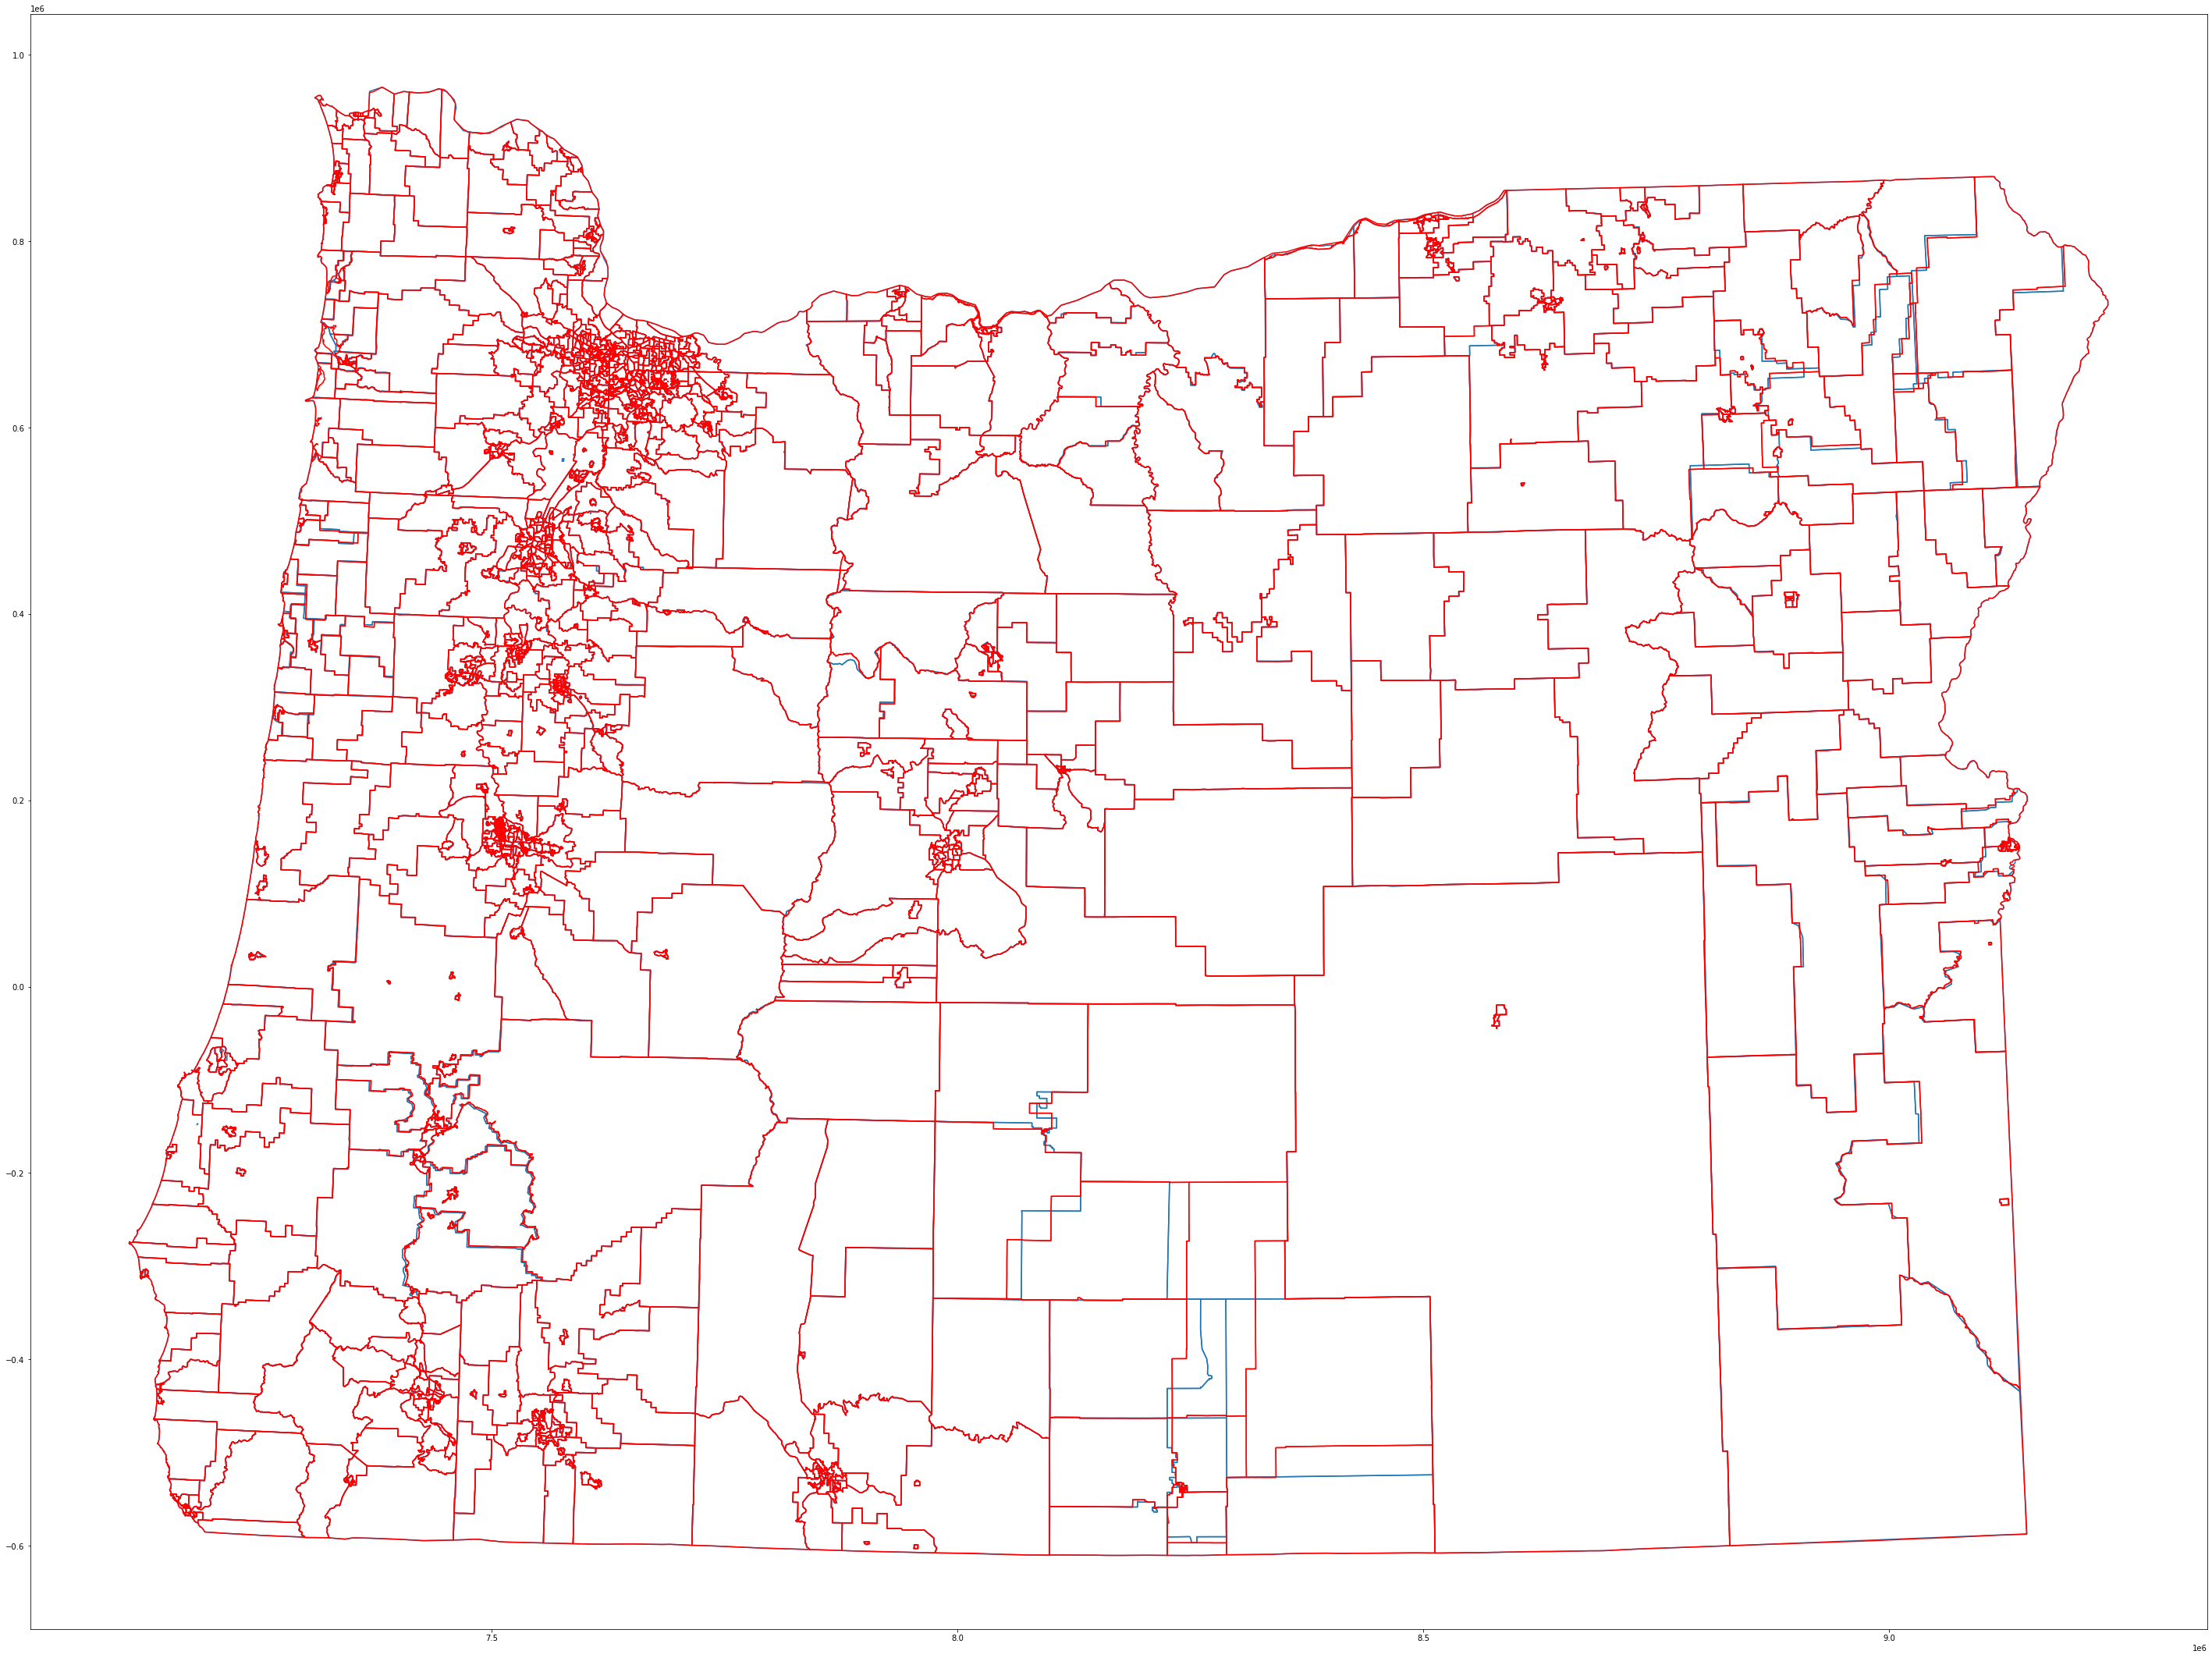

In [31]:
ax = source_shapefile.boundary.plot(figsize=(50,50))
vest_or_18.boundary.plot(ax=ax,color="red")

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/plotting.py:384: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


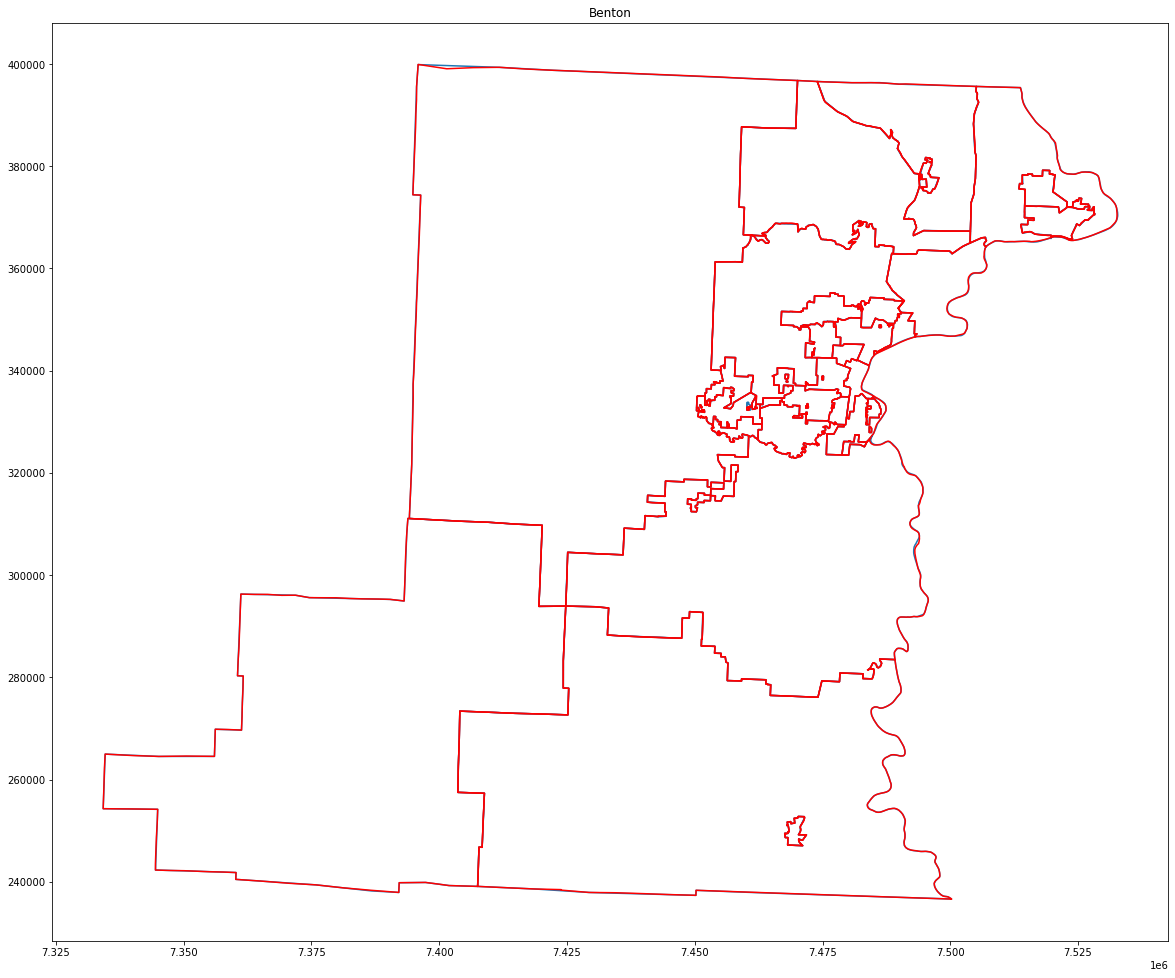

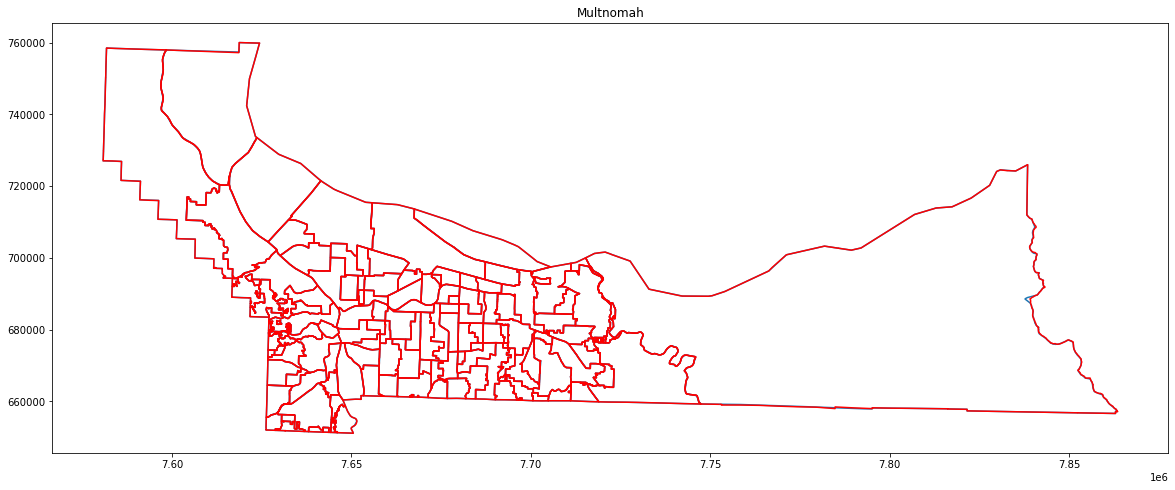

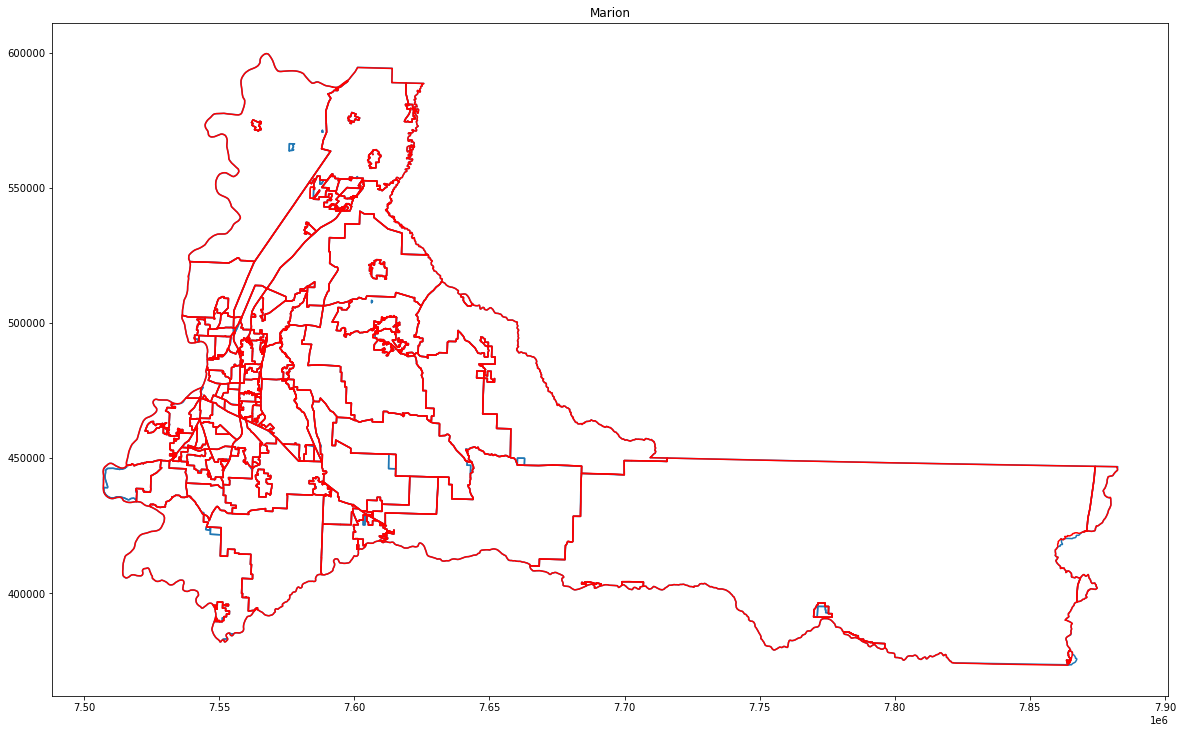

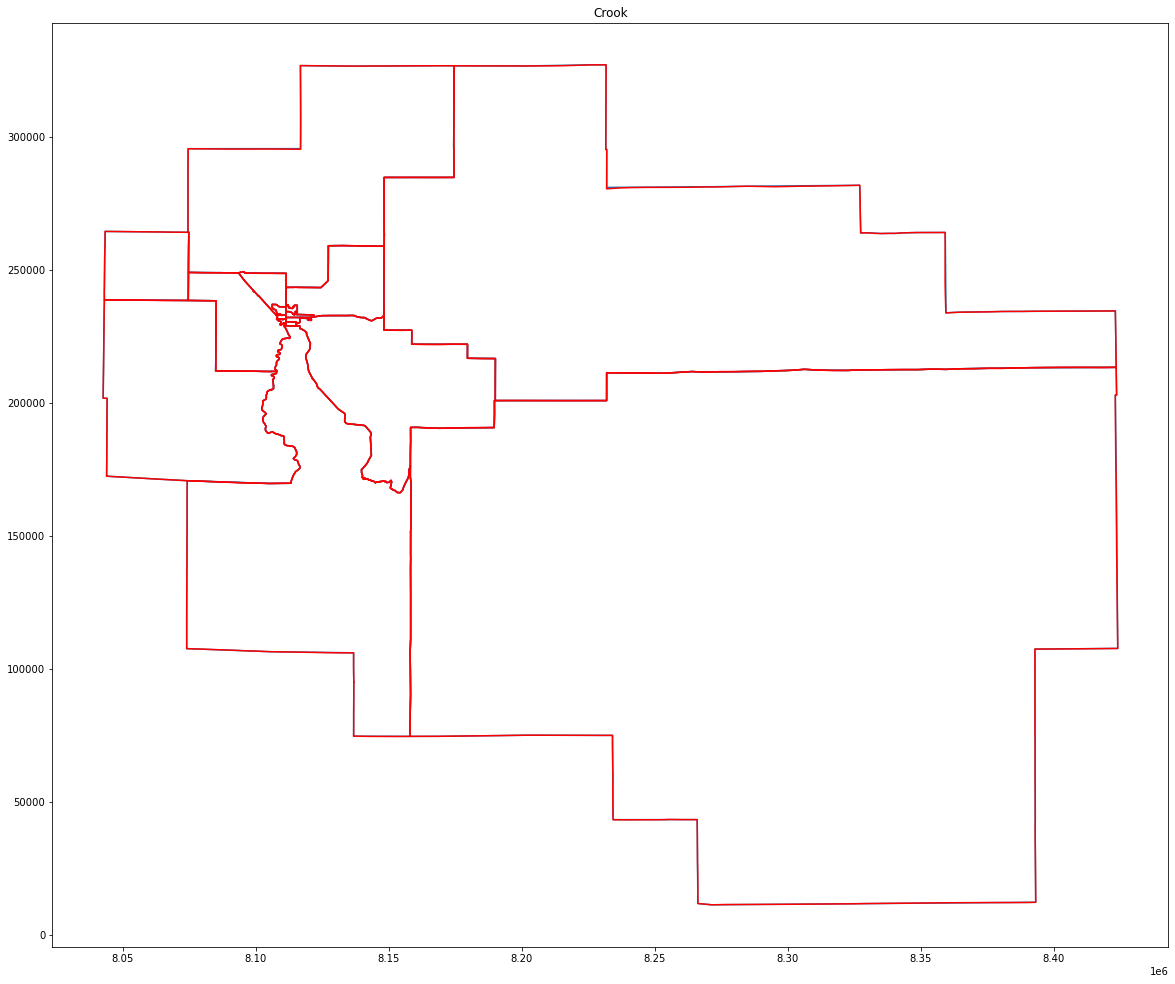

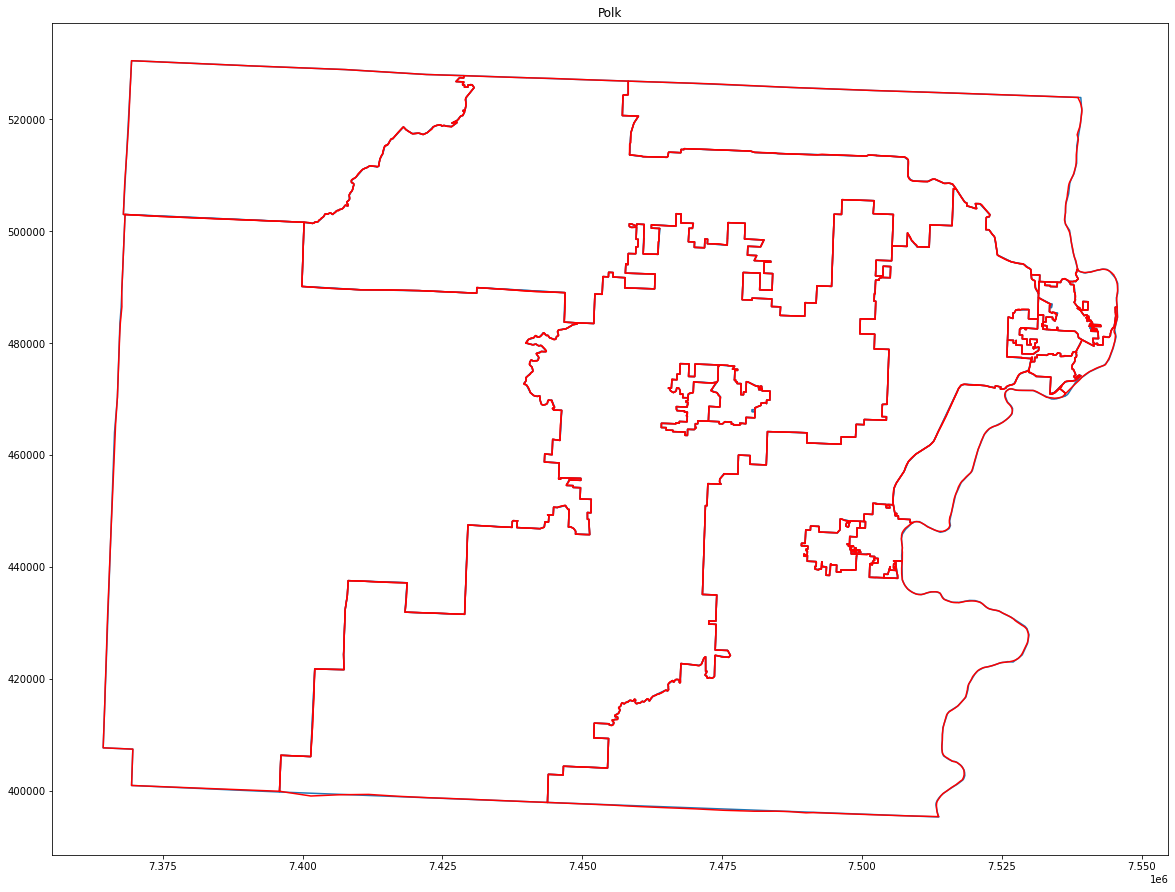

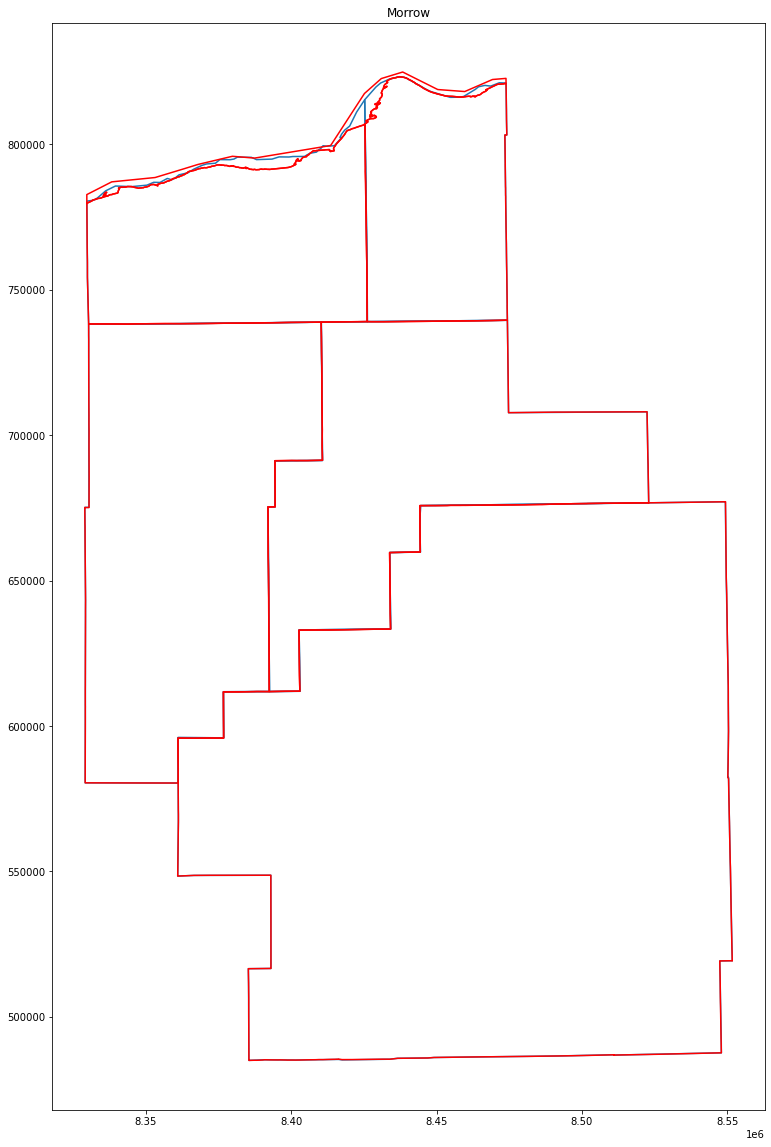

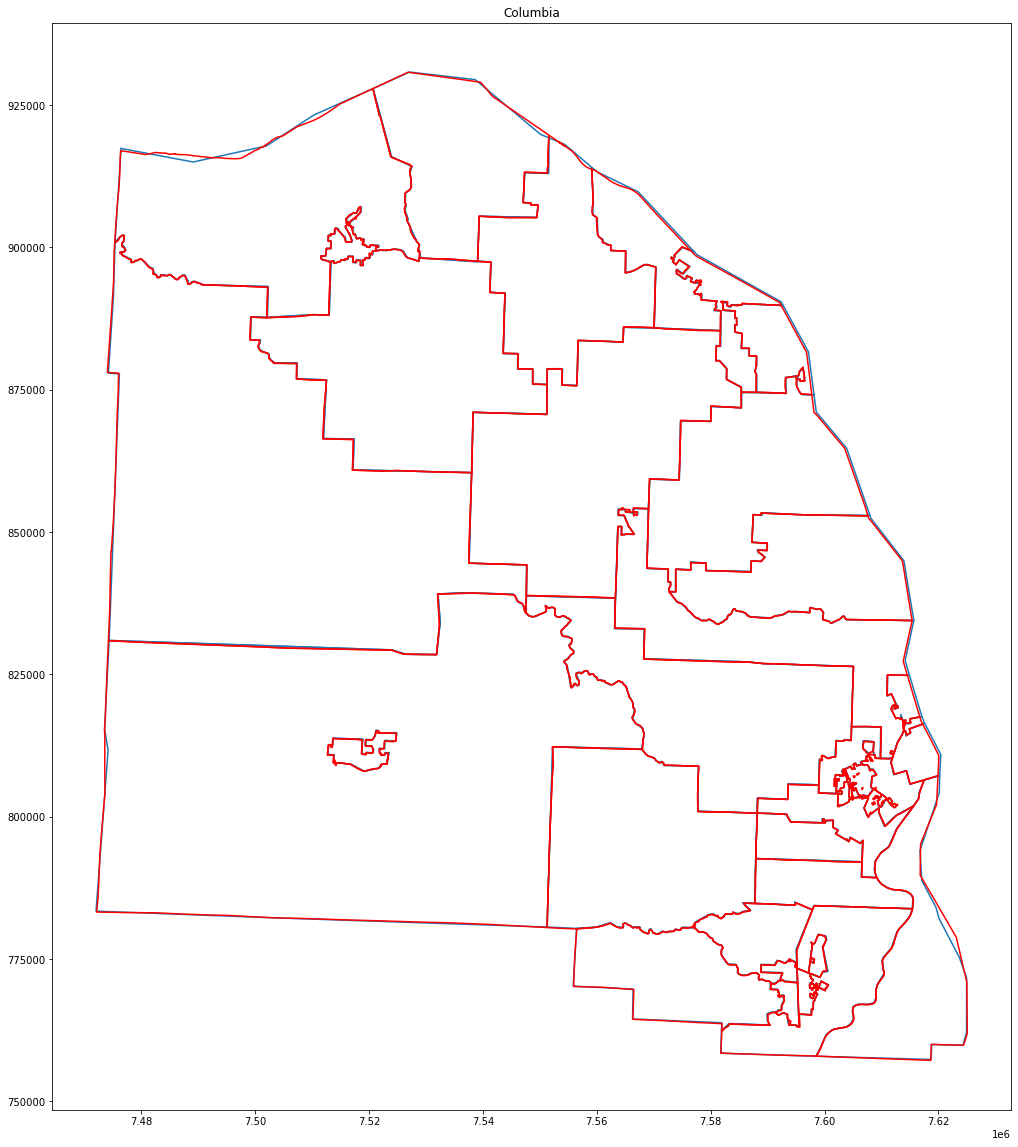

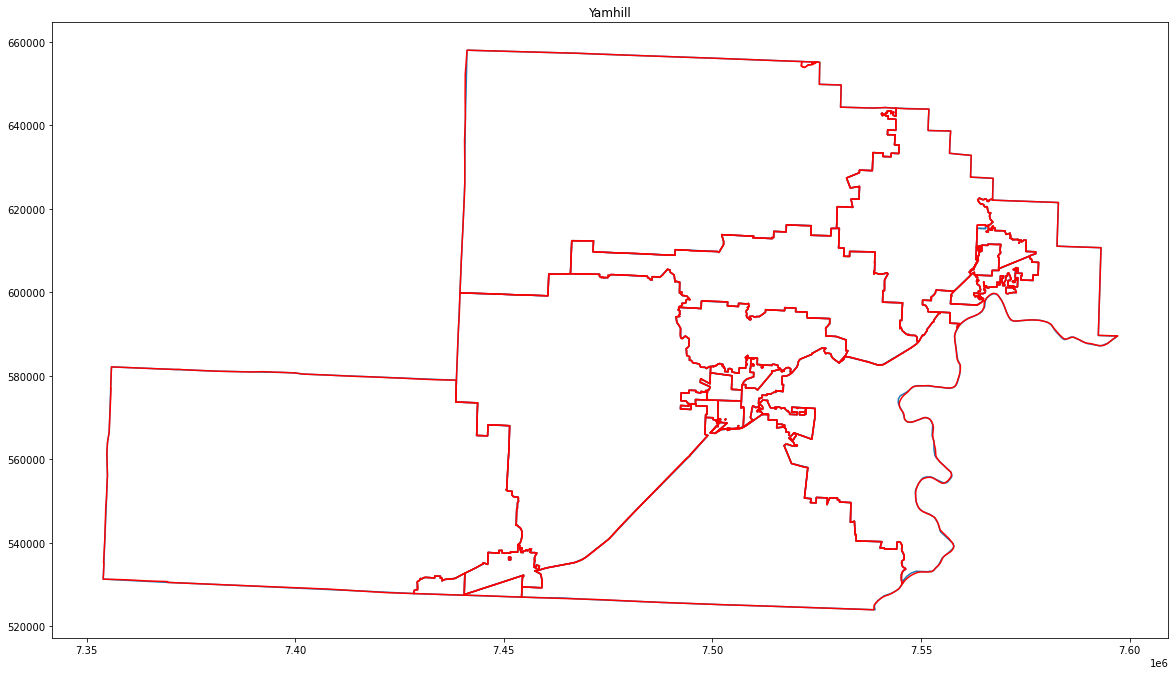

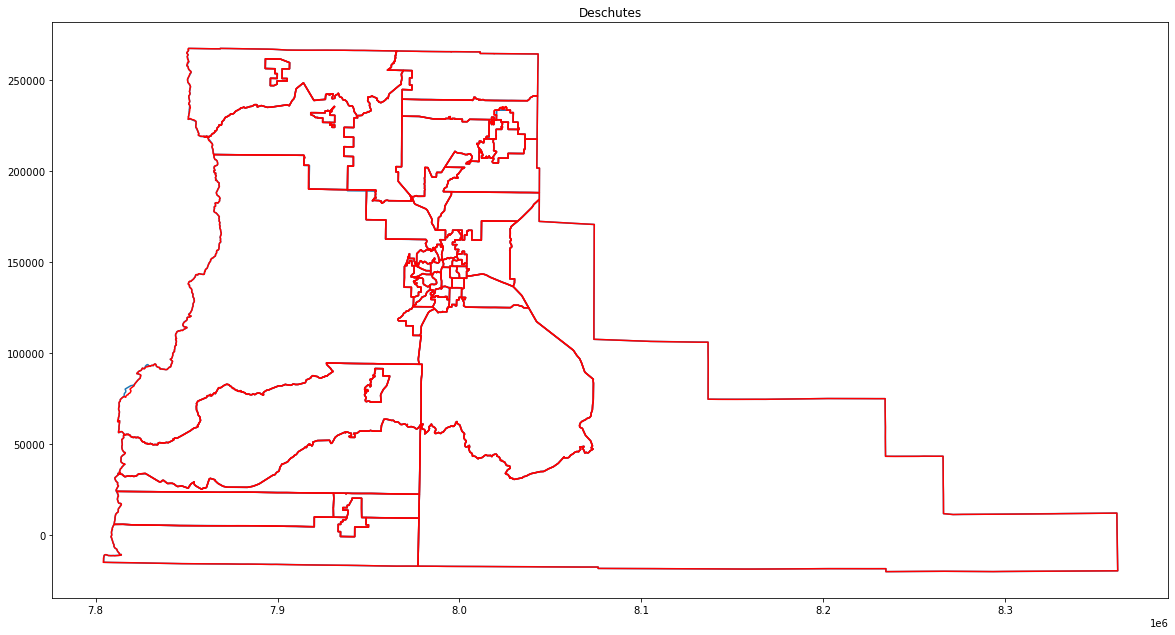

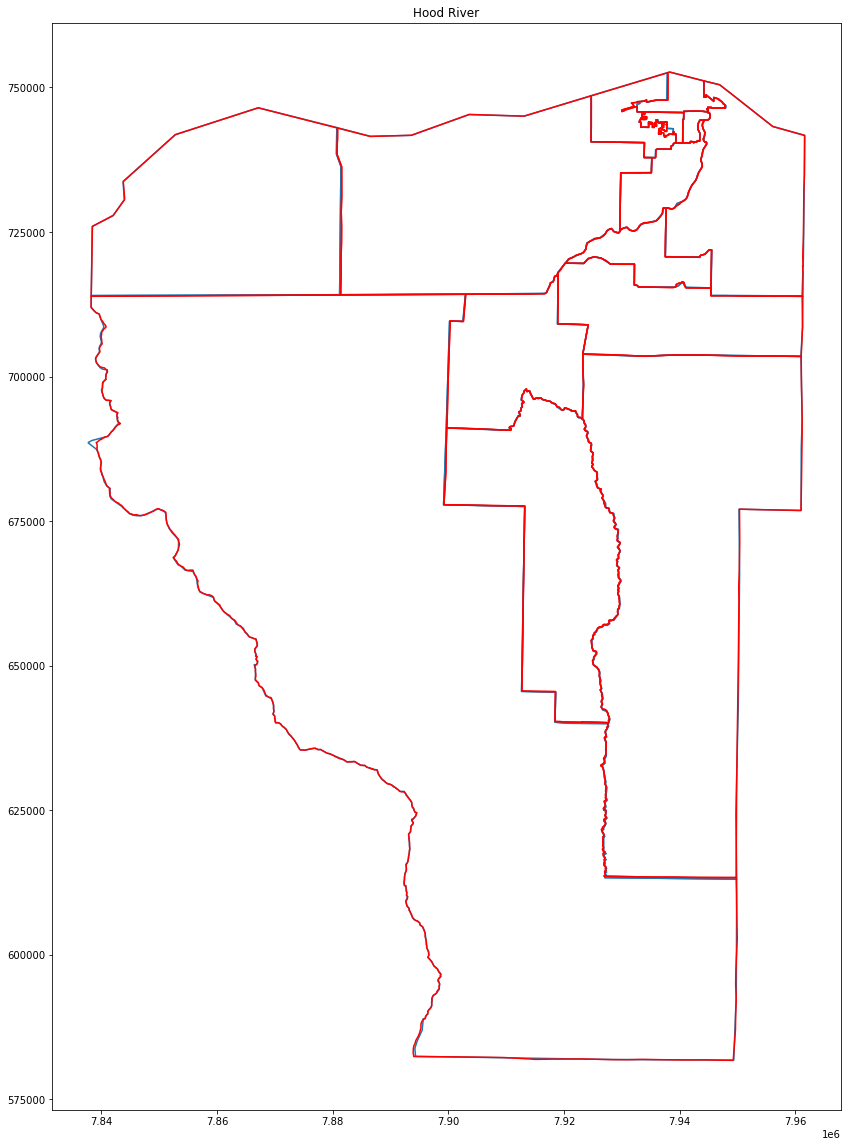

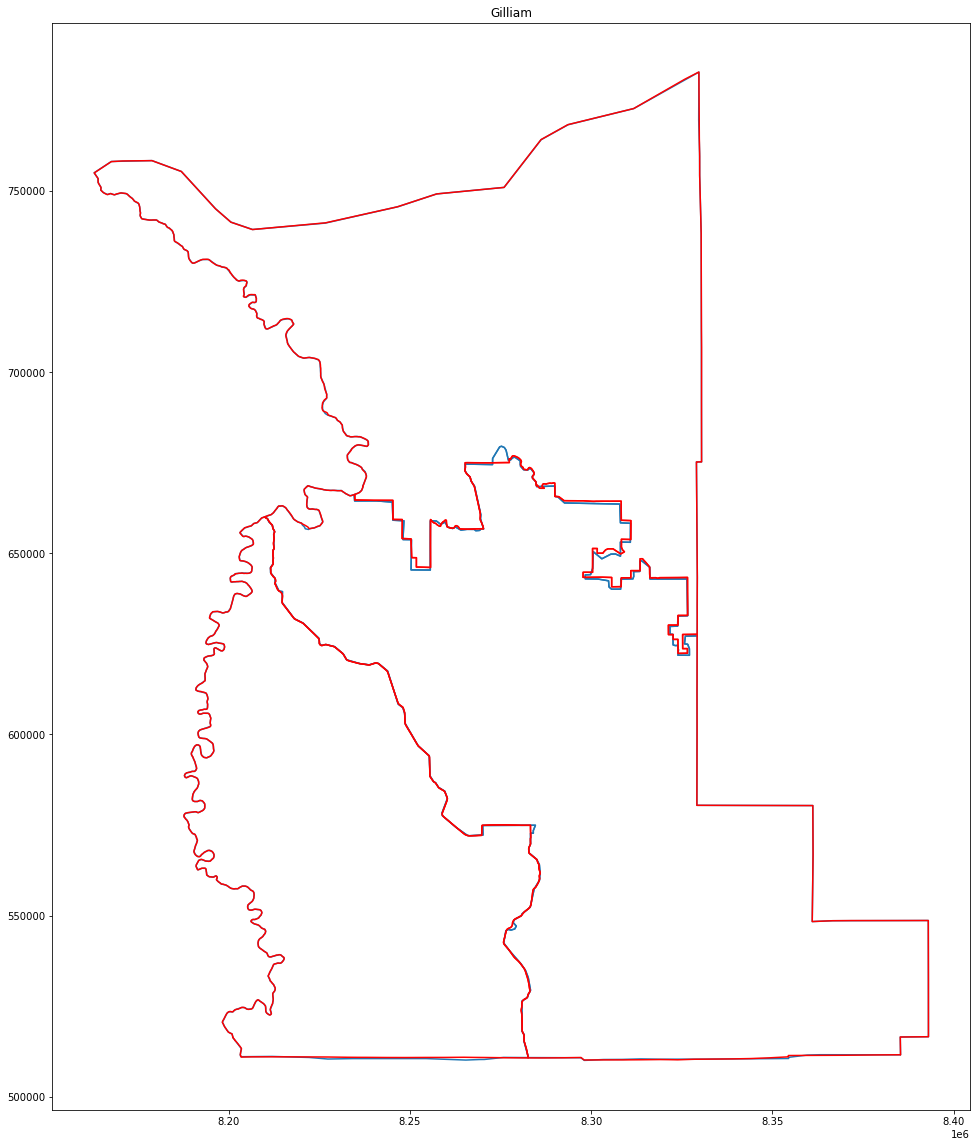

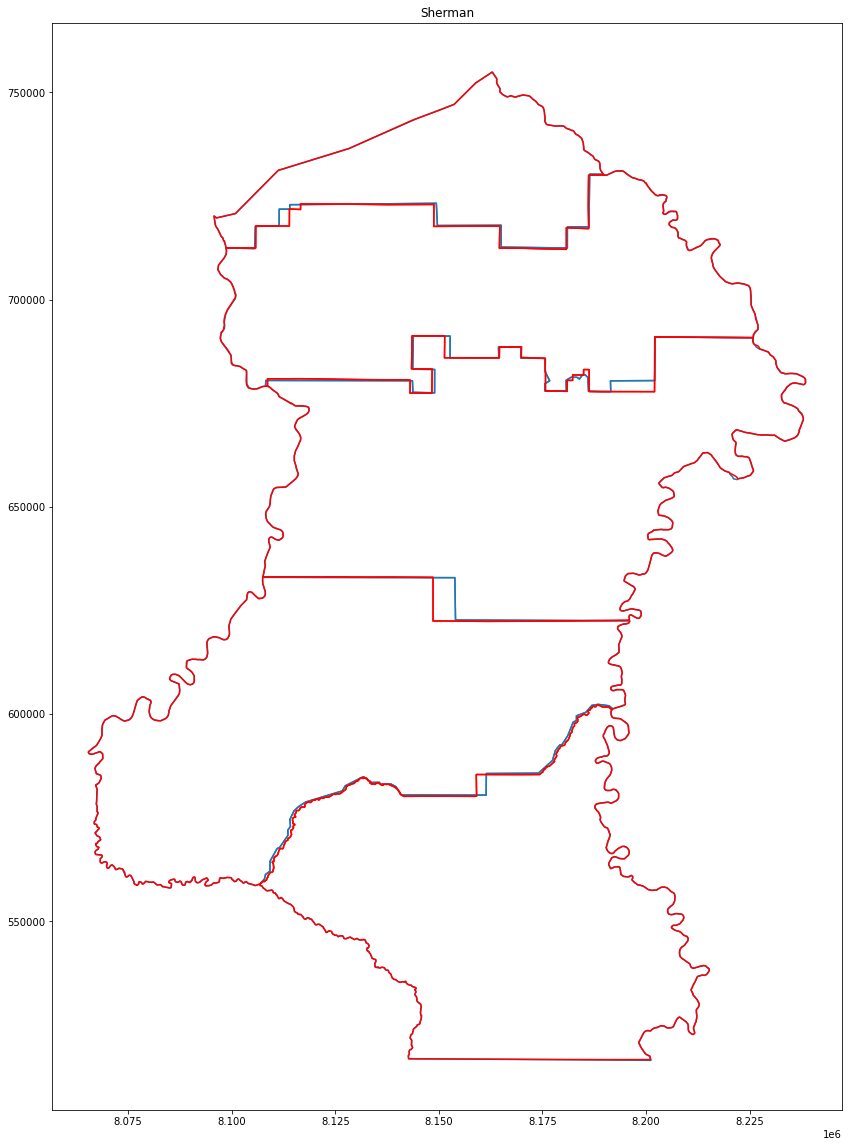

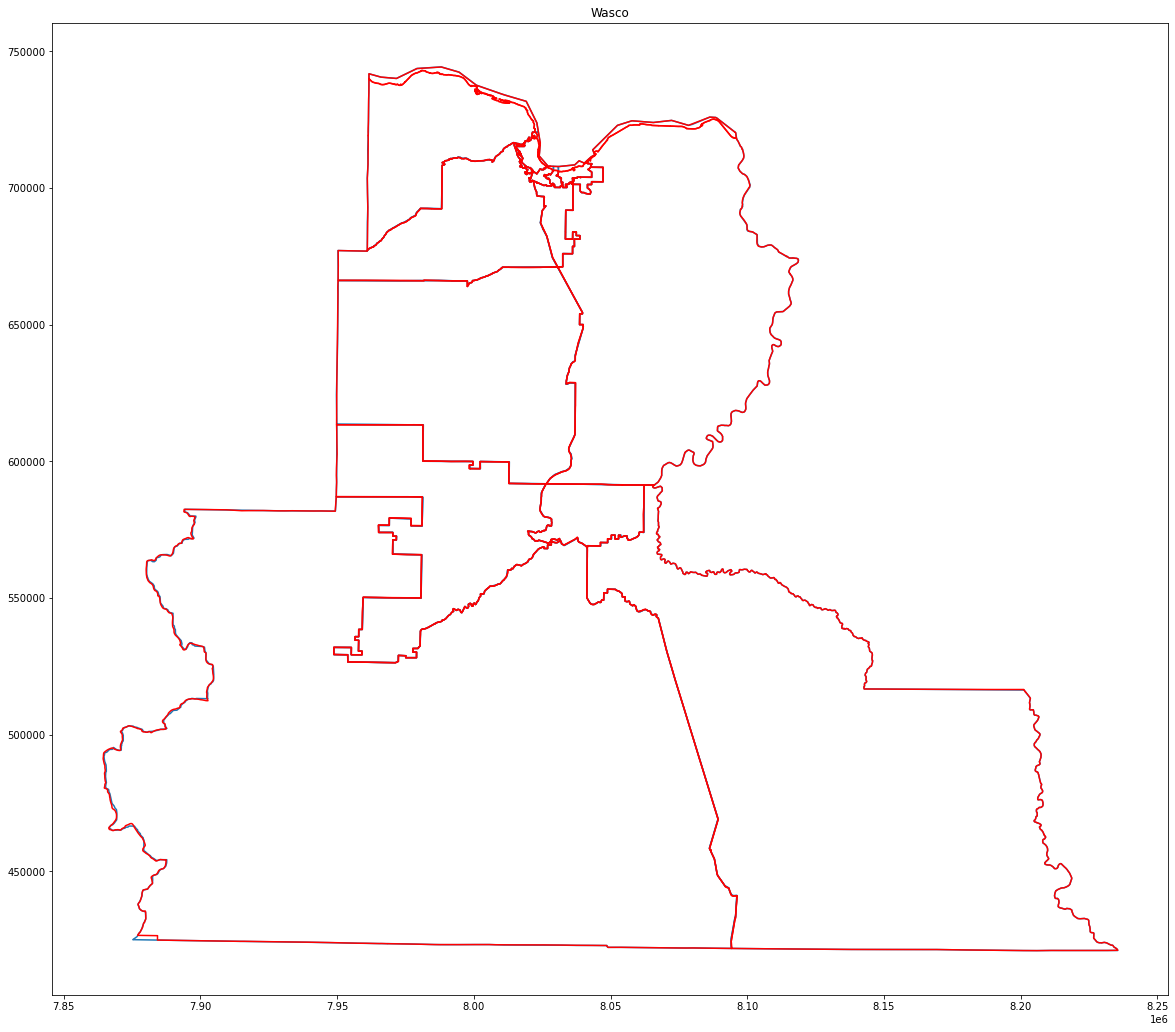

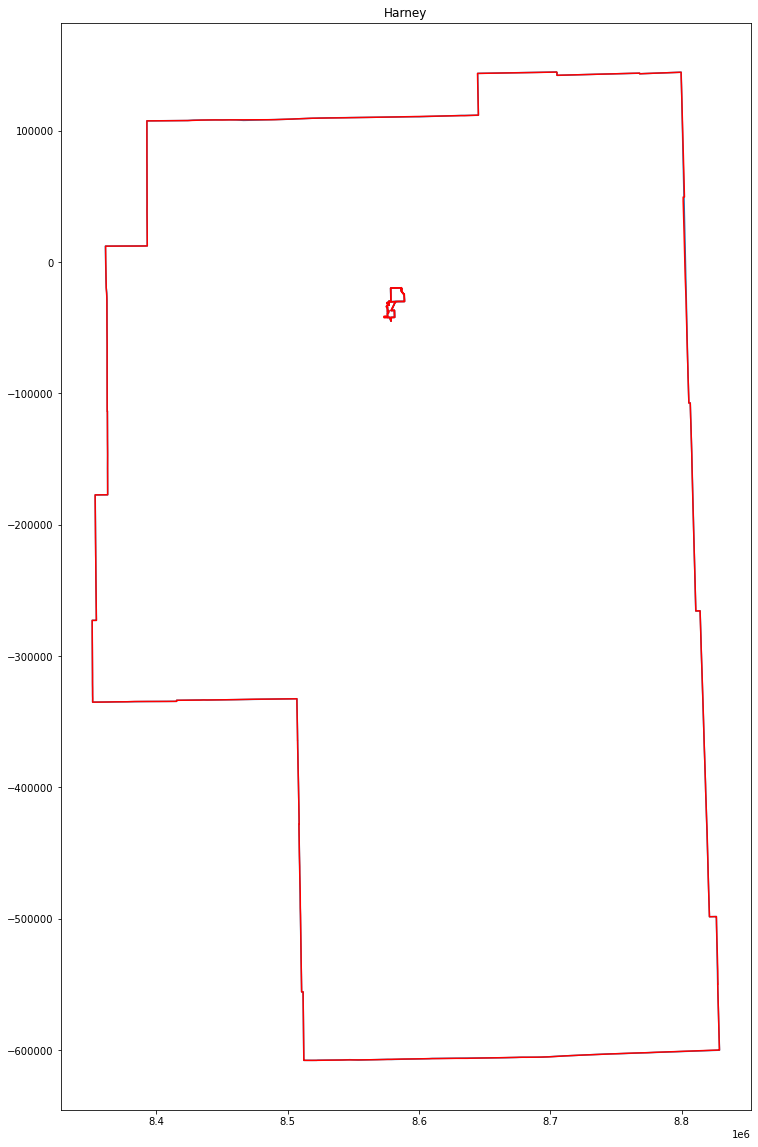

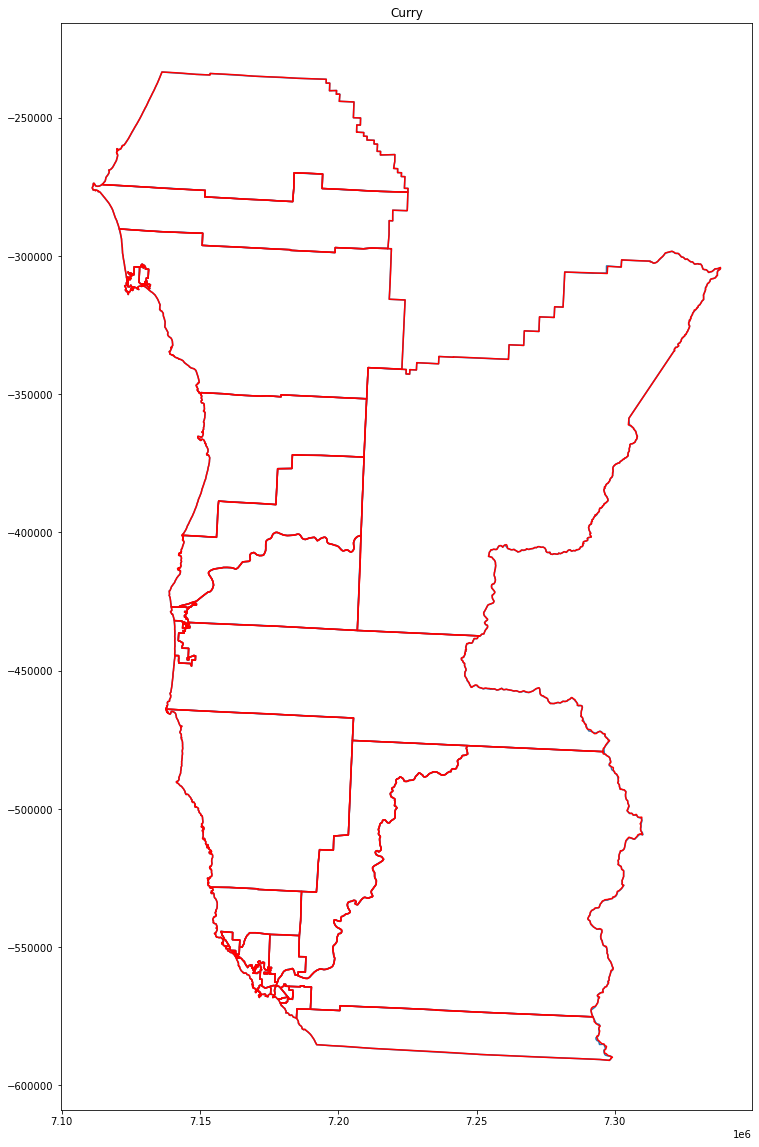

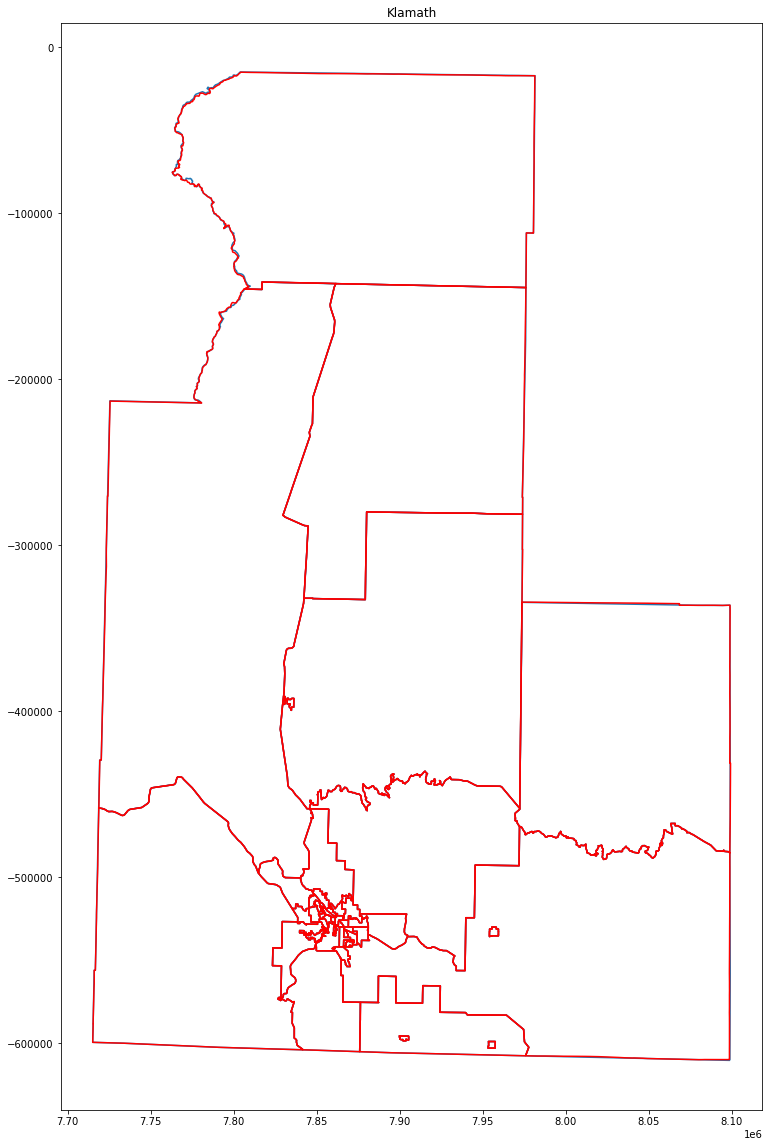

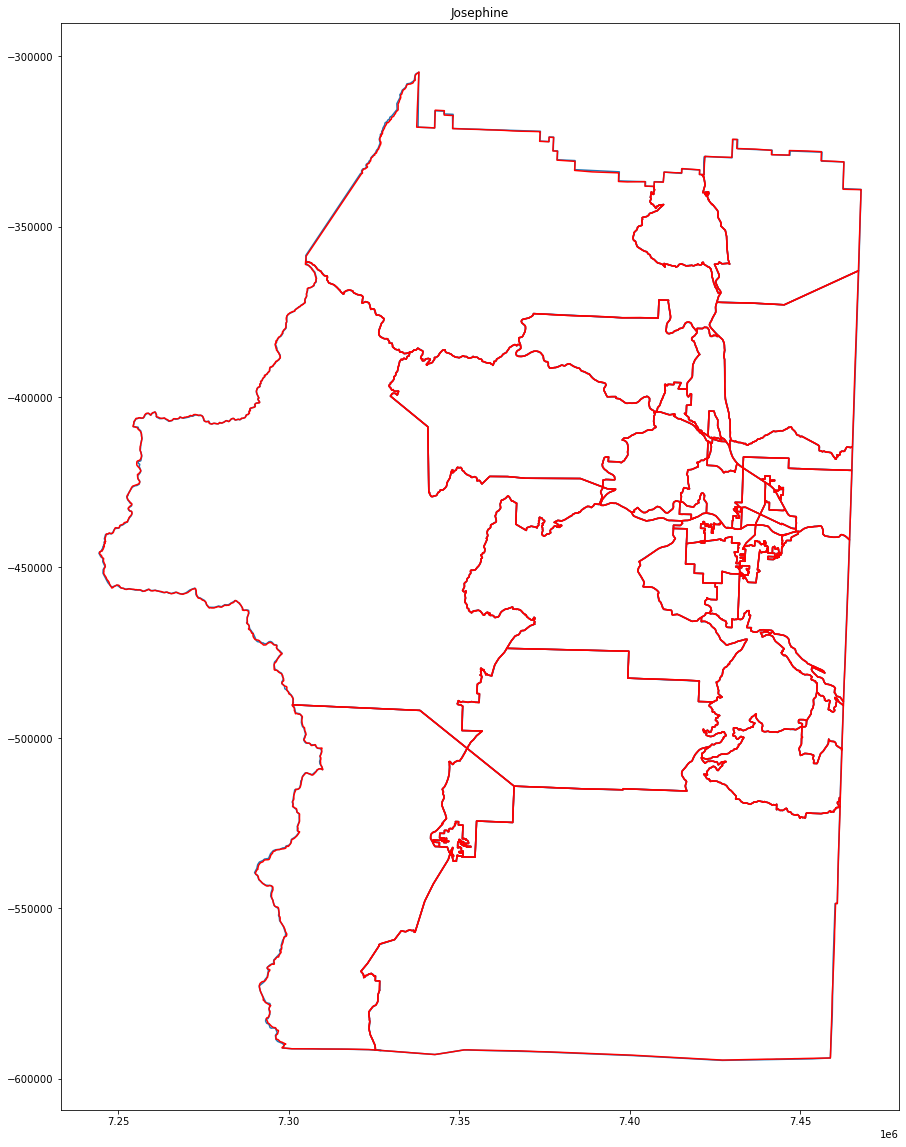

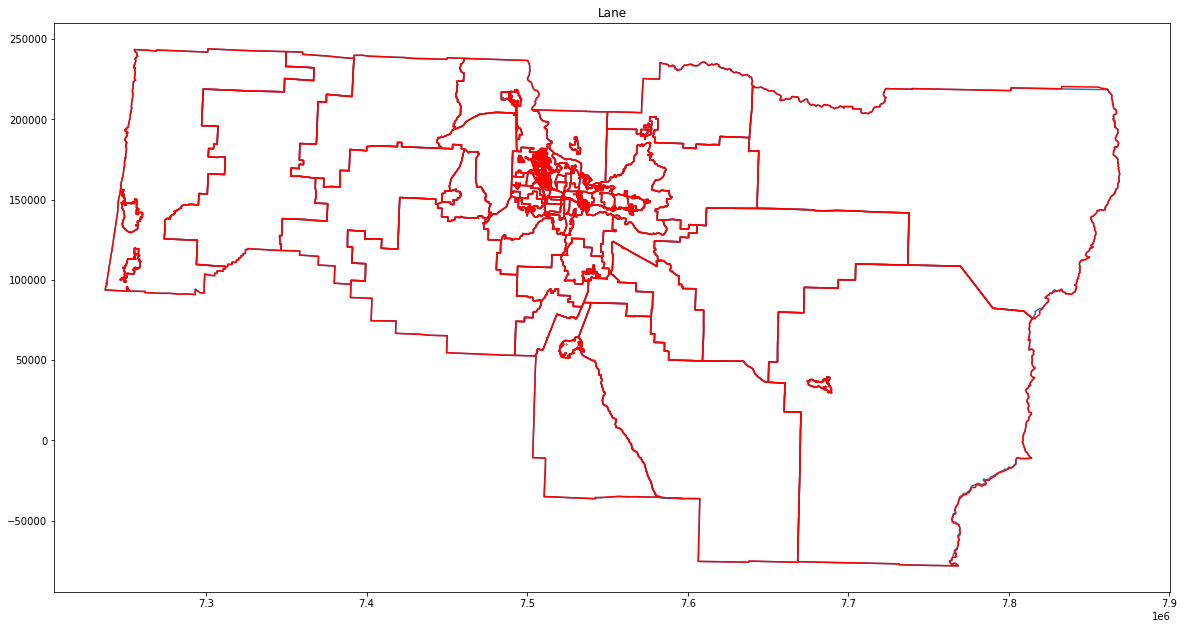

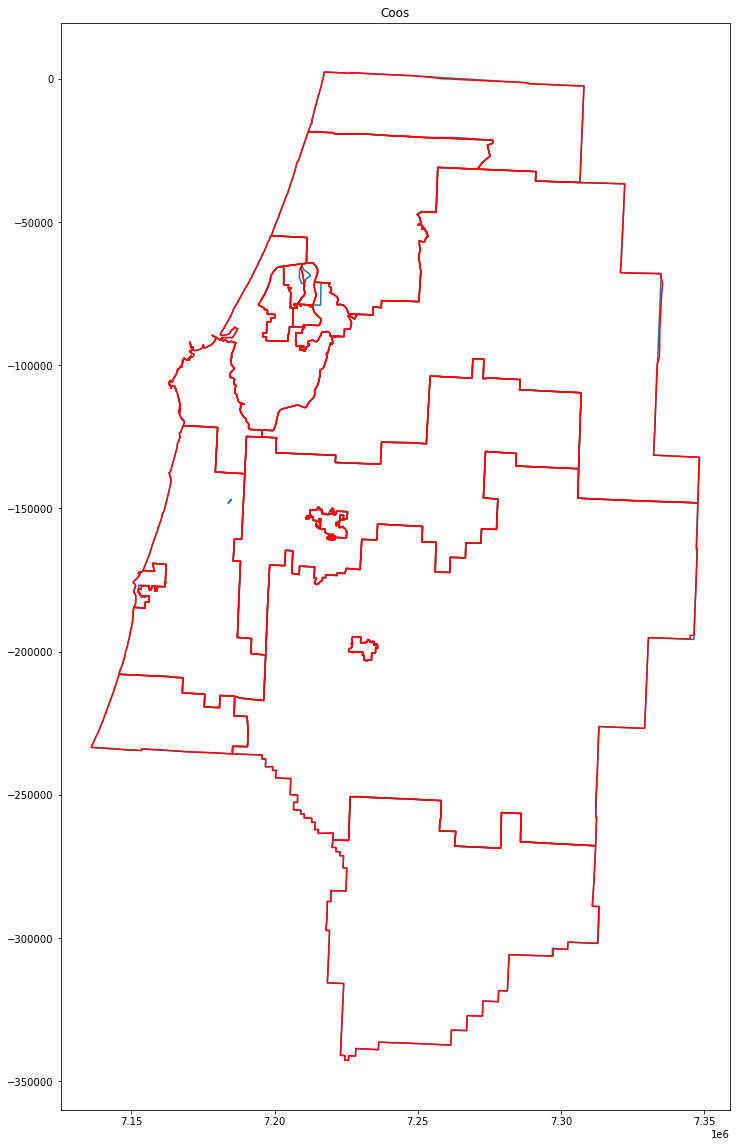

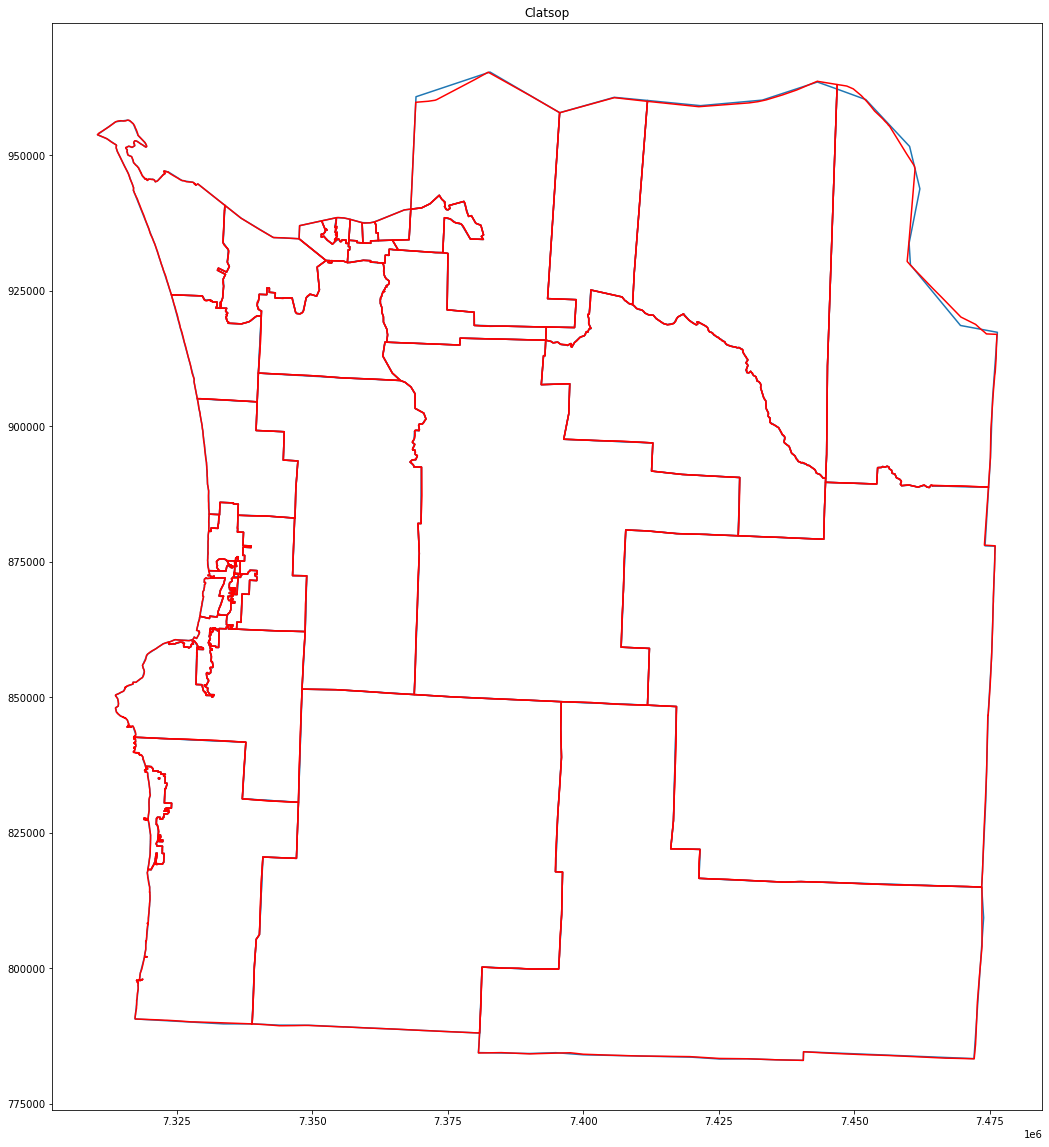

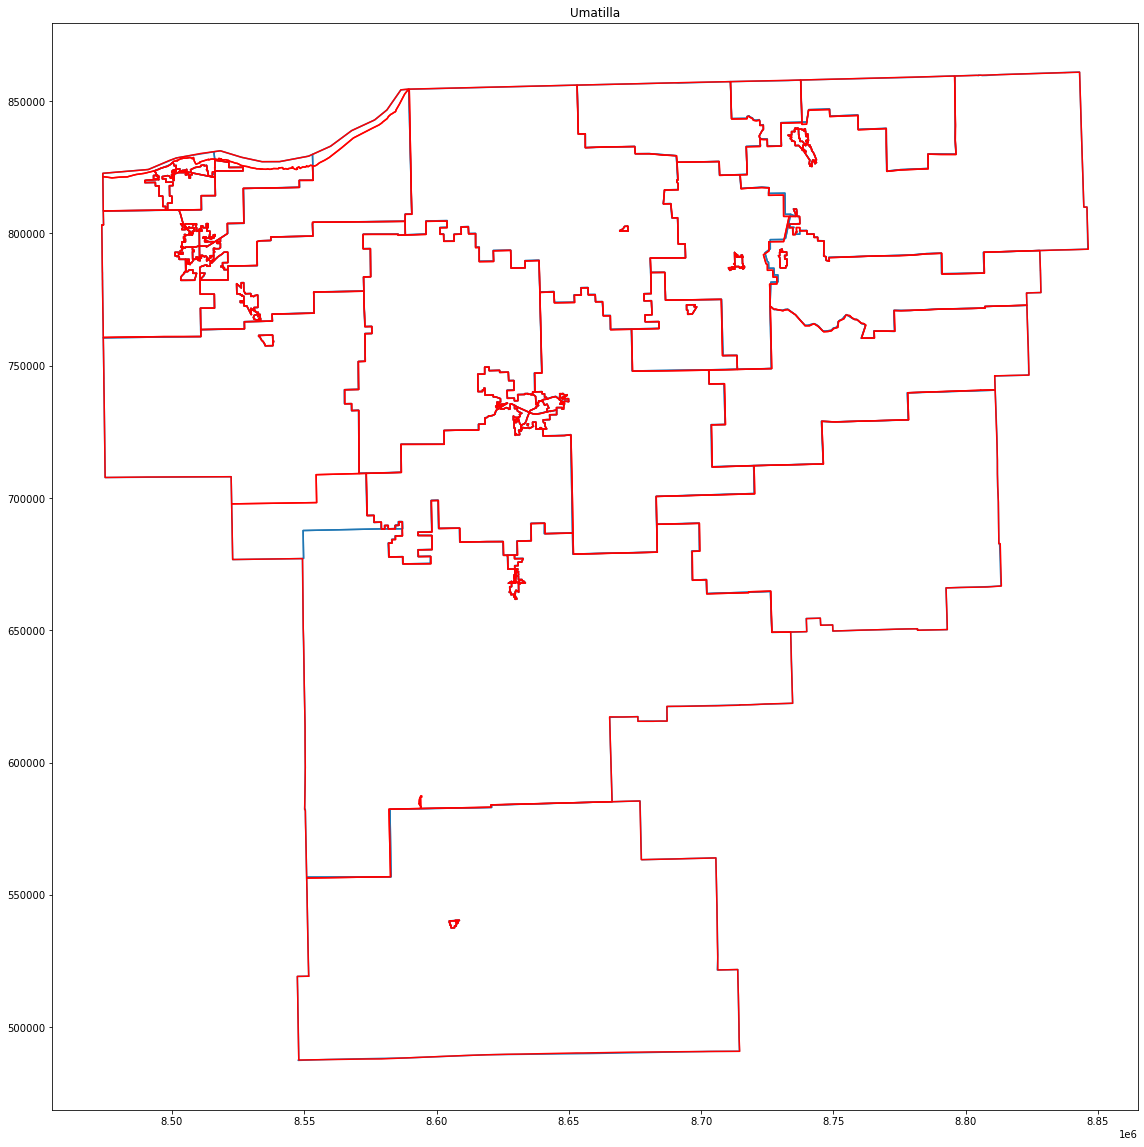

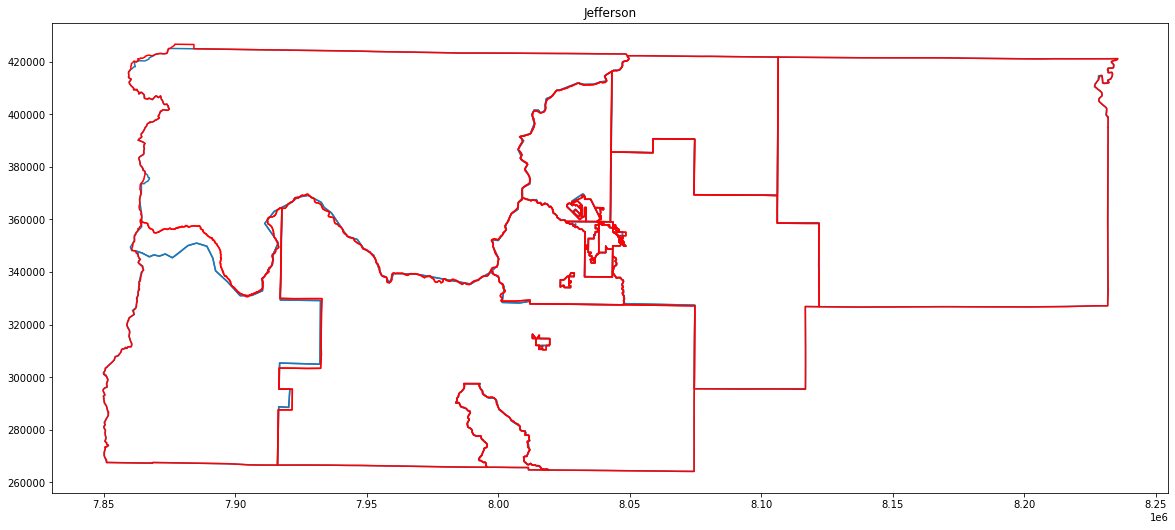

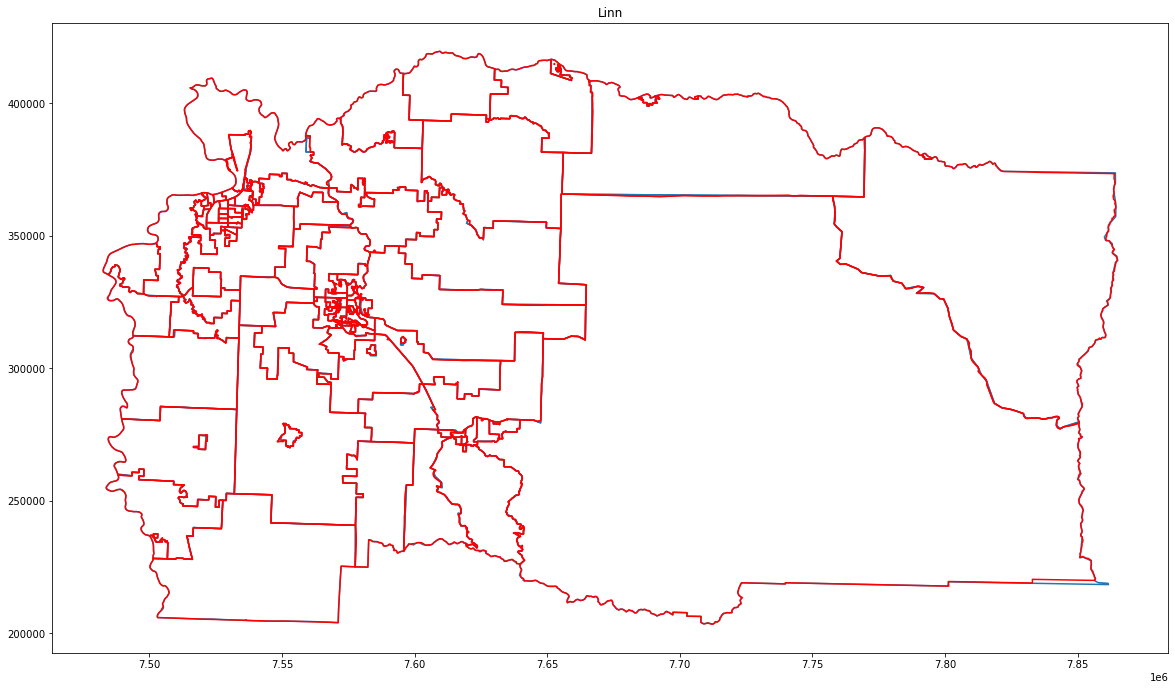

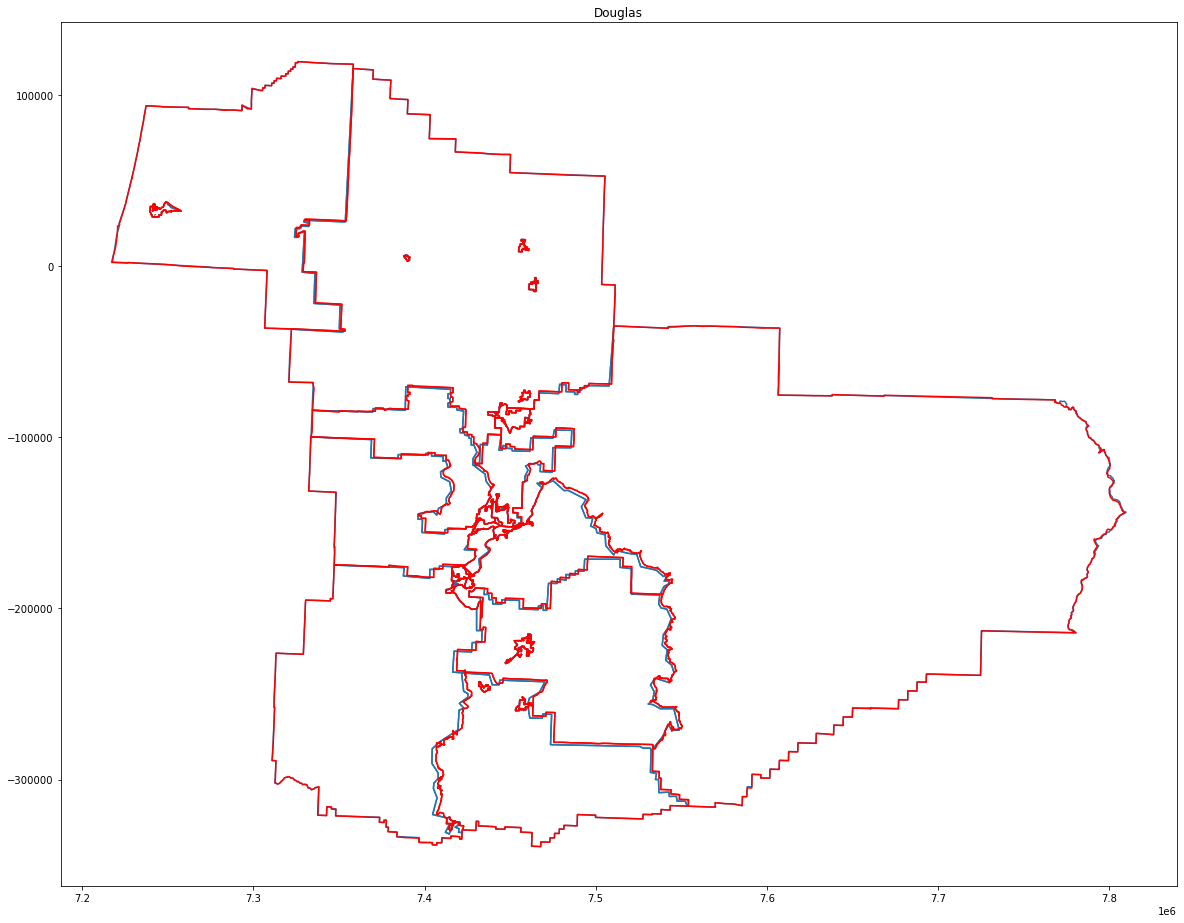

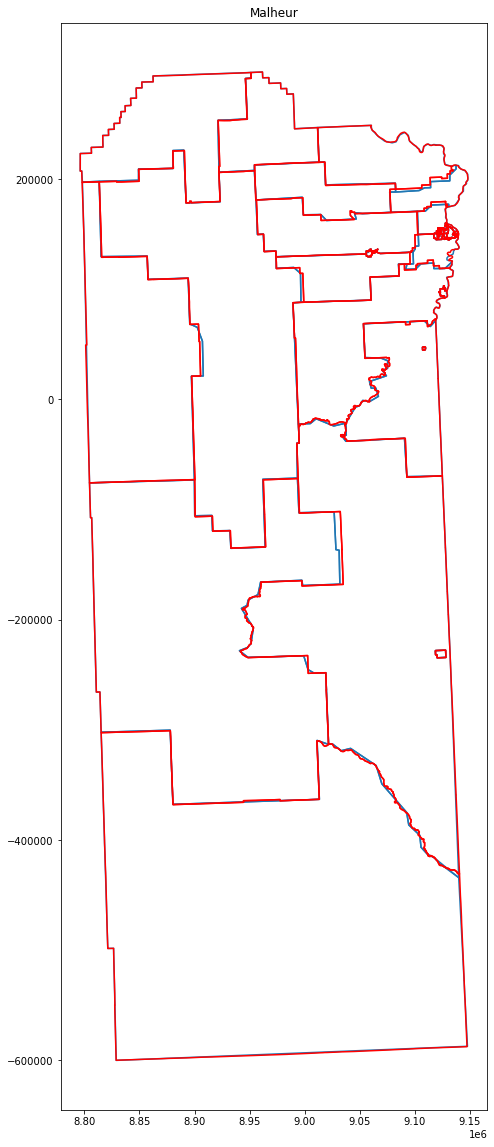

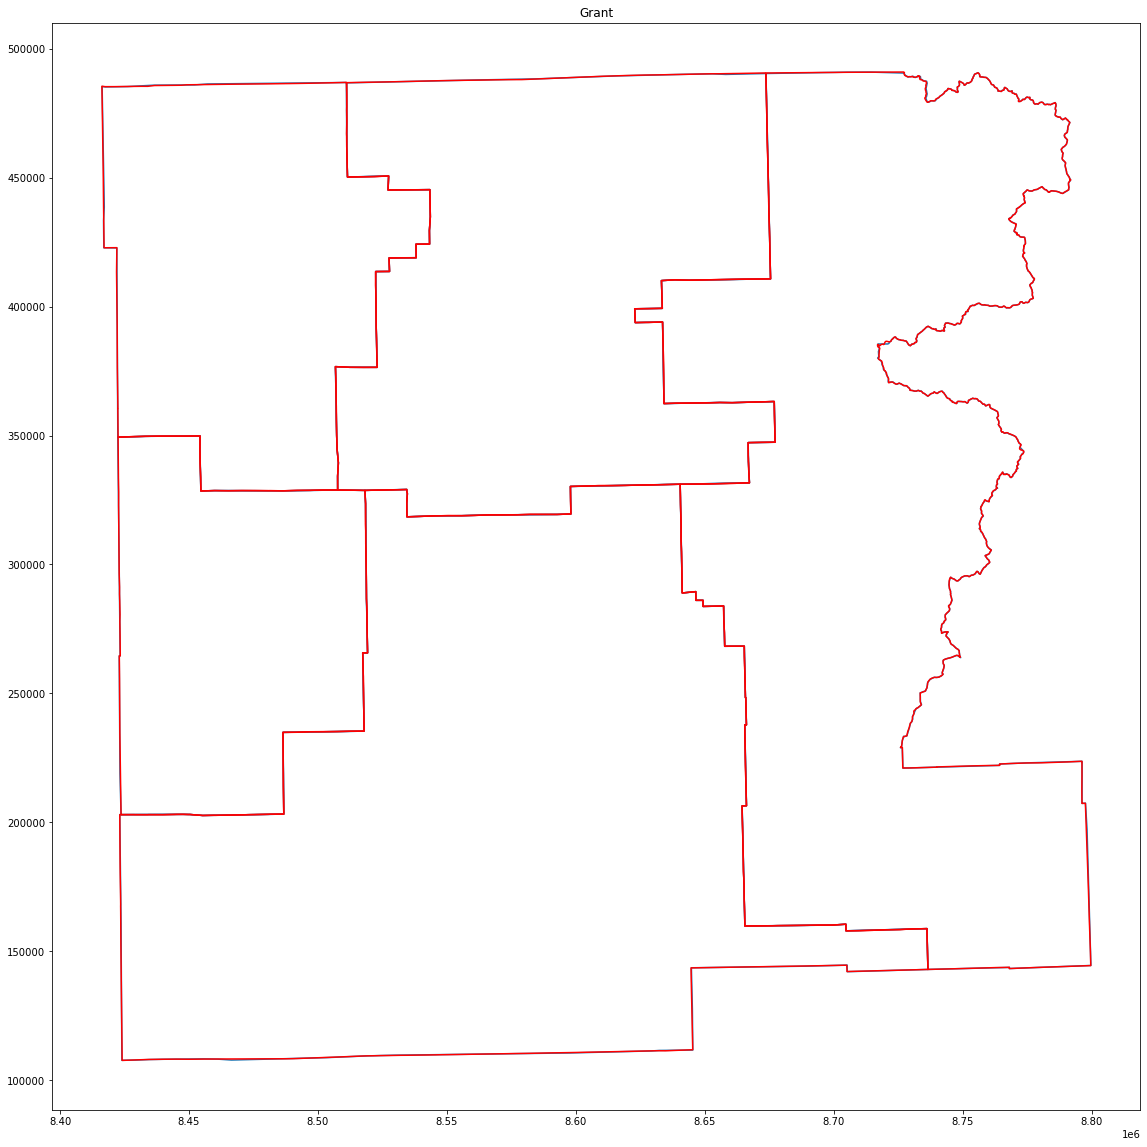

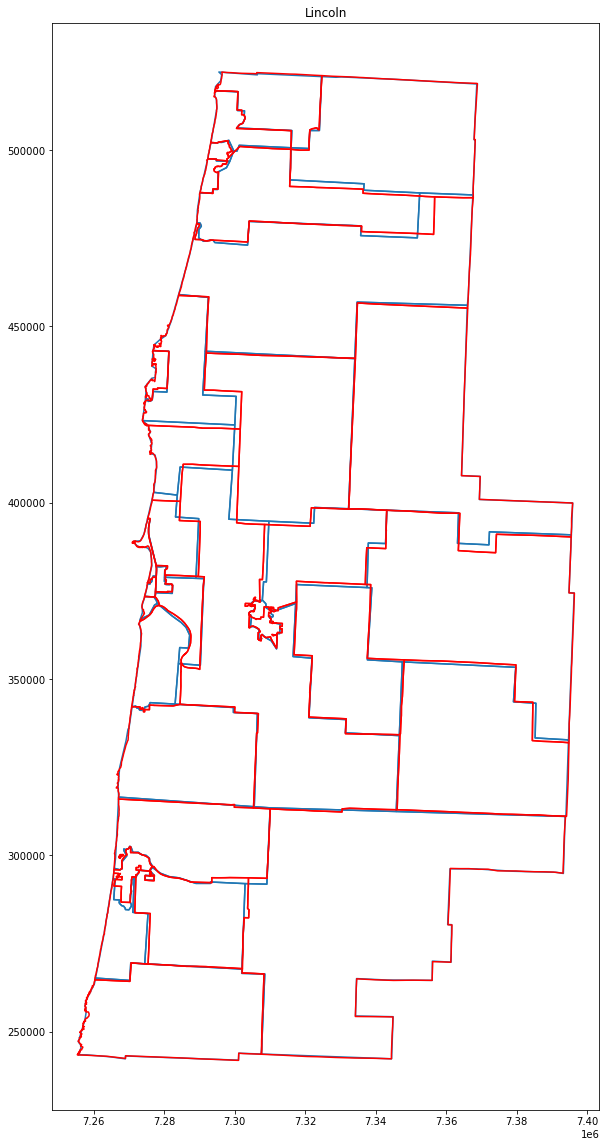

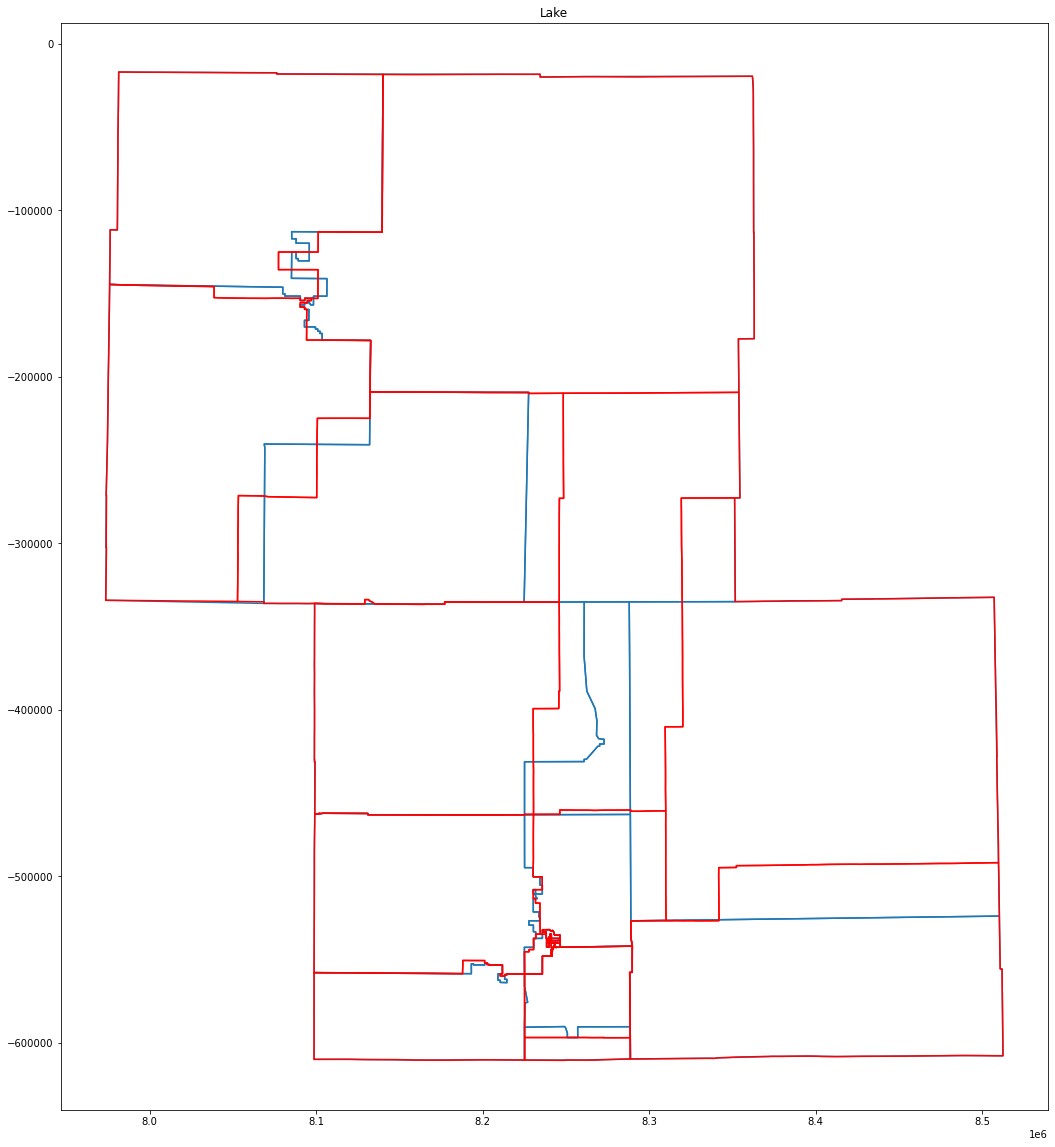

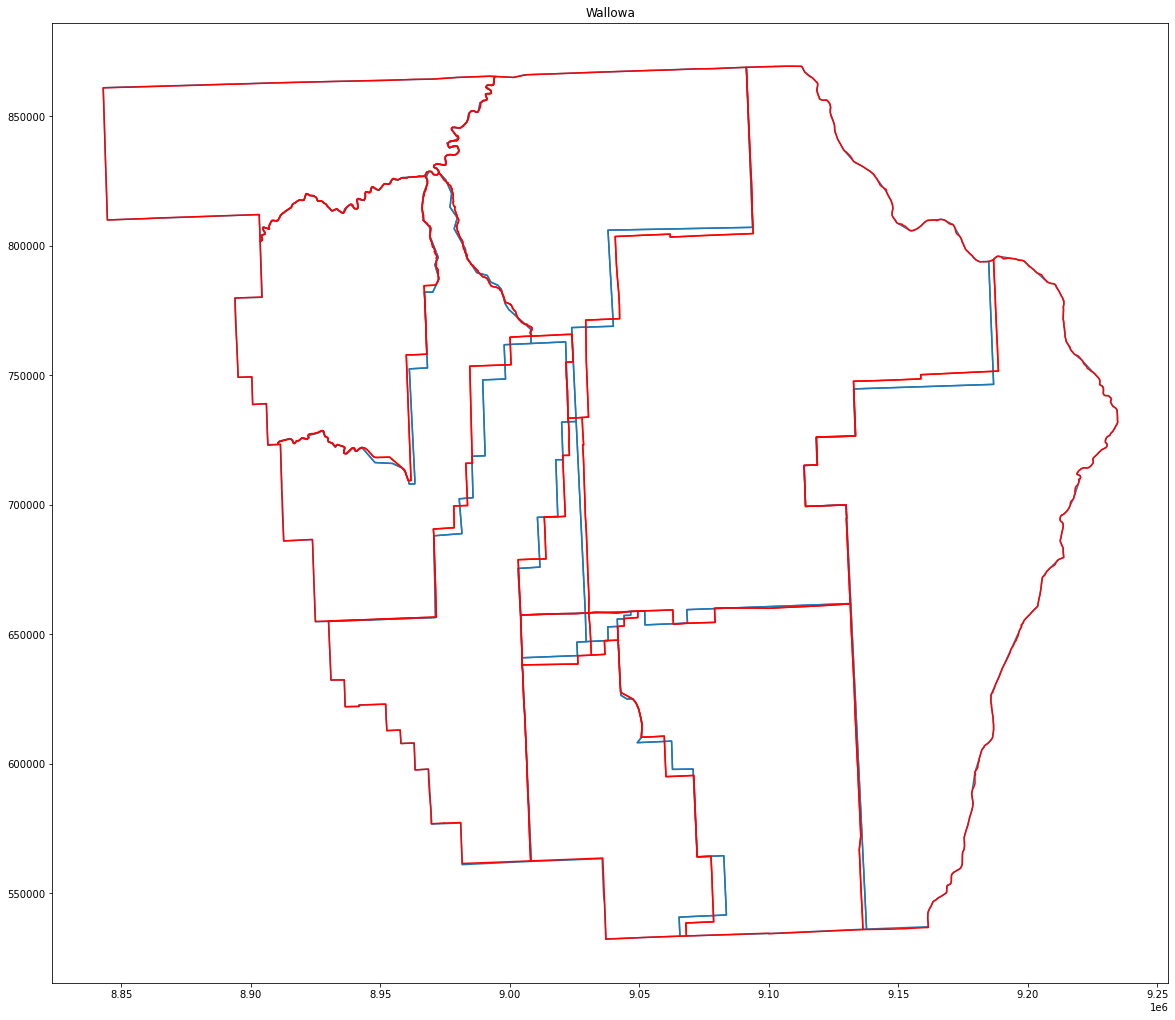

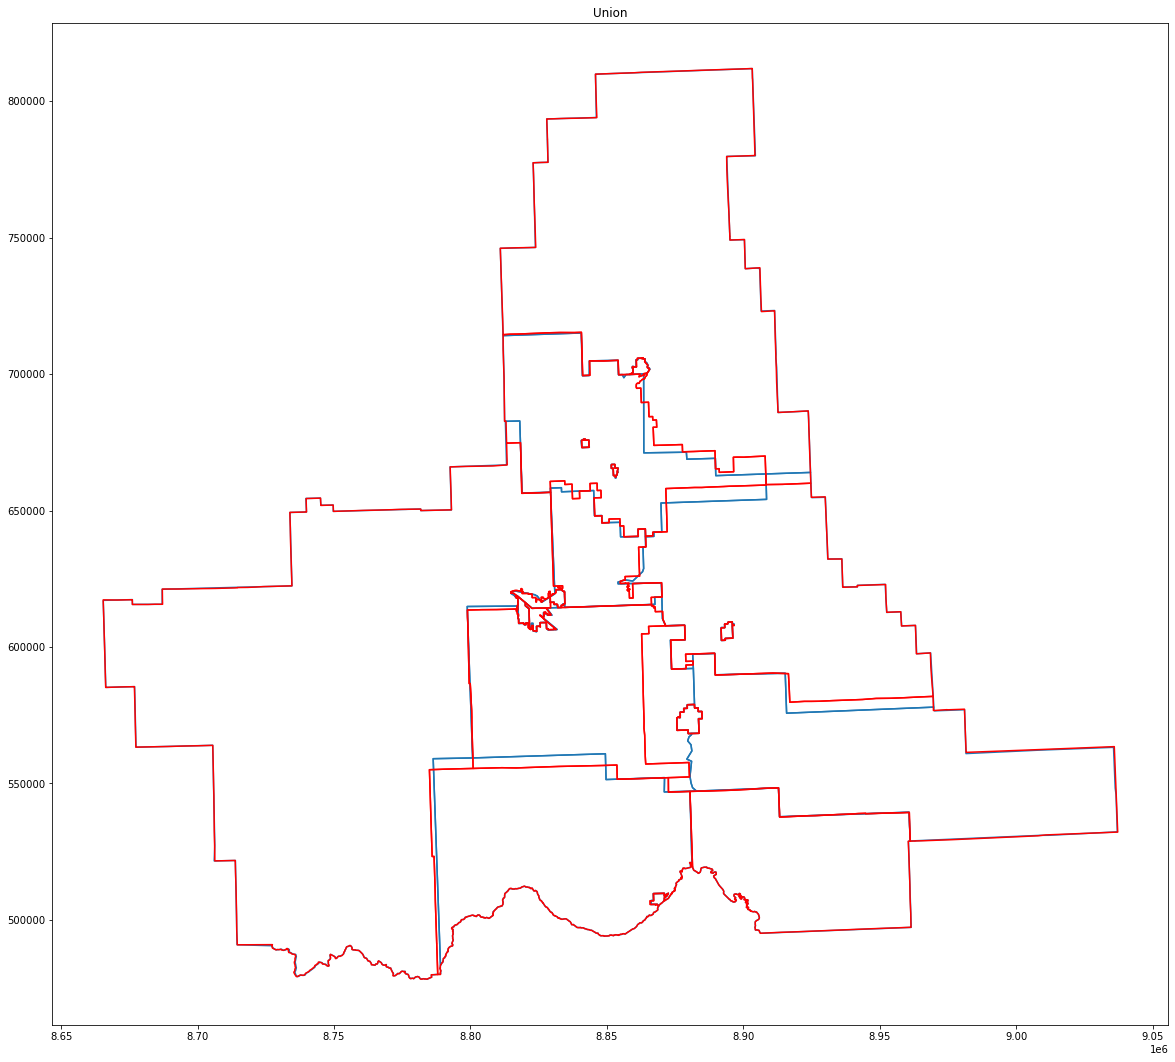

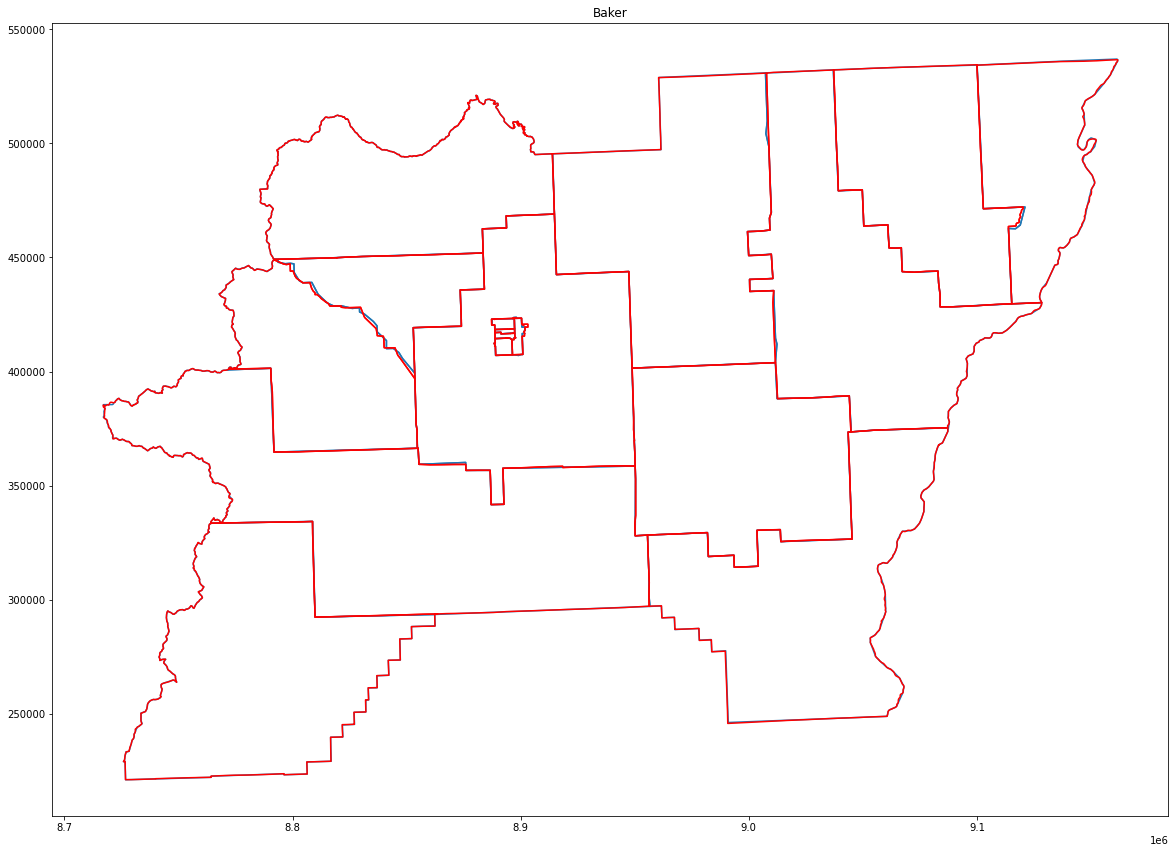

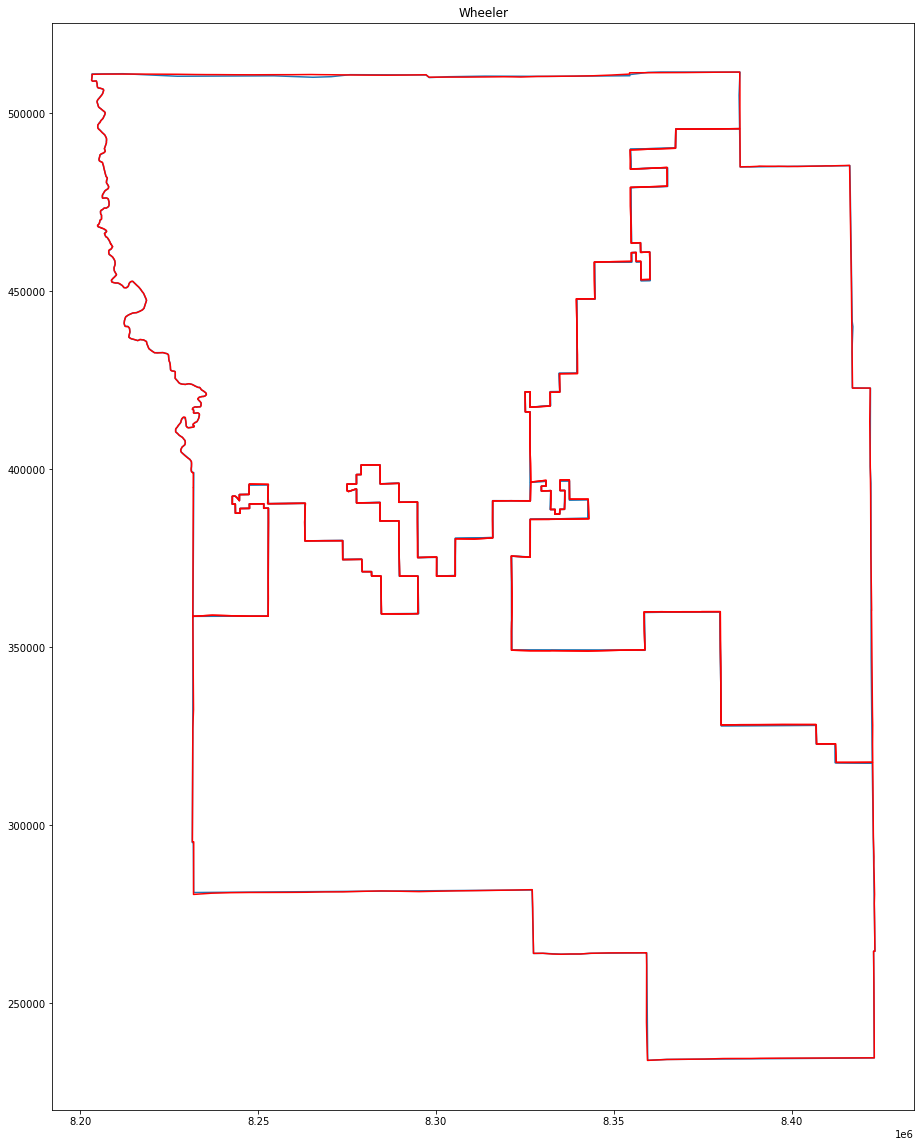

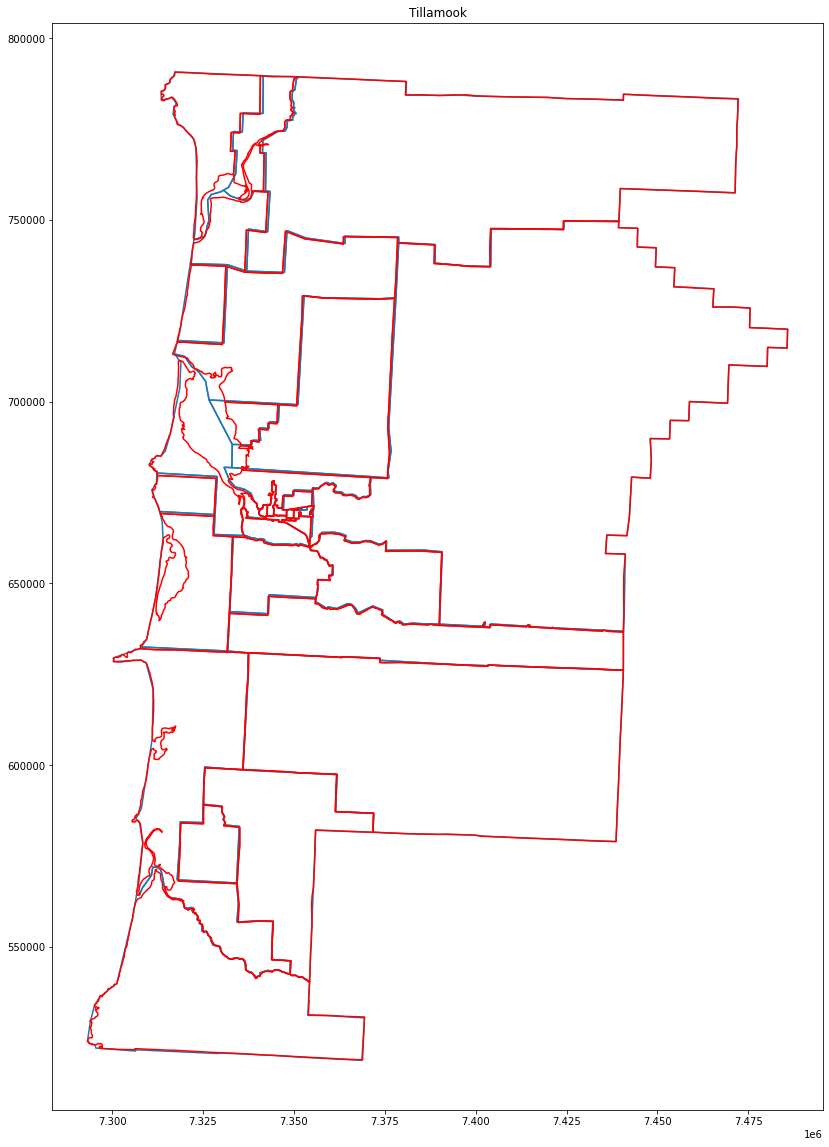

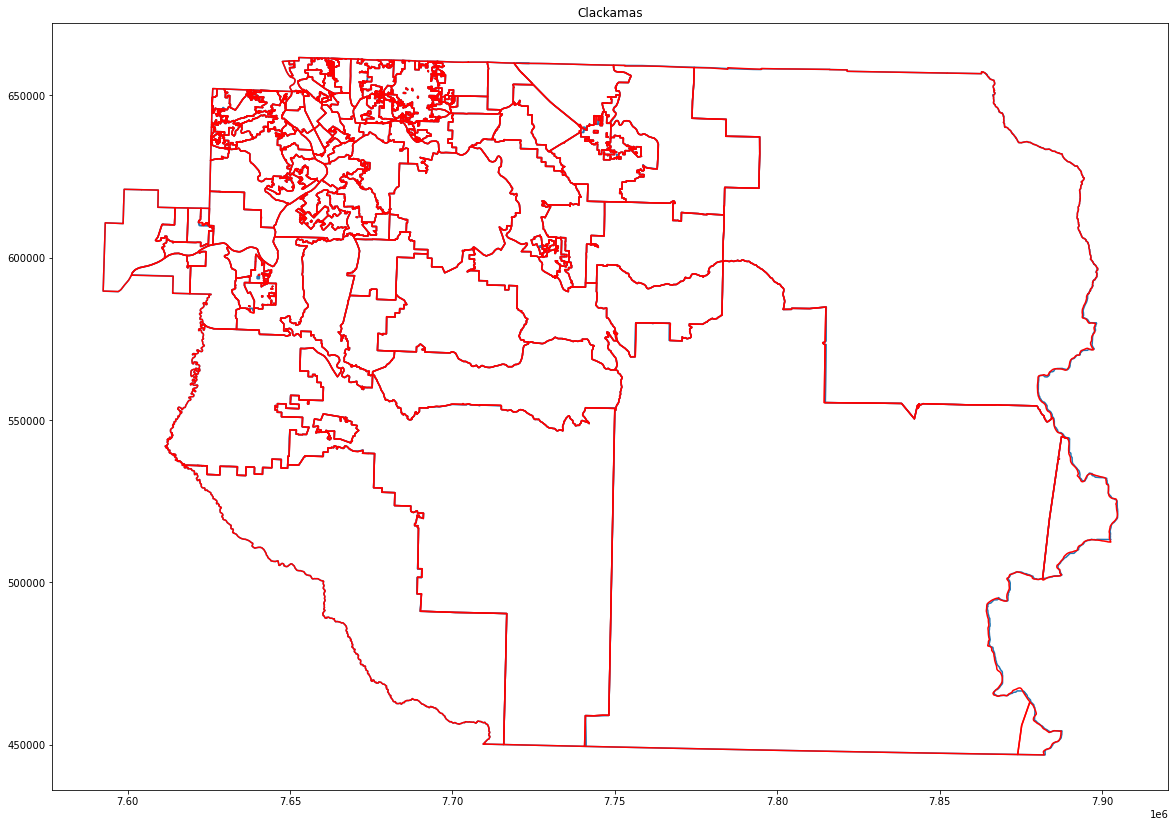

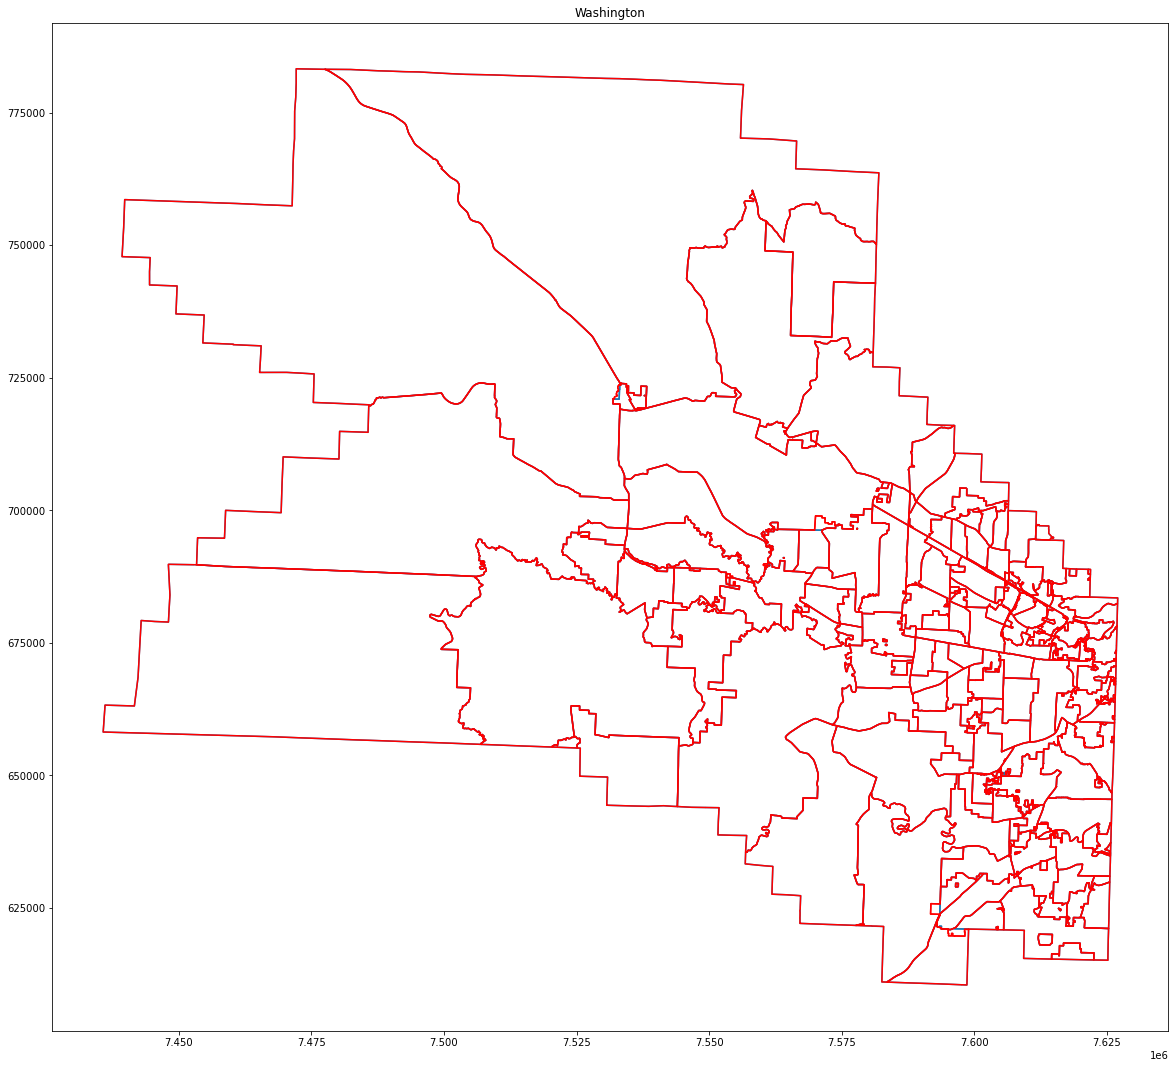

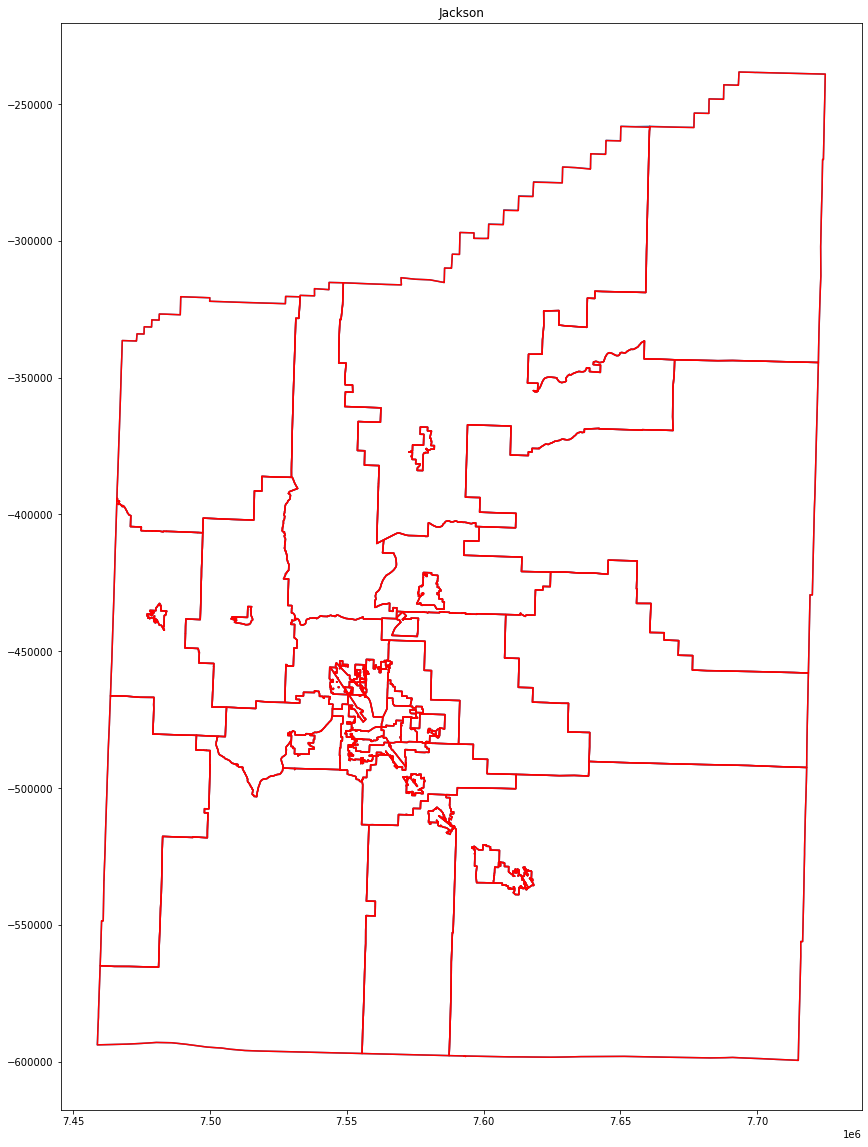

In [42]:
for val in list(source_shapefile["County"].unique()):
    ax = source_shapefile[source_shapefile["County"]==val].boundary.plot(figsize=(20,20))
    vest_or_18[vest_or_18["COUNTY"]==val].boundary.plot(color="red",ax=ax)
    ax.set_title(val)